In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Input, Bidirectional,SimpleRNN, Embedding, Conv1D, LSTM, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split



from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

#print(tf.__version__)


2024-11-14 03:08:25.336733: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hsibitenda/nltk_data...
[nltk_data]   Packag

In [2]:
df1=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey1_fini.csv')
df2=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey2_fini.csv')
df3=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey3_fini.csv')
df4=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey4_fini.csv')
df5=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey5_fini.csv')
df6=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey6_fini.csv')

df1=df1.astype(str)
df2=df2.astype(str)
df3=df3.astype(str)
df4=df4.astype(str)
df5=df5.astype(str)
df6=df6.astype(str)

In [3]:
df=pd.concat([df1, df2,df3,df4,], axis=0)
df=df.astype(str)
df.shape

(394, 74)

In [4]:
df_new=df.copy()
df=df5.copy()
df.shape

(228, 75)

In [5]:
# df.head(50)
import pandas as pd
import numpy as np

# Load your DataFrame `df` here
# df = pd.read_csv('your_data.csv') # Uncomment and modify if loading from a file

# Ensure that 'Topic_Score' is numeric
df['Topic_Score'] = pd.to_numeric(df['Topic_Score'], errors='coerce')

# Drop rows where 'Topic_Score' is NaN
df = df.dropna(subset=['Topic_Score'])

# Drop duplicates if necessary
df = df.drop_duplicates()

# Ensure 'Participant email' is treated as a string
df['Participant email'] = df['Participant email'].astype(str)


In [6]:
df.shape

(228, 75)

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


T-test results:

Metric: Correlation
Overall vs Sample 42: t-stat = -8.467340333808647, p-value = 5.713517278658731e-17
Overall vs Sample 43: t-stat = -17.480375396159936, p-value = 1.3475757234142844e-62
Overall vs Sample 44: t-stat = -18.45135047586417, p-value = 4.217598062089861e-69
Sample 42 vs Sample 43: t-stat = -7.33942880051051, p-value = 3.1051558569933186e-13
Sample 42 vs Sample 44: t-stat = -7.6979134568676635, p-value = 2.161475081024558e-14
Sample 43 vs Sample 44: t-stat = -0.14616964889778886, p-value = 0.883802259937513

Metric: Kappa
Overall vs Sample 42: t-stat = -31.75397461537291, p-value = 6.021432584446912e-165
Overall vs Sample 43: t-stat = 2.8012587281490164, p-value = 0.0051615294837778734
Overall vs Sample 44: t-stat = 3.5839976956565605, p-value = 0.0003504371952746428
Sample 42 vs Sample 43: t-stat = 27.326190726723198, p-value = 8.121760994709483e-140
Sample 42 vs Sample 44: t-stat = 27.43645280840282, p-value = 7.040010249275456e-141
Sample 43 vs Sample 44

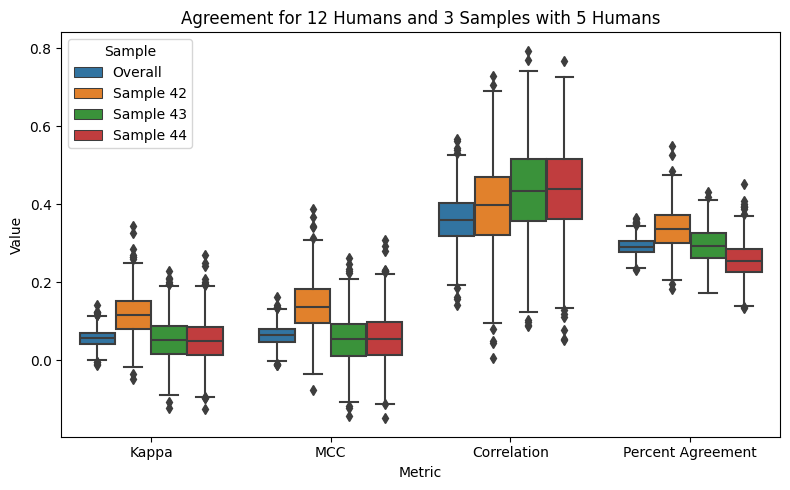

Basic Descriptive Statistics:
{'Mean Topic Score': 3.723684210526316, 'Median Topic Score': 4.0, 'Standard Deviation': 1.30332023521486, 'Variance': 1.6986436355205181}


In [92]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from scipy.stats import pearsonr, ttest_ind, ConstantInputWarning
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Topic Score': df['Topic_Score'].mean(),
        'Median Topic Score': df['Topic_Score'].median(),
        'Standard Deviation': df['Topic_Score'].std(),
        'Variance': df['Topic_Score'].var(),
    }
    return stats

# Function to calculate agreement metrics
def calculate_agreement_metrics(df):
    # Extract unique pairs of participants
    participant_emails = df['Participant email'].unique()
    metrics = {'Kappa': [], 'MCC': [], 'Correlation': [], 'Percent Agreement': []}
    
    # Calculate metrics for each pair of participants
    for i in range(len(participant_emails)):
        for j in range(i + 1, len(participant_emails)):
            df_pair = df[df['Participant email'].isin([participant_emails[i], participant_emails[j]])]
            if len(df_pair) < 2:
                continue  # Skip if there are not enough scores to compare
            
            # Remove duplicates
            df_pair = df_pair.drop_duplicates(subset=['textid', 'Participant email'])

            # Pivot the dataframe to have one participant per column
            pivot_df = df_pair.pivot(index='textid', columns='Participant email', values='Topic_Score').dropna()

            if pivot_df.shape[1] < 2:
                continue  # Skip if we don't have both participants' scores for the same texts

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # Calculate Cohen's Kappa
            kappa = safe_cohen_kappa_score(scores1, scores2)
            metrics['Kappa'].append(kappa)

            # Calculate MCC
            mcc = safe_matthews_corrcoef(scores1, scores2)
            metrics['MCC'].append(mcc)

            # Calculate Pearson Correlation Coefficient
            if len(scores1) >= 2 and len(scores2) >= 2:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", category=ConstantInputWarning)
                    try:
                        correlation, _ = pearsonr(scores1, scores2)
                    except ValueError:  # Handle case where scores are constant
                        correlation = np.nan
                    metrics['Correlation'].append(correlation)

            # Calculate Percentage Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent Agreement'].append(percent_agreement)
    
    # Calculate mean of the metrics
    mean_metrics = {metric: np.nanmean(values) if values else np.nan for metric, values in metrics.items()}
    
    return mean_metrics['Kappa'], mean_metrics['MCC'], mean_metrics['Correlation'], mean_metrics['Percent Agreement']

# Function to sample participants
def sample_participants(df, seed):
    unique_emails = df['Participant email'].drop_duplicates()
    if len(unique_emails) < 5:
        raise ValueError("Not enough unique participants to sample 5.")
    sampled_emails = unique_emails.sample(n=5, replace=False, random_state=seed).tolist()
    return df[df['Participant email'].isin(sampled_emails)].copy()  # Ensure to work on a copy of the DataFrame

# Function to encode text labels into numeric values
def encode_labels(df, column_name):
    df[column_name + '_Num'] = pd.factorize(df[column_name])[0]
    return df

# Perform bootstrap sampling
def bootstrap_sampling(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = []
    
    for i in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        kappa, mcc, correlation, percent_agreement = calculate_agreement_metrics(bootstrap_sample)
        bootstrap_metrics.append((kappa, mcc, correlation, percent_agreement))
    
    return pd.DataFrame(bootstrap_metrics, columns=['Kappa', 'MCC', 'Correlation', 'Percent Agreement'])

# Set the random seed for reproducibility
np.random.seed(42)

# Load your DataFrame `df` here
# df = pd.read_csv('your_data.csv') # For example, if you are loading it from a CSV

# Dictionary to store results
results = {'Overall': {'Kappa': np.nan, 'MCC': np.nan, 'Correlation': np.nan, 'Percent Agreement': np.nan}}

# Calculate metrics for the entire dataset
try:
    overall_kappa, overall_mcc, overall_correlation, overall_percent_agreement = calculate_agreement_metrics(df)
    results['Overall']['Kappa'] = overall_kappa
    results['Overall']['MCC'] = overall_mcc
    results['Overall']['Correlation'] = overall_correlation
    results['Overall']['Percent Agreement'] = overall_percent_agreement
except Exception as e:
    print(f"Error calculating metrics for overall dataset: {e}")

# List to store results for samples and sampled DataFrames
sample_results = []
sample_dfs = []

# Repeat sampling process three times with different seeds
seeds = [42, 43, 44]  # Different seeds for different samples

for seed in seeds:
    try:
        # Sample 5 participants
        sample_df = sample_participants(df, seed)
        sample_dfs.append(sample_df)
        
        # Calculate metrics for the sampled participants
        sample_kappa, sample_mcc, sample_correlation, sample_percent_agreement = calculate_agreement_metrics(sample_df)
        
        # Store results in the sample_results list
        sample_results.append({
            'Sample': f'Sample {seed}',
            'Kappa': sample_kappa,
            'MCC': sample_mcc,
            'Correlation': sample_correlation,
            'Percent Agreement': sample_percent_agreement
        })
    except ValueError as e:
        print(e)
        continue

# Bootstrap sampling for overall dataset
bootstrap_results_overall = bootstrap_sampling(df)

# Bootstrap sampling for each sample
bootstrap_results_samples = []
for seed, sample_df in zip(seeds, sample_dfs):
    bootstrap_sample_result = bootstrap_sampling(sample_df)
    bootstrap_sample_result['Sample'] = f'Sample {seed}'
    bootstrap_results_samples.append(bootstrap_sample_result)

# Combine all bootstrap results
all_bootstrap_results = pd.concat([bootstrap_results_overall.assign(Sample='Overall')] + bootstrap_results_samples)

# Save the DataFrame with scores
all_bootstrap_results.to_csv('agreement_metrics.csv', index=False)

# Melt the DataFrame for seaborn boxplot
all_bootstrap_results_melted = all_bootstrap_results.melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# Calculate the mean values for annotation
mean_values = all_bootstrap_results_melted.groupby(['Sample', 'Metric']).mean().reset_index()

# Perform t-tests
t_test_results = {}
samples = list(mean_values['Sample'].unique())
for metric in mean_values['Metric'].unique():
    t_test_results[metric] = {}
    for i in range(len(samples)):
        for j in range(i + 1, len(samples)):
            sample1 = all_bootstrap_results_melted[(all_bootstrap_results_melted['Sample'] == samples[i]) & (all_bootstrap_results_melted['Metric'] == metric)]['Value']
            sample2 = all_bootstrap_results_melted[(all_bootstrap_results_melted['Sample'] == samples[j]) & (all_bootstrap_results_melted['Metric'] == metric)]['Value']
            t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False, nan_policy='omit')  # Use nan_policy to handle NaNs
            t_test_results[metric][f'{samples[i]} vs {samples[j]}'] = (t_stat, p_value)

# Print t-test results
print("T-test results:")
for metric, comparisons in t_test_results.items():
    print(f"\nMetric: {metric}")
    for comparison, (t_stat, p_value) in comparisons.items():
        print(f"{comparison}: t-stat = {t_stat}, p-value = {p_value}")

# Calculate and print average t-statistics for overall dataset against all samples per metric
average_t_stats = {}
for metric, comparisons in t_test_results.items():
    overall_comparisons = [t_stat for comparison, (t_stat, p_value) in comparisons.items() if 'Overall' in comparison]
    if overall_comparisons:
        average_t_stats[metric] = np.mean(overall_comparisons)
        print(f"Average t-statistic for Overall vs all samples for {metric}: {average_t_stats[metric]}")

# Calculate and print average p-values for overall dataset against all samples per metric
average_p_values = {}
for metric, comparisons in t_test_results.items():
    overall_comparisons = [p_value for comparison, (t_stat, p_value) in comparisons.items() if 'Overall' in comparison]
    if overall_comparisons:
        average_p_values[metric] = np.mean(overall_comparisons)
        print(f"Average p-value for Overall vs all samples for {metric}: {average_p_values[metric]}")

# Save average t-statistics
average_t_stats_df = pd.DataFrame(list(average_t_stats.items()), columns=['Metric', 'Average T-Statistic'])
average_t_stats_df.to_csv('average_t_stats.csv', index=False)

# Save average p-values
average_p_values_df = pd.DataFrame(list(average_p_values.items()), columns=['Metric', 'Average P-Value'])
average_p_values_df.to_csv('average_p_values.csv', index=False)

# Plot the results
plt.figure(figsize=(8, 5))
sns.boxplot(data=all_bootstrap_results_melted, x='Metric', y='Value', hue='Sample')
plt.title('Agreement for 12 Humans and 3 Samples with 5 Humans')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('agreement_metrics_boxplot.png')
plt.show()

# Example: Calculate basic descriptive statistics
basic_stats = calculate_basic_statistics(df)
print("Basic Descriptive Statistics:")
print(basic_stats)


In [8]:
mean_values

Sample             Metric     Value
0     Overall        Correlation  0.360537
1     Overall              Kappa  0.057375
2     Overall                MCC  0.065207
3     Overall  Percent Agreement  0.291986
4   Sample 42        Correlation  0.396140
5   Sample 42              Kappa  0.117406
6   Sample 42                MCC  0.138718
7   Sample 42  Percent Agreement  0.337433
8   Sample 43        Correlation  0.434470
9   Sample 43              Kappa  0.052445
10  Sample 43                MCC  0.053360
11  Sample 43  Percent Agreement  0.294746
12  Sample 44        Correlation  0.435215
13  Sample 44              Kappa  0.050831
14  Sample 44                MCC  0.057631
15  Sample 44  Percent Agreement  0.256346

In [95]:
df=df_new.copy()

In [96]:
df.shape

(722, 83)

In [97]:
# df.head(50)
import pandas as pd
import numpy as np

# Load your DataFrame `df` here
# df = pd.read_csv('your_data.csv') # Uncomment and modify if loading from a file

# Ensure that 'Topic_Score' is numeric
df['Topic_Score'] = pd.to_numeric(df['Topic_Score'], errors='coerce')

# Drop rows where 'Topic_Score' is NaN
df = df.dropna(subset=['Topic_Score'])

# Drop duplicates if necessary
df = df.drop_duplicates()

# Ensure 'Participant email' is treated as a string
df['Participant email'] = df['Participant email'].astype(str)


In [14]:
df.shape

(722, 83)

Processing the DataFrame...


/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


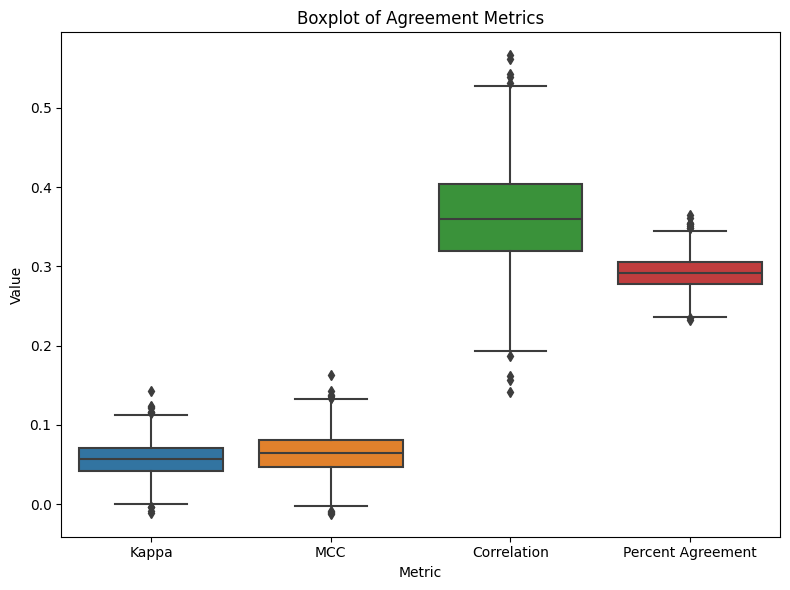

Overall metrics:
      Kappa       MCC  Correlation  Percent Agreement
0  0.061774  0.066066     0.371926           0.292663
Basic descriptive statistics:
   Mean Topic Score  Median Topic Score  Standard Deviation  Variance
0          3.723684                 4.0             1.30332  1.698644


In [106]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from scipy.stats import pearsonr, ttest_ind, ConstantInputWarning
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Topic Score': df['Topic_Score'].mean(),
        'Median Topic Score': df['Topic_Score'].median(),
        'Standard Deviation': df['Topic_Score'].std(),
        'Variance': df['Topic_Score'].var(),
    }
    return stats

# Function to calculate agreement metrics
def calculate_agreement_metrics(df):
    # Extract unique pairs of participants
    participant_emails = df['Participant email'].unique()
    metrics = {'Kappa': [], 'MCC': [], 'Correlation': [], 'Percent Agreement': []}
    
    # Calculate metrics for each pair of participants
    for i in range(len(participant_emails)):
        for j in range(i + 1, len(participant_emails)):
            df_pair = df[df['Participant email'].isin([participant_emails[i], participant_emails[j]])]
            if len(df_pair) < 2:
                continue  # Skip if there are not enough scores to compare
            
            # Remove duplicates
            df_pair = df_pair.drop_duplicates(subset=['textid', 'Participant email'])

            # Pivot the dataframe to have one participant per column
            pivot_df = df_pair.pivot(index='textid', columns='Participant email', values='Topic_Score').dropna()

            if pivot_df.shape[1] < 2:
                continue  # Skip if we don't have both participants' scores for the same texts

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # Calculate Cohen's Kappa
            kappa = safe_cohen_kappa_score(scores1, scores2)
            metrics['Kappa'].append(kappa)

            # Calculate MCC
            mcc = safe_matthews_corrcoef(scores1, scores2)
            metrics['MCC'].append(mcc)

            # Calculate Pearson Correlation Coefficient
            if len(scores1) >= 2 and len(scores2) >= 2:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", category=ConstantInputWarning)
                    try:
                        correlation, _ = pearsonr(scores1, scores2)
                    except ValueError:  # Handle case where scores are constant
                        correlation = np.nan
                    metrics['Correlation'].append(correlation)

            # Calculate Percentage Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent Agreement'].append(percent_agreement)
    
    # Calculate mean of the metrics
    mean_metrics = {metric: np.nanmean(values) if values else np.nan for metric, values in metrics.items()}
    
    return mean_metrics['Kappa'], mean_metrics['MCC'], mean_metrics['Correlation'], mean_metrics['Percent Agreement']

# Perform bootstrap sampling
def bootstrap_sampling(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = []
    
    for i in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        kappa, mcc, correlation, percent_agreement = calculate_agreement_metrics(bootstrap_sample)
        bootstrap_metrics.append((kappa, mcc, correlation, percent_agreement))
    
    return pd.DataFrame(bootstrap_metrics, columns=['Kappa', 'MCC', 'Correlation', 'Percent Agreement'])

# Ensure that 'Topic_Score' is numeric
df['Topic_Score'] = pd.to_numeric(df['Topic_Score'], errors='coerce')

# Calculate metrics and bootstrap sampling for the DataFrame
print("Processing the DataFrame...")

# Calculate agreement metrics for the entire dataset
try:
    kappa, mcc, correlation, percent_agreement = calculate_agreement_metrics(df)
    results = {
        'Kappa': kappa,
        'MCC': mcc,
        'Correlation': correlation,
        'Percent Agreement': percent_agreement
    }
except Exception as e:
    print(f"Error calculating metrics: {e}")
    results = {
        'Kappa': np.nan,
        'MCC': np.nan,
        'Correlation': np.nan,
        'Percent Agreement': np.nan
    }

# Perform bootstrap sampling for the DataFrame
bootstrap_results = bootstrap_sampling(df)
bootstrap_results.to_csv('agreement_metrics.csv', index=False)

# Calculate basic statistics
basic_stats = calculate_basic_statistics(df)

# Melt the DataFrame for seaborn boxplot
bootstrap_results_melted = bootstrap_results.melt(var_name='Metric', value_name='Value')

# Plot the results
plt.figure(figsize=(8, 6))
sns.boxplot(data=bootstrap_results_melted, x='Metric', y='Value')
plt.title('Boxplot of Agreement Metrics')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('agreement_metrics_boxplot.png')
plt.show()

# Print and save overall metrics
results_df = pd.DataFrame([results])
results_df.to_csv('overall_metrics.csv', index=False)
print("Overall metrics:")
print(results_df)

# Print and save basic statistics
basic_stats_df = pd.DataFrame([basic_stats])
basic_stats_df.to_csv('basic_statistics.csv', index=False)
print("Basic descriptive statistics:")
print(basic_stats_df)


Processing df1...
Processing df2...
Processing df3...
Processing df4...
Processing df5...


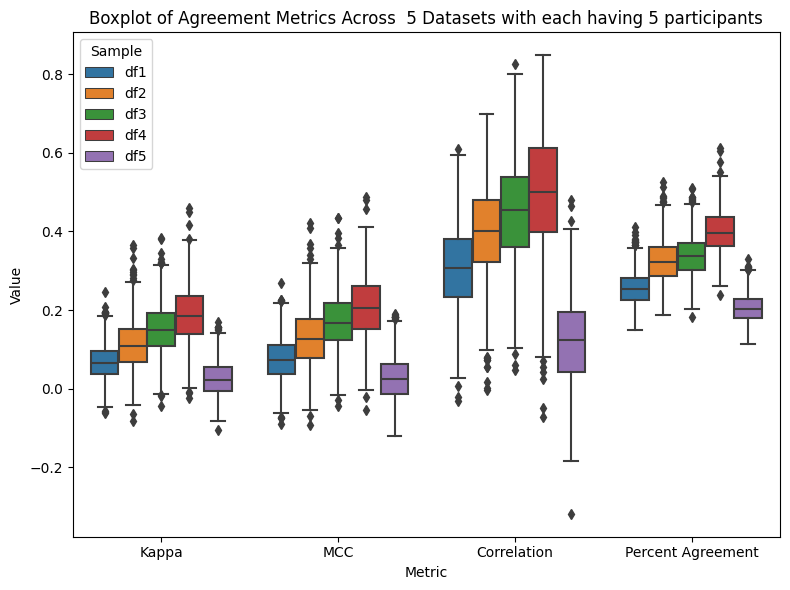

Overall metrics for each DataFrame:
        Kappa       MCC  Correlation  Percent Agreement
df1  0.070026  0.074453     0.322778           0.256140
df2  0.113193  0.125341     0.395864           0.321053
df3  0.163865  0.174616     0.473871           0.338889
df4  0.202101  0.207729     0.562981           0.400000
df5  0.015548  0.015990     0.075949           0.200000
Basic descriptive statistics for each DataFrame:
     Mean Topic Score  Median Topic Score  Standard Deviation  Variance
df1          3.377193                 4.0            1.489731  2.219298
df2          2.747368                 3.0            1.071571  1.148264
df3          3.077778                 3.0            1.375776  1.892759
df4          3.705263                 4.0            1.295439  1.678163
df5          3.260000                 3.0            1.338022  1.790303


In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef
from scipy.stats import pearsonr, ttest_ind, ConstantInputWarning
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Topic Score': df['Topic_Score'].mean(),
        'Median Topic Score': df['Topic_Score'].median(),
        'Standard Deviation': df['Topic_Score'].std(),
        'Variance': df['Topic_Score'].var(),
    }
    return stats

# Function to calculate agreement metrics
def calculate_agreement_metrics(df):
    # Extract unique pairs of participants
    participant_emails = df['Participant email'].unique()
    metrics = {'Kappa': [], 'MCC': [], 'Correlation': [], 'Percent Agreement': []}
    
    # Calculate metrics for each pair of participants
    for i in range(len(participant_emails)):
        for j in range(i + 1, len(participant_emails)):
            df_pair = df[df['Participant email'].isin([participant_emails[i], participant_emails[j]])]
            if len(df_pair) < 2:
                continue  # Skip if there are not enough scores to compare
            
            # Remove duplicates
            df_pair = df_pair.drop_duplicates(subset=['textid', 'Participant email'])

            # Pivot the dataframe to have one participant per column
            pivot_df = df_pair.pivot(index='textid', columns='Participant email', values='Topic_Score').dropna()

            if pivot_df.shape[1] < 2:
                continue  # Skip if we don't have both participants' scores for the same texts

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # Calculate Cohen's Kappa
            kappa = safe_cohen_kappa_score(scores1, scores2)
            metrics['Kappa'].append(kappa)

            # Calculate MCC
            mcc = safe_matthews_corrcoef(scores1, scores2)
            metrics['MCC'].append(mcc)

            # Calculate Pearson Correlation Coefficient
            if len(scores1) >= 2 and len(scores2) >= 2:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", category=ConstantInputWarning)
                    try:
                        correlation, _ = pearsonr(scores1, scores2)
                    except ValueError:  # Handle case where scores are constant
                        correlation = np.nan
                    metrics['Correlation'].append(correlation)

            # Calculate Percentage Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent Agreement'].append(percent_agreement)
    
    # Calculate mean of the metrics
    mean_metrics = {metric: np.nanmean(values) if values else np.nan for metric, values in metrics.items()}
    
    return mean_metrics['Kappa'], mean_metrics['MCC'], mean_metrics['Correlation'], mean_metrics['Percent Agreement']

# Perform bootstrap sampling
def bootstrap_sampling(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = []
    
    for i in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        kappa, mcc, correlation, percent_agreement = calculate_agreement_metrics(bootstrap_sample)
        bootstrap_metrics.append((kappa, mcc, correlation, percent_agreement))
    
    return pd.DataFrame(bootstrap_metrics, columns=['Kappa', 'MCC', 'Correlation', 'Percent Agreement'])

# List of DataFrames
df1['Topic_Score'] = pd.to_numeric(df1['Topic_Score'], errors='coerce')
# Ensure that 'Topic_Score' is numeric
df2['Topic_Score'] = pd.to_numeric(df2['Topic_Score'], errors='coerce')
# Ensure that 'Topic_Score' is numeric
df3['Topic_Score'] = pd.to_numeric(df3['Topic_Score'], errors='coerce')
# Ensure that 'Topic_Score' is numeric
df4['Topic_Score'] = pd.to_numeric(df4['Topic_Score'], errors='coerce')
# Ensure that 'Topic_Score' is numeric
df6['Topic_Score'] = pd.to_numeric(df6['Topic_Score'], errors='coerce')

dfs = [df1, df2, df3, df4, df6]
dfs_names = ['df1', 'df2', 'df3', 'df4', 'df5']

# Dictionary to store results for each DataFrame
results = {}
basic_stats = {}

# Calculate metrics and bootstrap sampling for each DataFrame
for df, name in zip(dfs, dfs_names):
    print(f"Processing {name}...")
    
    # Calculate agreement metrics for the entire dataset
    try:
        kappa, mcc, correlation, percent_agreement = calculate_agreement_metrics(df)
        results[name] = {
            'Kappa': kappa,
            'MCC': mcc,
            'Correlation': correlation,
            'Percent Agreement': percent_agreement
        }
    except Exception as e:
        print(f"Error calculating metrics for {name}: {e}")
        results[name] = {
            'Kappa': np.nan,
            'MCC': np.nan,
            'Correlation': np.nan,
            'Percent Agreement': np.nan
        }

    # Perform bootstrap sampling for the DataFrame
    bootstrap_results = bootstrap_sampling(df)
    bootstrap_results['Sample'] = name  # Add sample name for identification

    # Save bootstrap results
    bootstrap_results.to_csv(f'{name}_agreement_metrics.csv', index=False)

    # Calculate basic statistics
    basic_stats[name] = calculate_basic_statistics(df)
    
# Combine all bootstrap results
all_bootstrap_results = pd.concat([pd.read_csv(f'{name}_agreement_metrics.csv') for name in dfs_names])

# Melt the DataFrame for seaborn boxplot
all_bootstrap_results_melted = all_bootstrap_results.melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# Plot the results
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_bootstrap_results_melted, x='Metric', y='Value', hue='Sample')
plt.title('Boxplot of Agreement Metrics Across  5 Datasets with each having 5 participants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('agreement_metrics_boxplot.png')
plt.show()

# Print and save overall metrics for each DataFrame
results_df = pd.DataFrame(results).T
results_df.to_csv('overall_metrics.csv')
print("Overall metrics for each DataFrame:")
print(results_df)

# Print and save basic statistics for each DataFrame
basic_stats_df = pd.DataFrame(basic_stats).T
basic_stats_df.to_csv('basic_statistics.csv')
print("Basic descriptive statistics for each DataFrame:")
print(basic_stats_df)


In [13]:
df=df_new.copy()

Processing the DataFrame...


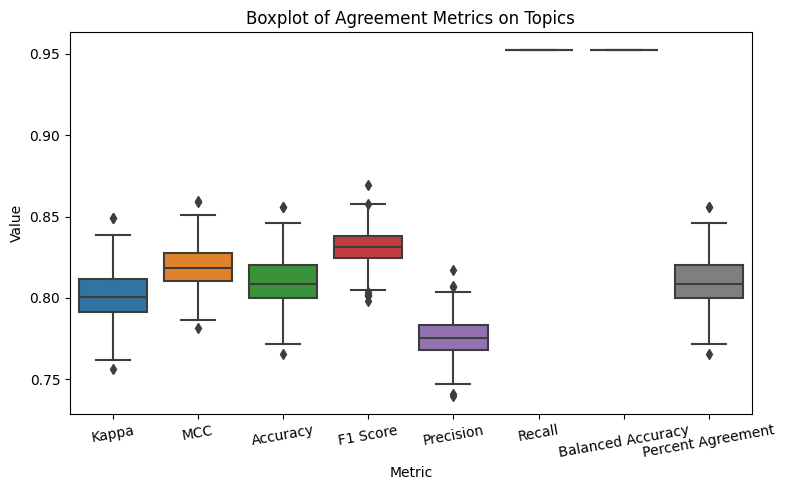

Overall metrics:
      Kappa       MCC  Accuracy  F1 Score  Precision    Recall  \
0  0.801995  0.819476  0.810249   0.83326   0.776494  0.952381   

   Balanced Accuracy  Percent Agreement  
0           0.952381           0.810249  


In [98]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    cohen_kappa_score,
    matthews_corrcoef,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    balanced_accuracy_score,
    accuracy_score as percentage_agreement
)
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate Ground Truth Labels based on some criteria
def generate_ground_truth_labels(df):
    threshold = 2.5
    df['Ground_Truth_Label'] = np.where(df['Average_Topic_Score'] > threshold, df['Topic_Name'], 'no_topic')
    return df

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate agreement metrics between ground truth and model predictions
def calculate_agreement_metrics(y_true, y_pred):
    if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
        return (np.nan,) * 8
    
    kappa = safe_cohen_kappa_score(y_true, y_pred)
    mcc = safe_matthews_corrcoef(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    percent_agreement = np.mean(y_true == y_pred)
    
    return kappa, mcc, accuracy, f1, precision, recall, balanced_accuracy, percent_agreement

# Perform bootstrap sampling
def bootstrap_sampling(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = []
    
    for i in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        y_true = bootstrap_sample['Ground_Truth_Label_encoded'].values
        y_pred = bootstrap_sample['Topic_Name_encoded'].values
        metrics = calculate_agreement_metrics(y_true, y_pred)
        bootstrap_metrics.append(metrics)
    
    columns = ['Kappa', 'MCC', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'Balanced Accuracy', 'Percent Agreement']
    return pd.DataFrame(bootstrap_metrics, columns=columns)

# Ensure that 'Topic_Score' and 'Average_Topic_Score' are numeric
df['Topic_Score'] = pd.to_numeric(df['Topic_Score'], errors='coerce')

# Calculate the average topic score for each textid
df['Average_Topic_Score'] = df.groupby('textid')['Topic_Score'].transform('mean')

# Generate ground truth labels
df = generate_ground_truth_labels(df)

# Encode the labels to ensure the same label space
le = LabelEncoder()
all_labels = np.concatenate([df['Ground_Truth_Label'].unique(), df['Topic_Name'].unique()])
le.fit(all_labels)
df['Ground_Truth_Label_encoded'] = le.transform(df['Ground_Truth_Label'])
df['Topic_Name_encoded'] = le.transform(df['Topic_Name'])

# Calculate metrics and bootstrap sampling for the DataFrame
print("Processing the DataFrame...")

# Calculate agreement metrics for the entire dataset
y_true = df['Ground_Truth_Label_encoded'].values
y_pred = df['Topic_Name_encoded'].values

try:
    kappa, mcc, accuracy, f1, precision, recall, balanced_accuracy, percent_agreement = calculate_agreement_metrics(y_true, y_pred)
    results = {
        'Kappa': kappa,
        'MCC': mcc,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Balanced Accuracy': balanced_accuracy,
        'Percent Agreement': percent_agreement
    }
except Exception as e:
    print(f"Error calculating metrics: {e}")
    results = {
        'Kappa': np.nan,
        'MCC': np.nan,
        'Accuracy': np.nan,
        'F1 Score': np.nan,
        'Precision': np.nan,
        'Recall': np.nan,
        'Balanced Accuracy': np.nan,
        'Percent Agreement': np.nan
    }

# Perform bootstrap sampling for the DataFrame
bootstrap_results = bootstrap_sampling(df)
bootstrap_results.to_csv('agreement_metrics.csv', index=False)

# Melt the DataFrame for seaborn boxplot
bootstrap_results_melted = bootstrap_results.melt(var_name='Metric', value_name='Value')

# Plot the results
plt.figure(figsize=(8, 5))
sns.boxplot(data=bootstrap_results_melted, x='Metric', y='Value')
plt.title('Boxplot of Agreement Metrics on Topics')
plt.xticks(rotation=10)
plt.tight_layout()
plt.savefig('agreement_metrics_boxplot.png')
plt.show()

# Print and save overall metrics
results_df = pd.DataFrame([results])
results_df.to_csv('overall_metrics.csv', index=False)
print("Overall metrics:")
print(results_df)


In [97]:
results_df

Kappa       MCC  Accuracy  F1 Score  Precision    Recall  \
0  0.801995  0.819476  0.810249   0.83326   0.776494  0.952381   

   Balanced Accuracy  Percent Agreement  
0           0.952381           0.810249

### Computations for Emotions

In [4]:
df=df5.copy()

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


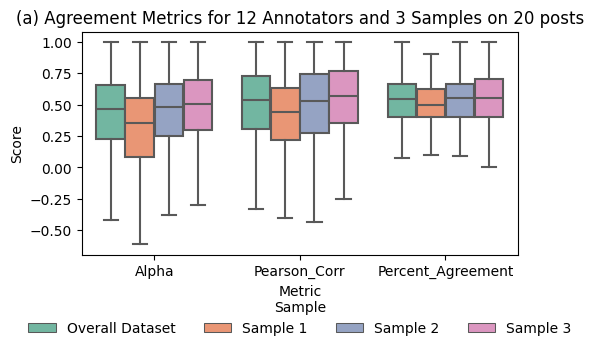

T-test results between the average of all samples and overall dataset:
              Metric  T-statistic   P-value
0              Alpha    -0.040982  0.967310
1       Pearson_Corr    -0.047740  0.961924
2  Percent_Agreement     0.021593  0.982773


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score
import krippendorff
import matplotlib.pyplot as plt
import seaborn as sns

# Example seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming df is your DataFrame
# df = merged_df.copy()

# Convert Emotion_y to lowercase and remove any quotes
df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')

# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion:
        return 'positive'
    elif 'negative' in emotion:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'Emotion_y' column
df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)

# Convert Emotion_y to numerical form for scoring
emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)

# Function to create samples with different seeds
def create_samples(df, seeds, n_participants=5):
    samples = []
    for seed in seeds:
        np.random.seed(seed)
        participants = df['Participant email'].dropna().unique()
        sample_participants = np.random.choice(participants, size=n_participants, replace=False)
        sample_df = df[df['Participant email'].isin(sample_participants)]
        samples.append(sample_df)
    return samples

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Emotion Score': df['Emotion_Score'].mean(),
        'Median Emotion Score': df['Emotion_Score'].median(),
        'Standard Deviation': df['Emotion_Score'].std(),
        'Variance': df['Emotion_Score'].var(),
    }
    return stats

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Alpha': [], 'Pearson_Corr': [], 'Percent_Agreement': []}

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]
            
            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
            if len(df_pair) < 2:
                continue
            
            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Emotion_Score').dropna()
            
            if pivot_df.shape[1] < 2:
                continue

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]

            # Calculate Krippendorff's Alpha
            if len(set(scores1)) > 1 and len(set(scores2)) > 1:
                alpha = krippendorff.alpha(reliability_data=[scores1, scores2], level_of_measurement='ordinal')
            else:
                alpha = np.nan
            metrics['Alpha'].append(alpha)

            # Calculate Pearson Correlation
            if len(scores1) > 1 and len(scores2) > 1 and np.std(scores1) > 0 and np.std(scores2) > 0:
                pearson_corr, _ = pearsonr(scores1, scores2)
            else:
                pearson_corr = np.nan
            metrics['Pearson_Corr'].append(pearson_corr)

            # Calculate Percent Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent_Agreement'].append(percent_agreement)
    
    return metrics

# Function for bootstrap sampling with replacement
def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {'Alpha': [], 'Pearson_Corr': [], 'Percent_Agreement': []}

    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        metrics = compute_agreement_metrics(bootstrap_sample)
        
        for key in bootstrap_metrics.keys():
            bootstrap_metrics[key].extend(metrics[key])

    return pd.DataFrame(bootstrap_metrics)

# Define seeds for each sample
seeds = [42, 43, 44]

# Generate samples with different seeds
samples = create_samples(df, seeds)

# Collect metrics for the overall dataset
bootstrap_results_overall = bootstrap_sampling_with_replacement(df)

# Collect metrics for each sample
all_sample_results = []
for i, sample_df in enumerate(samples):
    bootstrap_results_sample = bootstrap_sampling_with_replacement(sample_df)
    all_sample_results.append(bootstrap_results_sample)

# Melt the results for plotting
all_bootstrap_results_melted = pd.concat([
    bootstrap_results_overall.assign(Sample='Overall Dataset'),
    *[result.assign(Sample=f'Sample {i+1}') for i, result in enumerate(all_sample_results)]
])

# Melt the results for seaborn boxplot
all_bootstrap_results_melted = all_bootstrap_results_melted.melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(6, 4))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)

# Calculate and annotate the mean values
mean_values = all_bootstrap_results_melted.groupby(['Sample', 'Metric']).mean().reset_index()

for i, metric in enumerate(mean_values['Metric'].unique()):
    for j, sample in enumerate(mean_values['Sample'].unique()):
        row = mean_values[(mean_values['Metric'] == metric) & (mean_values['Sample'] == sample)]
        if not row.empty:
            y = row['Value'].values[0]
            x_pos = i + j * 0.02
            # ax.text(x_pos, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, title='Sample', frameon=False)
# plt.legend(title='Sample', bbox_to_anchor=(0.5, -0.15), loc='upper left', frameon=False)
# plt.legend(title='Sample', bbox_to_anchor=(1.35, 0.5), loc='center right', frameon=False)

plt.title("(a) Agreement Metrics for 12 Annotators and 3 Samples on 20 posts")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.0)  # Adjust padding to prevent overlap
plt.show()

# Statistical Testing: T-tests between the average of all samples and the overall dataset
print("T-test results between the average of all samples and overall dataset:")
t_test_summary = {'Metric': [], 'T-statistic': [], 'P-value': []}

for metric in ['Alpha', 'Pearson_Corr', 'Percent_Agreement']:
    sample_averages = [result[metric].dropna().mean() for result in all_sample_results]
    overall_data = bootstrap_results_overall[metric].dropna()

    if len(sample_averages) > 1 and len(overall_data) > 1:
        stat, p_value = ttest_ind(sample_averages, overall_data)
        t_test_summary['Metric'].append(metric)
        t_test_summary['T-statistic'].append(stat)
        t_test_summary['P-value'].append(p_value)
    else:
        t_test_summary['Metric'].append(metric)
        t_test_summary['T-statistic'].append(np.nan)
        t_test_summary['P-value'].append(np.nan)

t_test_summary_df = pd.DataFrame(t_test_summary)
print(t_test_summary_df)


In [6]:
mean_values

Sample             Metric     Value
0   Overall Dataset              Alpha  0.422168
1   Overall Dataset       Pearson_Corr  0.479433
2   Overall Dataset  Percent_Agreement  0.534937
3          Sample 1              Alpha  0.319913
4          Sample 1       Pearson_Corr  0.405601
5          Sample 1  Percent_Agreement  0.512173
6          Sample 2              Alpha  0.436868
7          Sample 2       Pearson_Corr  0.475478
8          Sample 2  Percent_Agreement  0.546938
9          Sample 3              Alpha  0.487059
10         Sample 3       Pearson_Corr  0.529707
11         Sample 3  Percent_Agreement  0.552870

In [4]:
df=pd.concat([df1, df2,df3,df4], axis=0)
df=df.astype(str)
df.shape

(394, 74)

In [5]:
# import numpy as np
# import pandas as pd
# from scipy.stats import pearsonr, ttest_ind
# from sklearn.metrics import accuracy_score
# import krippendorff
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Example seed for reproducibility
# seed = 42
# np.random.seed(seed)

# # Assuming df is your DataFrame
# # df = merged_df.copy()

# # Convert Emotion_y to lowercase and remove any quotes
# df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')

# # Function to adjust emotions to only three labels
# def adjust_emotions(emotion):
#     if 'positive' in emotion:
#         return 'positive'
#     elif 'negative' in emotion:
#         return 'negative'
#     else:
#         return 'neutral'

# # Apply the function to the 'Emotion_y' column
# df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)

# # Convert Emotion_y to numerical form for scoring
# emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
# df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)

# # Function to create samples with different seeds
# def create_samples(df, seeds, n_participants=5):
#     samples = []
#     for seed in seeds:
#         np.random.seed(seed)
#         participants = df['Participant email'].dropna().unique()
#         sample_participants = np.random.choice(participants, size=n_participants, replace=False)
#         sample_df = df[df['Participant email'].isin(sample_participants)]
#         samples.append(sample_df)
#     return samples

# # Function to calculate percentage agreement
# def calculate_percentage_agreement(y_true, y_pred):
#     return np.mean(np.array(y_true) == np.array(y_pred))

# # Function to calculate basic descriptive statistics
# def calculate_basic_statistics(df):
#     stats = {
#         'Mean Emotion Score': df['Emotion_Score'].mean(),
#         'Median Emotion Score': df['Emotion_Score'].median(),
#         'Standard Deviation': df['Emotion_Score'].std(),
#         'Variance': df['Emotion_Score'].var(),
#     }
#     return stats

# # Function to compute agreement metrics between pairs of participants
# def compute_agreement_metrics(df):
#     participants = df['Participant email'].unique()
#     metrics = {'Alpha': [], 'Pearson_Corr': [], 'Percent_Agreement': []}

#     # Iterate over each pair of participants
#     for i in range(len(participants)):
#         for j in range(i + 1, len(participants)):
#             participant_1 = participants[i]
#             participant_2 = participants[j]
            
#             # Subset data for the pair of participants
#             df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
#             if len(df_pair) < 2:
#                 continue
            
#             # Pivot the data to have one participant per column
#             pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Emotion_Score').dropna()
            
#             if pivot_df.shape[1] < 2:
#                 continue

#             scores1 = pivot_df.iloc[:, 0]
#             scores2 = pivot_df.iloc[:, 1]

#             # Calculate Krippendorff's Alpha
#             if len(set(scores1)) > 1 and len(set(scores2)) > 1:
#                 alpha = krippendorff.alpha(reliability_data=[scores1, scores2], level_of_measurement='ordinal')
#             else:
#                 alpha = np.nan
#             metrics['Alpha'].append(alpha)

#             # Calculate Pearson Correlation
#             if len(scores1) > 1 and len(scores2) > 1 and np.std(scores1) > 0 and np.std(scores2) > 0:
#                 pearson_corr, _ = pearsonr(scores1, scores2)
#             else:
#                 pearson_corr = np.nan
#             metrics['Pearson_Corr'].append(pearson_corr)

#             # Calculate Percent Agreement
#             percent_agreement = calculate_percentage_agreement(scores1, scores2)
#             metrics['Percent_Agreement'].append(percent_agreement)
    
#     return metrics

# # Function for bootstrap sampling with replacement
# def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
#     np.random.seed(seed)
#     bootstrap_metrics = {'Alpha': [], 'Pearson_Corr': [], 'Percent_Agreement': []}

#     for _ in range(n_iterations):
#         bootstrap_sample = df.sample(n=len(df), replace=True)
#         metrics = compute_agreement_metrics(bootstrap_sample)
        
#         for key in bootstrap_metrics.keys():
#             bootstrap_metrics[key].extend(metrics[key])

#     return pd.DataFrame(bootstrap_metrics)

# # Define seeds for each sample
# seeds = [42, 43, 44]

# # Generate samples with different seeds
# samples = create_samples(df, seeds)

# # Collect metrics for the overall dataset
# bootstrap_results_overall = bootstrap_sampling_with_replacement(df)

# # Collect metrics for each sample
# all_sample_results = []
# for i, sample_df in enumerate(samples):
#     bootstrap_results_sample = bootstrap_sampling_with_replacement(sample_df)
#     all_sample_results.append(bootstrap_results_sample)

# # Melt the results for plotting
# all_bootstrap_results_melted = pd.concat([
#     bootstrap_results_overall.assign(Sample='Overall Dataset'),
#     *[result.assign(Sample=f'Sample {i+1}') for i, result in enumerate(all_sample_results)]
# ])

# # Melt the results for seaborn boxplot
# all_bootstrap_results_melted = all_bootstrap_results_melted.melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# # Plot boxplot
# plt.figure(figsize=(6, 4))

# # Draw the boxplot
# ax = sns.boxplot(x='Metric', y='Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)

# # Calculate and annotate the mean values
# mean_values = all_bootstrap_results_melted.groupby(['Sample', 'Metric']).mean().reset_index()

# for i, metric in enumerate(mean_values['Metric'].unique()):
#     for j, sample in enumerate(mean_values['Sample'].unique()):
#         row = mean_values[(mean_values['Metric'] == metric) & (mean_values['Sample'] == sample)]
#         if not row.empty:
#             y = row['Value'].values[0]
#             x_pos = i + j * 0.02
#             # ax.text(x_pos, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, title='Sample', frameon=False)
# # plt.legend(title='Sample', bbox_to_anchor=(0.5, -0.15), loc='upper left', frameon=False)
# # plt.legend(title='Sample', bbox_to_anchor=(1.35, 0.5), loc='center right', frameon=False)

# plt.title("(b) Agreement Metrics for 22 Annotators and 3 Samples on 80 posts")
# plt.xlabel("Metric")
# plt.ylabel("Score")
# plt.xticks(rotation=0)  # Rotate x labels for better readability
# plt.tight_layout(pad=2.0)  # Adjust padding to prevent overlap
# plt.show()

# # Statistical Testing: T-tests between the average of all samples and the overall dataset
# print("T-test results between the average of all samples and overall dataset:")
# t_test_summary = {'Metric': [], 'T-statistic': [], 'P-value': []}

# for metric in ['Alpha', 'Pearson_Corr', 'Percent_Agreement']:
#     sample_averages = [result[metric].dropna().mean() for result in all_sample_results]
#     overall_data = bootstrap_results_overall[metric].dropna()

#     if len(sample_averages) > 1 and len(overall_data) > 1:
#         stat, p_value = ttest_ind(sample_averages, overall_data)
#         t_test_summary['Metric'].append(metric)
#         t_test_summary['T-statistic'].append(stat)
#         t_test_summary['P-value'].append(p_value)
#     else:
#         t_test_summary['Metric'].append(metric)
#         t_test_summary['T-statistic'].append(np.nan)
#         t_test_summary['P-value'].append(np.nan)

# t_test_summary_df = pd.DataFrame(t_test_summary)
# print(t_test_summary_df)


In [7]:
mean_values

Sample             Metric     Value
0   Overall Dataset              Alpha  0.353947
1   Overall Dataset       Pearson_Corr  0.443408
2   Overall Dataset  Percent_Agreement  0.525726
3          Sample 1              Alpha  0.524812
4          Sample 1       Pearson_Corr  0.567952
5          Sample 1  Percent_Agreement  0.478218
6          Sample 2              Alpha  0.371285
7          Sample 2       Pearson_Corr  0.513208
8          Sample 2  Percent_Agreement  0.577483
9          Sample 3              Alpha  0.362327
10         Sample 3       Pearson_Corr  0.371512
11         Sample 3  Percent_Agreement  0.433843

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


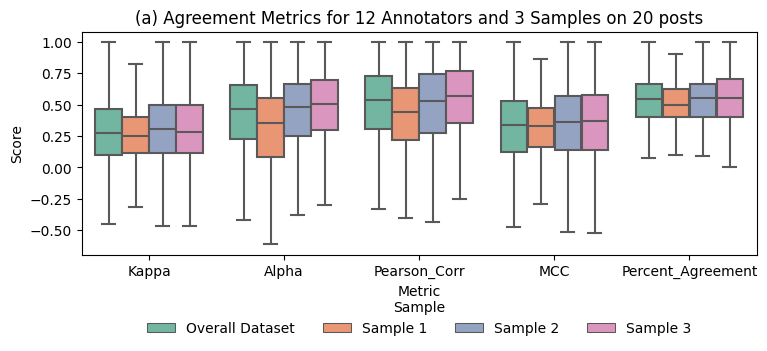

T-test results between the average of all samples and overall dataset:
              Metric  T-statistic   P-value
0              Kappa     0.075745  0.939622
1              Alpha    -0.040982  0.967310
2       Pearson_Corr    -0.047740  0.961924
3                MCC     0.094140  0.924998
4  Percent_Agreement     0.021593  0.982773


In [202]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, accuracy_score
import krippendorff
import matplotlib.pyplot as plt
import seaborn as sns

# Example seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming df is your DataFrame
# df = merged_df.copy()

# Convert Emotion_y to lowercase and remove any quotes
df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')

# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion:
        return 'positive'
    elif 'negative' in emotion:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'Emotion_y' column
df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)

# Convert Emotion_y to numerical form for scoring
emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)

# Function to create samples with different seeds
def create_samples(df, seeds, n_participants=5):
    samples = []
    for seed in seeds:
        np.random.seed(seed)
        participants = df['Participant email'].dropna().unique()
        sample_participants = np.random.choice(participants, size=n_participants, replace=False)
        sample_df = df[df['Participant email'].isin(sample_participants)]
        samples.append(sample_df)
    return samples

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Emotion Score': df['Emotion_Score'].mean(),
        'Median Emotion Score': df['Emotion_Score'].median(),
        'Standard Deviation': df['Emotion_Score'].std(),
        'Variance': df['Emotion_Score'].var(),
    }
    return stats

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Kappa': [], 'Alpha': [], 'Pearson_Corr': [], 'MCC': [], 'Percent_Agreement': []}

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]
            
            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
            if len(df_pair) < 2:
                continue
            
            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Emotion_Score').dropna()
            
            if pivot_df.shape[1] < 2:
                continue

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # Calculate Cohen's Kappa
            kappa = safe_cohen_kappa_score(scores1, scores2)
            metrics['Kappa'].append(kappa)

            # Calculate Krippendorff's Alpha
            if len(set(scores1)) > 1 and len(set(scores2)) > 1:
                alpha = krippendorff.alpha(reliability_data=[scores1, scores2], level_of_measurement='ordinal')
            else:
                alpha = np.nan
            metrics['Alpha'].append(alpha)

            # Calculate Pearson Correlation
            if len(scores1) > 1 and len(scores2) > 1 and np.std(scores1) > 0 and np.std(scores2) > 0:
                pearson_corr, _ = pearsonr(scores1, scores2)
            else:
                pearson_corr = np.nan
            metrics['Pearson_Corr'].append(pearson_corr)

            # Calculate MCC
            mcc = safe_matthews_corrcoef(scores1, scores2)
            metrics['MCC'].append(mcc)

            # Calculate Percent Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent_Agreement'].append(percent_agreement)
    
    return metrics

# Function for bootstrap sampling with replacement
def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {'Kappa': [], 'Alpha': [], 'Pearson_Corr': [], 'MCC': [], 'Percent_Agreement': []}

    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        metrics = compute_agreement_metrics(bootstrap_sample)
        
        for key in bootstrap_metrics.keys():
            bootstrap_metrics[key].extend(metrics[key])

    return pd.DataFrame(bootstrap_metrics)

# Define seeds for each sample
seeds = [42, 43, 44]

# Generate samples with different seeds
samples = create_samples(df, seeds)

# Collect metrics for the overall dataset
bootstrap_results_overall = bootstrap_sampling_with_replacement(df)

# Collect metrics for each sample
all_sample_results = []
for i, sample_df in enumerate(samples):
    bootstrap_results_sample = bootstrap_sampling_with_replacement(sample_df)
    all_sample_results.append(bootstrap_results_sample)

# Melt the results for plotting
all_bootstrap_results_melted = pd.concat([
    bootstrap_results_overall.assign(Sample='Overall Dataset'),
    *[result.assign(Sample=f'Sample {i+1}') for i, result in enumerate(all_sample_results)]
])

# Melt the results for seaborn boxplot
all_bootstrap_results_melted = all_bootstrap_results_melted.melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 4))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)

# Calculate and annotate the mean values
mean_values = all_bootstrap_results_melted.groupby(['Sample', 'Metric']).mean().reset_index()

for i, metric in enumerate(mean_values['Metric'].unique()):
    for j, sample in enumerate(mean_values['Sample'].unique()):
        row = mean_values[(mean_values['Metric'] == metric) & (mean_values['Sample'] == sample)]
        if not row.empty:
            y = row['Value'].values[0]
            x_pos = i + j * 0.02
            # ax.text(x_pos, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, title='Sample', frameon=False)
# plt.legend(title='Sample', bbox_to_anchor=(0.5, -0.15), loc='upper left', frameon=False)
# plt.legend(title='Sample', bbox_to_anchor=(1.35, 0.5), loc='center right', frameon=False)


plt.title("(a) Agreement Metrics for 12 Annotators and 3 Samples on 20 posts")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.0)  # Adjust padding to prevent overlap
plt.show()

# Statistical Testing: T-tests between the average of all samples and the overall dataset
print("T-test results between the average of all samples and overall dataset:")
t_test_summary = {'Metric': [], 'T-statistic': [], 'P-value': []}

for metric in ['Kappa', 'Alpha', 'Pearson_Corr', 'MCC', 'Percent_Agreement']:
    sample_averages = [result[metric].dropna().mean() for result in all_sample_results]
    overall_data = bootstrap_results_overall[metric].dropna()

    if len(sample_averages) > 1 and len(overall_data) > 1:
        stat, p_value = ttest_ind(sample_averages, overall_data)
        t_test_summary['Metric'].append(metric)
        t_test_summary['T-statistic'].append(stat)
        t_test_summary['P-value'].append(p_value)
    else:
        t_test_summary['Metric'].append(metric)
        t_test_summary['T-statistic'].append(np.nan)
        t_test_summary['P-value'].append(np.nan)

t_test_summary_df = pd.DataFrame(t_test_summary)
print(t_test_summary_df)


/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


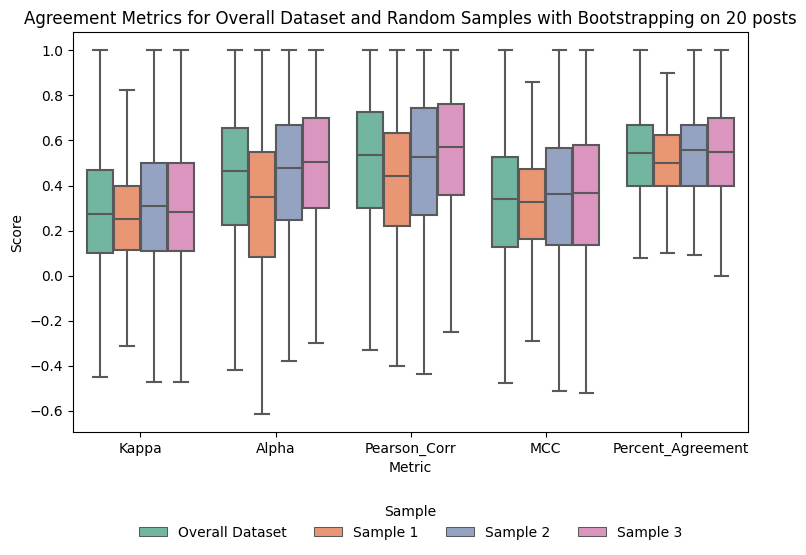

T-test results between the average of all samples and overall dataset:
              Metric  T-statistic   P-value
0              Kappa     0.075745  0.939622
1              Alpha    -0.040982  0.967310
2       Pearson_Corr    -0.047740  0.961924
3                MCC     0.094140  0.924998
4  Percent_Agreement     0.021593  0.982773


In [44]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, accuracy_score
import krippendorff
import matplotlib.pyplot as plt
import seaborn as sns

# Example seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming df is your DataFrame
# df = merged_df.copy()

# Convert Emotion_y to lowercase and remove any quotes
df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')

# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion:
        return 'positive'
    elif 'negative' in emotion:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the 'Emotion_y' column
df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)

# Convert Emotion_y to numerical form for scoring
emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)

# Function to create samples with different seeds
def create_samples(df, seeds, n_participants=5):
    samples = []
    for seed in seeds:
        np.random.seed(seed)
        participants = df['Participant email'].dropna().unique()
        sample_participants = np.random.choice(participants, size=n_participants, replace=False)
        sample_df = df[df['Participant email'].isin(sample_participants)]
        samples.append(sample_df)
    return samples

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Emotion Score': df['Emotion_Score'].mean(),
        'Median Emotion Score': df['Emotion_Score'].median(),
        'Standard Deviation': df['Emotion_Score'].std(),
        'Variance': df['Emotion_Score'].var(),
    }
    return stats

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Kappa': [], 'Alpha': [], 'Pearson_Corr': [], 'MCC': [], 'Percent_Agreement': []}

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]
            
            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
            if len(df_pair) < 2:
                continue
            
            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Emotion_Score').dropna()
            
            if pivot_df.shape[1] < 2:
                continue

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # Calculate Cohen's Kappa
            kappa = safe_cohen_kappa_score(scores1, scores2)
            metrics['Kappa'].append(kappa)

            # Calculate Krippendorff's Alpha
            if len(set(scores1)) > 1 and len(set(scores2)) > 1:
                alpha = krippendorff.alpha(reliability_data=[scores1, scores2], level_of_measurement='ordinal')
            else:
                alpha = np.nan
            metrics['Alpha'].append(alpha)

            # Calculate Pearson Correlation
            if len(scores1) > 1 and len(scores2) > 1 and np.std(scores1) > 0 and np.std(scores2) > 0:
                pearson_corr, _ = pearsonr(scores1, scores2)
            else:
                pearson_corr = np.nan
            metrics['Pearson_Corr'].append(pearson_corr)

            # Calculate MCC
            mcc = safe_matthews_corrcoef(scores1, scores2)
            metrics['MCC'].append(mcc)

            # Calculate Percent Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent_Agreement'].append(percent_agreement)
    
    return metrics

# Function for bootstrap sampling with replacement
def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {'Kappa': [], 'Alpha': [], 'Pearson_Corr': [], 'MCC': [], 'Percent_Agreement': []}

    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        metrics = compute_agreement_metrics(bootstrap_sample)
        
        for key in bootstrap_metrics.keys():
            bootstrap_metrics[key].extend(metrics[key])

    return pd.DataFrame(bootstrap_metrics)

# Define seeds for each sample
seeds = [42, 43, 44]

# Generate samples with different seeds
samples = create_samples(df, seeds)

# Collect metrics for the overall dataset
bootstrap_results_overall = bootstrap_sampling_with_replacement(df)

# Collect metrics for each sample
all_sample_results = []
for i, sample_df in enumerate(samples):
    bootstrap_results_sample = bootstrap_sampling_with_replacement(sample_df)
    all_sample_results.append(bootstrap_results_sample)

# Melt the results for plotting
all_bootstrap_results_melted = pd.concat([
    bootstrap_results_overall.assign(Sample='Overall Dataset'),
    *[result.assign(Sample=f'Sample {i+1}') for i, result in enumerate(all_sample_results)]
])

# Melt the results for seaborn boxplot
all_bootstrap_results_melted = all_bootstrap_results_melted.melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 6))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)

# Calculate and annotate the mean values
mean_values = all_bootstrap_results_melted.groupby(['Sample', 'Metric']).mean().reset_index()

for i, metric in enumerate(mean_values['Metric'].unique()):
    for j, sample in enumerate(mean_values['Sample'].unique()):
        row = mean_values[(mean_values['Metric'] == metric) & (mean_values['Sample'] == sample)]
        if not row.empty:
            y = row['Value'].values[0]
            x_pos = i + j * 0.02
            # ax.text(x_pos, y + 0.02, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, title='Sample', frameon=False)

plt.title("Agreement Metrics for Overall Dataset and Random Samples with Bootstrapping on 20 posts")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.0)  # Adjust padding to prevent overlap
plt.show()

# Statistical Testing: T-tests between the average of all samples and the overall dataset
print("T-test results between the average of all samples and overall dataset:")
t_test_summary = {'Metric': [], 'T-statistic': [], 'P-value': []}

for metric in ['Kappa', 'Alpha', 'Pearson_Corr', 'MCC', 'Percent_Agreement']:
    sample_averages = [result[metric].dropna().mean() for result in all_sample_results]
    overall_data = bootstrap_results_overall[metric].dropna()

    if len(sample_averages) > 1 and len(overall_data) > 1:
        stat, p_value = ttest_ind(sample_averages, overall_data)
        t_test_summary['Metric'].append(metric)
        t_test_summary['T-statistic'].append(stat)
        t_test_summary['P-value'].append(p_value)
    else:
        t_test_summary['Metric'].append(metric)
        t_test_summary['T-statistic'].append(np.nan)
        t_test_summary['P-value'].append(np.nan)

t_test_summary_df = pd.DataFrame(t_test_summary)
print(t_test_summary_df)


In [60]:
mean_values

Sample             Metric     Value
0   Overall Dataset              Alpha  0.422168
1   Overall Dataset              Kappa  0.277680
2   Overall Dataset                MCC  0.314055
3   Overall Dataset       Pearson_Corr  0.479433
4   Overall Dataset  Percent_Agreement  0.534937
5          Sample 1              Alpha  0.319913
6          Sample 1              Kappa  0.260239
7          Sample 1                MCC  0.307809
8          Sample 1       Pearson_Corr  0.405601
9          Sample 1  Percent_Agreement  0.512173
10         Sample 2              Alpha  0.436868
11         Sample 2              Kappa  0.305693
12         Sample 2                MCC  0.336726
13         Sample 2       Pearson_Corr  0.475478
14         Sample 2  Percent_Agreement  0.546938
15         Sample 3              Alpha  0.487059
16         Sample 3              Kappa  0.304564
17         Sample 3                MCC  0.347973
18         Sample 3       Pearson_Corr  0.529707
19         Sample 3  Percent_Agreement  0.552870

In [187]:
df=df_new.copy()

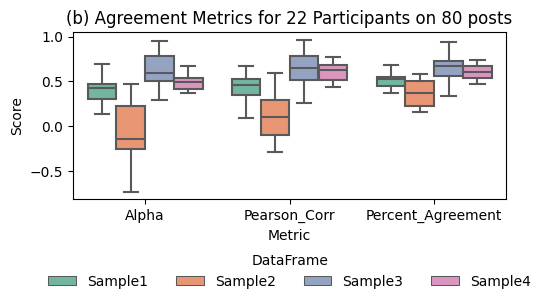

DataFrame             Metric     Value
0    Sample1              Alpha  0.385001
1    Sample1       Pearson_Corr  0.425511
2    Sample1  Percent_Agreement  0.501754
3    Sample2              Alpha -0.097448
4    Sample2       Pearson_Corr  0.127382
5    Sample2  Percent_Agreement  0.363158
6    Sample3              Alpha  0.616940
7    Sample3       Pearson_Corr  0.648145
8    Sample3  Percent_Agreement  0.644444
9    Sample4              Alpha  0.495071
10   Sample4       Pearson_Corr  0.607808
11   Sample4  Percent_Agreement  0.610526

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, accuracy_score
import krippendorff
import matplotlib.pyplot as plt
import seaborn as sns

# # Sample DataFrames for demonstration (replace these with your actual DataFrames)
# df1 = df.copy()  # Assuming df is your original DataFrame, replace with actual df1
# df2 = df.copy()  # Replace with actual df2
# df3 = df.copy()  # Replace with actual df3
# df4 = df.copy()  # Replace with actual df4
# df6 = df.copy()  # Replace with actual df6

dataframes = {'Sample1': df1, 'Sample2': df2, 'Sample3': df3, 'Sample4': df4}# 'df5': df6}

# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion:
        return 'positive'
    elif 'negative' in emotion:
        return 'negative'
    else:
        return 'neutral'

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Emotion Score': df['Emotion_Score'].mean(),
        'Median Emotion Score': df['Emotion_Score'].median(),
        'Standard Deviation': df['Emotion_Score'].std(),
        'Variance': df['Emotion_Score'].var(),
    }
    return stats

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Alpha': [], 'Pearson_Corr': [], 'Percent_Agreement': []}

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]
            
            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
            if len(df_pair) < 2:
                continue
            
            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Emotion_Score').dropna()
            
            if pivot_df.shape[1] < 2:
                continue

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # # Calculate Cohen's Kappa
            # kappa = safe_cohen_kappa_score(scores1, scores2)
            # metrics['Kappa'].append(kappa)

            # Calculate Krippendorff's Alpha
            alpha = krippendorff.alpha(reliability_data=[scores1, scores2], level_of_measurement='ordinal')
            metrics['Alpha'].append(alpha)

            # Calculate Pearson Correlation
            if len(scores1) > 1 and len(scores2) > 1 and np.std(scores1) > 0 and np.std(scores2) > 0:
                pearson_corr, _ = pearsonr(scores1, scores2)
            else:
                pearson_corr = np.nan
            metrics['Pearson_Corr'].append(pearson_corr)

            # # Calculate MCC
            # mcc = safe_matthews_corrcoef(scores1, scores2)
            # metrics['MCC'].append(mcc)

            # Calculate Percent Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent_Agreement'].append(percent_agreement)
    
    return metrics

# Collect metrics for each DataFrame
all_metrics_results = []

for name, df in dataframes.items():
    # Preprocess the DataFrame
    df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')
    df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)
    emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
    df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)
    
    # Compute agreement metrics
    metrics = compute_agreement_metrics(df)
    metrics_df = pd.DataFrame(metrics)
    metrics_df['DataFrame'] = name
    all_metrics_results.append(metrics_df)

# Concatenate all results
all_metrics_results_df = pd.concat(all_metrics_results)

# Melt the results for plotting
metrics_melted = all_metrics_results_df.melt(id_vars=['DataFrame'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(6, 4))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Value', hue='DataFrame', data=metrics_melted, palette='Set2', showfliers=False)

# Calculate and annotate the mean values
mean_values = metrics_melted.groupby(['DataFrame', 'Metric']).mean().reset_index()

for i, metric in enumerate(mean_values['Metric'].unique()):
    for j, df_name in enumerate(mean_values['DataFrame'].unique()):
        row = mean_values[(mean_values['Metric'] == metric) & (mean_values['DataFrame'] == df_name)]
        if not row.empty:
            y = row['Value'].values[0]
            x_pos = i + j * 0.08
            # ax.text(x_pos, y + 0.05, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=5, title='DataFrame', frameon=False)
# plt.legend(title='Dataframe', bbox_to_anchor=(0.5, -0.15), loc='upper left', frameon=False)
# plt.legend(title='Dataframe', bbox_to_anchor=(1.25, 0.5), loc='center right', frameon=False)


plt.title("(b) Agreement Metrics for 22 Participants on 80 posts")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.9)  # Adjust padding to prevent overlap
plt.show()
mean_values

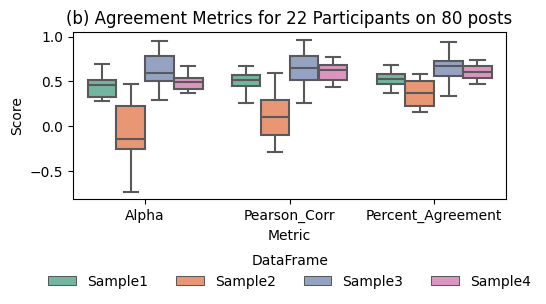


Overall Performance for Each Metric:
Metric
Alpha                0.363835
Pearson_Corr         0.471058
Percent_Agreement    0.534795
Name: Value, dtype: float64


In [11]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
import krippendorff
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the necessary DataFrames (df1, df2, df3, df4)

dataframes = {'Sample1': df1, 'Sample2': df2, 'Sample3': df3, 'Sample4': df4}  # 'df5': df6}

# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion:
        return 'positive'
    elif 'negative' in emotion:
        return 'negative'
    else:
        return 'neutral'

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Alpha': [], 'Pearson_Corr': [], 'Percent_Agreement': []}

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]
            
            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
            if len(df_pair) < 2:
                continue
            
            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Emotion_Score').dropna()
            
            if pivot_df.shape[1] < 2:
                continue

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # Calculate Krippendorff's Alpha
            alpha = krippendorff.alpha(reliability_data=[scores1, scores2], level_of_measurement='ordinal')
            metrics['Alpha'].append(alpha)

            # Calculate Pearson Correlation
            if len(scores1) > 1 and len(scores2) > 1 and np.std(scores1) > 0 and np.std(scores2) > 0:
                pearson_corr, _ = pearsonr(scores1, scores2)
            else:
                pearson_corr = np.nan
            metrics['Pearson_Corr'].append(pearson_corr)

            # Calculate Percent Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent_Agreement'].append(percent_agreement)
    
    return metrics

# Function to select 5 unique participants for each DataFrame
def select_five_participants(df):
    participants = df['Participant email'].dropna().unique()
    selected_participants = np.random.choice(participants, size=5, replace=False)
    return df[df['Participant email'].isin(selected_participants)]

# Collect metrics for each DataFrame
all_metrics_results = []

for name, df in dataframes.items():
    # Preprocess the DataFrame
    df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')
    df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)
    emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
    df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)
    
    # Select 5 unique participants
    df = select_five_participants(df)
    
    # Compute agreement metrics
    metrics = compute_agreement_metrics(df)
    metrics_df = pd.DataFrame(metrics)
    metrics_df['DataFrame'] = name
    all_metrics_results.append(metrics_df)

# Concatenate all results
all_metrics_results_df = pd.concat(all_metrics_results)

# Melt the results for plotting
metrics_melted = all_metrics_results_df.melt(id_vars=['DataFrame'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(6, 4))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Value', hue='DataFrame', data=metrics_melted, palette='Set2', showfliers=False)

# Calculate and annotate the mean values
mean_values = metrics_melted.groupby(['DataFrame', 'Metric']).mean().reset_index()

for i, metric in enumerate(mean_values['Metric'].unique()):
    for j, df_name in enumerate(mean_values['DataFrame'].unique()):
        row = mean_values[(mean_values['Metric'] == metric) & (mean_values['DataFrame'] == df_name)]
        if not row.empty:
            y = row['Value'].values[0]
            x_pos = i + j * 0.08
            # ax.text(x_pos, y + 0.05, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=5, title='DataFrame', frameon=False)
plt.title("(b) Agreement Metrics for 22 Participants on 80 posts")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.9)  # Adjust padding to prevent overlap
plt.show()

# Overall performance for each metric
overall_performance = metrics_melted.groupby('Metric')['Value'].mean()
print("\nOverall Performance for Each Metric:")
print(overall_performance)


In [12]:
mean_values

DataFrame             Metric     Value
0    Sample1              Alpha  0.440777
1    Sample1       Pearson_Corr  0.500896
2    Sample1  Percent_Agreement  0.521053
3    Sample2              Alpha -0.097448
4    Sample2       Pearson_Corr  0.127382
5    Sample2  Percent_Agreement  0.363158
6    Sample3              Alpha  0.616940
7    Sample3       Pearson_Corr  0.648145
8    Sample3  Percent_Agreement  0.644444
9    Sample4              Alpha  0.495071
10   Sample4       Pearson_Corr  0.607808
11   Sample4  Percent_Agreement  0.610526

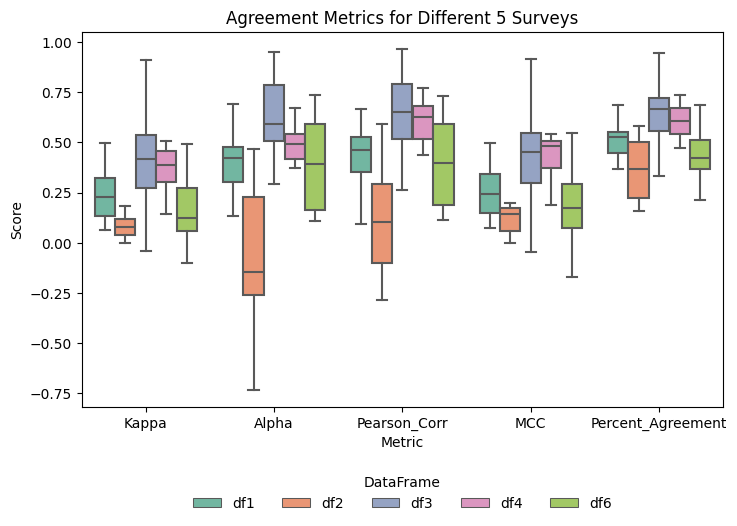

In [66]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, accuracy_score
import krippendorff
import matplotlib.pyplot as plt
import seaborn as sns

# # Sample DataFrames for demonstration (replace these with your actual DataFrames)
# df1 = df.copy()  # Assuming df is your original DataFrame, replace with actual df1
# df2 = df.copy()  # Replace with actual df2
# df3 = df.copy()  # Replace with actual df3
# df4 = df.copy()  # Replace with actual df4
# df6 = df.copy()  # Replace with actual df6

dataframes = {'df1': df1, 'df2': df2, 'df3': df3, 'df4': df4, 'df6': df6}

# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion:
        return 'positive'
    elif 'negative' in emotion:
        return 'negative'
    else:
        return 'neutral'

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Emotion Score': df['Emotion_Score'].mean(),
        'Median Emotion Score': df['Emotion_Score'].median(),
        'Standard Deviation': df['Emotion_Score'].std(),
        'Variance': df['Emotion_Score'].var(),
    }
    return stats

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Kappa': [], 'Alpha': [], 'Pearson_Corr': [], 'MCC': [], 'Percent_Agreement': []}

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]
            
            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
            if len(df_pair) < 2:
                continue
            
            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Emotion_Score').dropna()
            
            if pivot_df.shape[1] < 2:
                continue

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # Calculate Cohen's Kappa
            kappa = safe_cohen_kappa_score(scores1, scores2)
            metrics['Kappa'].append(kappa)

            # Calculate Krippendorff's Alpha
            alpha = krippendorff.alpha(reliability_data=[scores1, scores2], level_of_measurement='ordinal')
            metrics['Alpha'].append(alpha)

            # Calculate Pearson Correlation
            if len(scores1) > 1 and len(scores2) > 1 and np.std(scores1) > 0 and np.std(scores2) > 0:
                pearson_corr, _ = pearsonr(scores1, scores2)
            else:
                pearson_corr = np.nan
            metrics['Pearson_Corr'].append(pearson_corr)

            # Calculate MCC
            mcc = safe_matthews_corrcoef(scores1, scores2)
            metrics['MCC'].append(mcc)

            # Calculate Percent Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent_Agreement'].append(percent_agreement)
    
    return metrics

# Collect metrics for each DataFrame
all_metrics_results = []

for name, df in dataframes.items():
    # Preprocess the DataFrame
    df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')
    df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)
    emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
    df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)
    
    # Compute agreement metrics
    metrics = compute_agreement_metrics(df)
    metrics_df = pd.DataFrame(metrics)
    metrics_df['DataFrame'] = name
    all_metrics_results.append(metrics_df)

# Concatenate all results
all_metrics_results_df = pd.concat(all_metrics_results)

# Melt the results for plotting
metrics_melted = all_metrics_results_df.melt(id_vars=['DataFrame'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 6))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Value', hue='DataFrame', data=metrics_melted, palette='Set2', showfliers=False)

# Calculate and annotate the mean values
mean_values = metrics_melted.groupby(['DataFrame', 'Metric']).mean().reset_index()

for i, metric in enumerate(mean_values['Metric'].unique()):
    for j, df_name in enumerate(mean_values['DataFrame'].unique()):
        row = mean_values[(mean_values['Metric'] == metric) & (mean_values['DataFrame'] == df_name)]
        if not row.empty:
            y = row['Value'].values[0]
            x_pos = i + j * 0.08
            # ax.text(x_pos, y + 0.05, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='DataFrame', frameon=False)

plt.title("Agreement Metrics for Different 5 Surveys")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.9)  # Adjust padding to prevent overlap
plt.show()


In [67]:
mean_values

DataFrame             Metric     Value
0        df1              Alpha  0.385001
1        df1              Kappa  0.238395
2        df1                MCC  0.254677
3        df1       Pearson_Corr  0.425511
4        df1  Percent_Agreement  0.501754
5        df2              Alpha -0.097448
6        df2              Kappa  0.102180
7        df2                MCC  0.139014
8        df2       Pearson_Corr  0.127382
9        df2  Percent_Agreement  0.363158
10       df3              Alpha  0.616940
11       df3              Kappa  0.414674
12       df3                MCC  0.431001
13       df3       Pearson_Corr  0.648145
14       df3  Percent_Agreement  0.644444
15       df4              Alpha  0.495071
16       df4              Kappa  0.363968
17       df4                MCC  0.412904
18       df4       Pearson_Corr  0.607808
19       df4  Percent_Agreement  0.610526
20       df6              Alpha  0.398604
21       df6              Kappa  0.171784
22       df6                MCC  0.197420
23       df6       Pearson_Corr  0.410643
24       df6  Percent_Agreement  0.421053

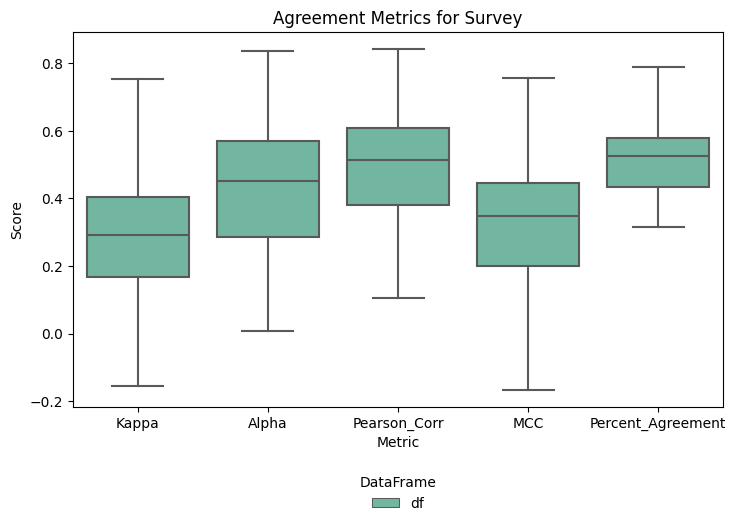

In [107]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, accuracy_score
import krippendorff
import matplotlib.pyplot as plt
import seaborn as sns

# Function to adjust emotions to only three labels
def adjust_emotions(emotion):
    if 'positive' in emotion:
        return 'positive'
    elif 'negative' in emotion:
        return 'negative'
    else:
        return 'neutral'

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return cohen_kappa_score(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    try:
        if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
            return np.nan
        return matthews_corrcoef(y_true, y_pred)
    except ValueError:
        return np.nan

# Function to calculate percentage agreement
def calculate_percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate basic descriptive statistics
def calculate_basic_statistics(df):
    stats = {
        'Mean Emotion Score': df['Emotion_Score'].mean(),
        'Median Emotion Score': df['Emotion_Score'].median(),
        'Standard Deviation': df['Emotion_Score'].std(),
        'Variance': df['Emotion_Score'].var(),
    }
    return stats

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Kappa': [], 'Alpha': [], 'Pearson_Corr': [], 'MCC': [], 'Percent_Agreement': []}

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]
            
            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
            if len(df_pair) < 2:
                continue
            
            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Emotion_Score').dropna()
            
            if pivot_df.shape[1] < 2:
                continue

            scores1 = pivot_df.iloc[:, 0]
            scores2 = pivot_df.iloc[:, 1]
            
            # Calculate Cohen's Kappa
            kappa = safe_cohen_kappa_score(scores1, scores2)
            metrics['Kappa'].append(kappa)

            # Calculate Krippendorff's Alpha
            alpha = krippendorff.alpha(reliability_data=[scores1, scores2], level_of_measurement='ordinal')
            metrics['Alpha'].append(alpha)

            # Calculate Pearson Correlation
            if len(scores1) > 1 and len(scores2) > 1 and np.std(scores1) > 0 and np.std(scores2) > 0:
                pearson_corr, _ = pearsonr(scores1, scores2)
            else:
                pearson_corr = np.nan
            metrics['Pearson_Corr'].append(pearson_corr)

            # Calculate MCC
            mcc = safe_matthews_corrcoef(scores1, scores2)
            metrics['MCC'].append(mcc)

            # Calculate Percent Agreement
            percent_agreement = calculate_percentage_agreement(scores1, scores2)
            metrics['Percent_Agreement'].append(percent_agreement)
    
    return metrics

# Preprocess the DataFrame
df['Emotion_y'] = df['Emotion_y'].str.lower().str.replace('"', '')
df['Emotion_y'] = df['Emotion_y'].apply(adjust_emotions)
emotion_mapping = {'neutral': 0, 'positive': 1, 'negative': -1}
df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)

# Compute agreement metrics
metrics = compute_agreement_metrics(df)
metrics_df = pd.DataFrame(metrics)
metrics_df['DataFrame'] = 'df'

# Melt the results for plotting
metrics_melted = metrics_df.melt(id_vars=['DataFrame'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 6))

# Draw the boxplot
ax = sns.boxplot(x='Metric', y='Value', hue='DataFrame', data=metrics_melted, palette='Set2', showfliers=False)

# Calculate and annotate the mean values
mean_values = metrics_melted.groupby(['DataFrame', 'Metric']).mean().reset_index()

for i, metric in enumerate(mean_values['Metric'].unique()):
    for j, df_name in enumerate(mean_values['DataFrame'].unique()):
        row = mean_values[(mean_values['Metric'] == metric) & (mean_values['DataFrame'] == df_name)]
        if not row.empty:
            y = row['Value'].values[0]
            x_pos = i + j * 0.08
            # ax.text(x_pos, y + 0.05, f"{y:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='DataFrame', frameon=False)

plt.title("Agreement Metrics for Survey")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout(pad=2.9)  # Adjust padding to prevent overlap
plt.show()


In [109]:
print(mean_values)

  DataFrame             Metric     Value
0        df              Alpha  0.434455
1        df              Kappa  0.286341
2        df                MCC  0.313053
3        df       Pearson_Corr  0.480338
4        df  Percent_Agreement  0.535885


In [90]:
df=df_new.copy()

Unique values and encoding:
Mode_Score unique values: <IntegerArray>
[1, -1, 0]
Length: 3, dtype: Int64
llama3_sentiment unique values: ['positive' 'neutral' 'negative']
Encoded Mode_Score unique values: [2 0 1]
Encoded llama3_sentiment unique values: [2 1 0]
Processing the DataFrame...


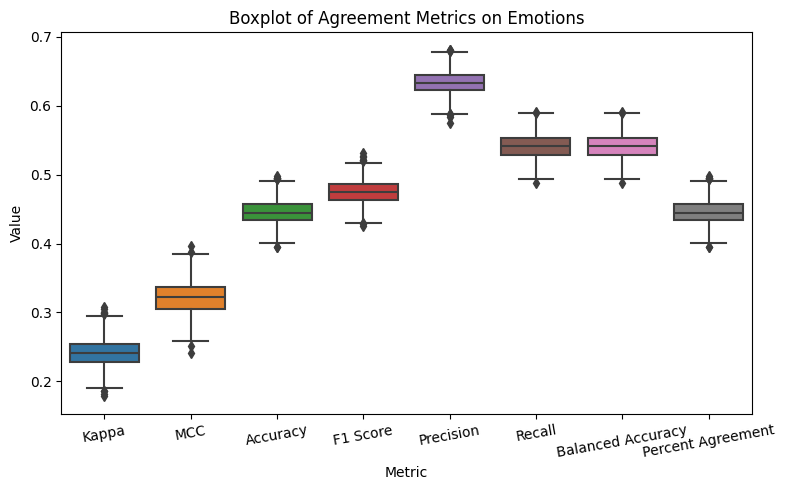

Overall metrics:
      Kappa       MCC  Accuracy  F1 Score  Precision    Recall  \
0  0.241008  0.321129  0.444598  0.474947   0.633341  0.540715   

   Balanced Accuracy  Percent Agreement  
0           0.540715           0.444598  


In [94]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import (
    cohen_kappa_score,
    matthews_corrcoef,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    balanced_accuracy_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Function to handle Cohen's Kappa calculation safely
def safe_cohen_kappa_score(y_true, y_pred):
    if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
        return np.nan
    return cohen_kappa_score(y_true, y_pred)

# Function to handle Matthews Correlation Coefficient calculation safely
def safe_matthews_corrcoef(y_true, y_pred):
    if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
        return np.nan
    return matthews_corrcoef(y_true, y_pred)

# Function to calculate percentage agreement
def percentage_agreement(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))

# Function to calculate agreement metrics between ground truth and model predictions
def calculate_agreement_metrics(y_true, y_pred):
    if len(set(y_true)) < 2 or len(set(y_pred)) < 2:
        return (np.nan,) * 8
    
    kappa = safe_cohen_kappa_score(y_true, y_pred)
    mcc = safe_matthews_corrcoef(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    percent_agreement = percentage_agreement(y_true, y_pred)
    return kappa, mcc, accuracy, f1, precision, recall, balanced_accuracy, percent_agreement

# Perform bootstrap sampling
def bootstrap_sampling(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = []
    
    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        y_true = bootstrap_sample['Mode_Score_encoded'].values
        y_pred = bootstrap_sample['llama3_sentiment_encoded'].values
        metrics = calculate_agreement_metrics(y_true, y_pred)
        bootstrap_metrics.append(metrics)
    
    columns = ['Kappa', 'MCC', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'Balanced Accuracy', 'Percent Agreement']
    return pd.DataFrame(bootstrap_metrics, columns=columns)

# Ensure consistent emotion mapping for both columns
def map_emotions(df):
    emotion_mapping = {
        'negative': -1,
        'neutral': 0,
        'positive': 1
    }
    
    # Reverse mapping for decoding
    reverse_emotion_mapping = {v: k for k, v in emotion_mapping.items()}

    # Convert columns to lowercase
    df['llama3_sentiment'] = df['llama3_sentiment'].str.lower()
    df['Mode_Score2'] = df['Mode_Score2'].str.lower()

    # Map emotions to text labels
    df['Mode_Score_mapped'] = df['Mode_Score2'].map(emotion_mapping)
    df['llama3_sentiment_mapped'] = df['llama3_sentiment'].map(emotion_mapping)

    return df

# Convert 'Emotion_y' to lowercase
df['Emotion_y'] = df['Emotion_y'].str.lower()

# Mapping emotions to numeric values
emotion_mapping = {
    'neutral': 0,
    'positive': 1,
    'negative': -1
}

# Reverse mapping for emotions
reverse_emotion_mapping = {v: k for k, v in emotion_mapping.items()}

# Map the 'Emotion_y' column to numeric values
df['Emotion_Score'] = df['Emotion_y'].map(emotion_mapping)

# Group by 'textid' and find the mode of 'Emotion_Score'
df_mode = df.groupby('textid')['Emotion_Score'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()

# Rename the mode column for clarity
df_mode.rename(columns={'Emotion_Score': 'Mode_Score'}, inplace=True)

# Merge the mode back to the original DataFrame
df = pd.merge(df, df_mode, on='textid', suffixes=('', '_mode'))

# Ensure the 'Mode_Score' is of integer type
df['Mode_Score'] = df['Mode_Score'].astype(pd.Int64Dtype())

# Create a column for the final emotional label as ground truth
df['Mode_Score2'] = df['Mode_Score'].map(reverse_emotion_mapping)

# Map emotions for consistency
df = map_emotions(df)

# Encode labels using text labels for consistency
def encode_labels(df):
    le = LabelEncoder()
    
    # Fit LabelEncoder on combined unique values from both columns
    all_labels = np.concatenate([df['Mode_Score2'].unique(), df['llama3_sentiment'].unique()])
    le.fit(all_labels)
    
    # Transform labels to encoded values
    df['Mode_Score_encoded'] = le.transform(df['Mode_Score2'])
    df['llama3_sentiment_encoded'] = le.transform(df['llama3_sentiment'])
    
    print("Unique values and encoding:")
    print("Mode_Score unique values:", df['Mode_Score'].unique())
    print("llama3_sentiment unique values:", df['llama3_sentiment'].unique())
    print("Encoded Mode_Score unique values:", df['Mode_Score_encoded'].unique())
    print("Encoded llama3_sentiment unique values:", df['llama3_sentiment_encoded'].unique())
    
    return df

# Apply the encode_labels function to the DataFrame
df = encode_labels(df)

# Calculate metrics and bootstrap sampling for the DataFrame
print("Processing the DataFrame...")

# Calculate agreement metrics for the entire dataset
y_true = df['Mode_Score_encoded'].values
y_pred = df['llama3_sentiment_encoded'].values

try:
    kappa, mcc, accuracy, f1, precision, recall, balanced_accuracy, percent_agreement = calculate_agreement_metrics(y_true, y_pred)
    results = {
        'Kappa': kappa,
        'MCC': mcc,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Balanced Accuracy': balanced_accuracy,
        'Percent Agreement': percent_agreement
    }
except Exception as e:
    print(f"Error calculating metrics: {e}")
    results = {
        'Kappa': np.nan,
        'MCC': np.nan,
        'Accuracy': np.nan,
        'F1 Score': np.nan,
        'Precision': np.nan,
        'Recall': np.nan,
        'Balanced Accuracy': np.nan,
        'Percent Agreement': np.nan
    }

# Perform bootstrap sampling for the DataFrame
bootstrap_results = bootstrap_sampling(df)
bootstrap_results.to_csv('agreement_metrics.csv', index=False)

# Melt the DataFrame for seaborn boxplot
bootstrap_results_melted = bootstrap_results.melt(var_name='Metric', value_name='Value')

# Plot the results
plt.figure(figsize=(8, 5))
sns.boxplot(data=bootstrap_results_melted, x='Metric', y='Value')
plt.title('Boxplot of Agreement Metrics on Emotions')
plt.xticks(rotation=10)
plt.tight_layout()
plt.savefig('agreement_metrics_boxplot.png')
plt.show()

# Print and save overall metrics
results_df = pd.DataFrame([results])
results_df.to_csv('overall_metrics.csv', index=False)
print("Overall metrics:")
print(results_df)


In [95]:
results_df

Kappa       MCC  Accuracy  F1 Score  Precision    Recall  \
0  0.241008  0.321129  0.444598  0.474947   0.633341  0.540715   

   Balanced Accuracy  Percent Agreement  
0           0.540715           0.444598

In [75]:
# df['Emotion_y']

In [79]:
# df['Emotion_Score']

In [82]:
df_mode

textid  Mode_Score
0    1085         1.0
1    1098         1.0
2    1099         1.0
3    1275         1.0
4     131        -1.0
..    ...         ...
91   8461        -1.0
92   8622         0.0
93   8700         0.0
94   8784         0.0
95   8963         0.0

[96 rows x 2 columns]

In [85]:
df['Mode_Score'].unique()

<IntegerArray>
[<NA>]
Length: 1, dtype: Int64

In [84]:
df['Mode_Score2'].unique()

array([nan], dtype=object)

In [87]:
df['llama3_sentiment_encoded']

0      2
1      2
2      2
3      2
4      2
      ..
717    2
718    2
719    2
720    2
721    2
Name: llama3_sentiment_encoded, Length: 722, dtype: int64

In [83]:
print("Unique Mode_Score_encoded values:", df['Mode_Score_encoded'].unique())
print("Unique llama3_sentiment_encoded values:", df['llama3_sentiment_encoded'].unique())


Unique Mode_Score_encoded values: [3]
Unique llama3_sentiment_encoded values: [2 1 0]


 ### Themes

In [68]:
df=df5.copy()

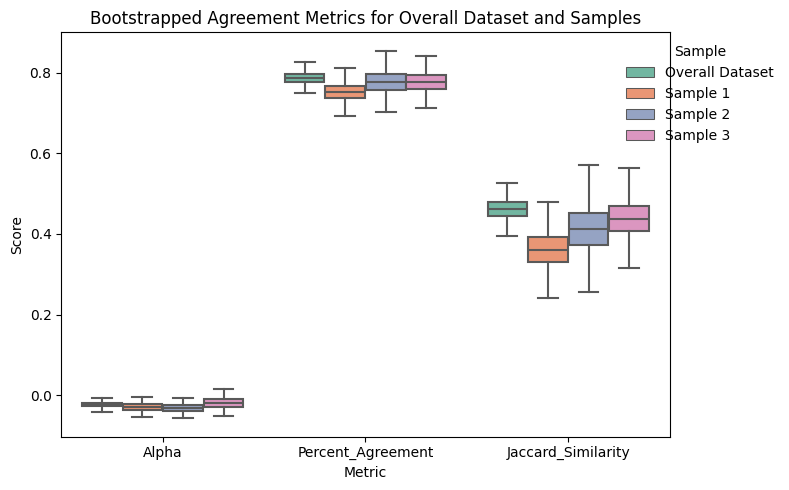

In [69]:
import numpy as np
import pandas as pd
import krippendorff
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Alpha': [], 'Percent_Agreement': [], 'Jaccard_Similarity': []}

    # Define the numerical mapping for themes
    theme_mapping = {
        'others': 0,
        'poverty': 1,
        'hunger': 2,
        'health': 3,
        'employment': 4,
        'education': 5,
        'security': 6
    }
    
    # Clean the 'Theme' column: remove quotes and convert to lowercase
    df['Theme'] = df['Theme'].str.replace('"', '').str.lower()

    # Map 'Theme' to 'Theme_Mapped'
    df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

    # Use MultiLabelBinarizer
    mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

    # Flatten the list of themes
    df['Theme_Binarized'] = df['Theme_Mapped'].apply(lambda x: mlb.fit_transform([x])[0])

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]
            
            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]
            
            if len(df_pair) < 2:
                continue
            
            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Theme_Binarized').dropna()

            if pivot_df.shape[1] < 2:
                continue

            themes1 = pivot_df.iloc[:, 0].values
            themes2 = pivot_df.iloc[:, 1].values

            if len(themes1) == 0 or len(themes2) == 0:
                continue

            # Convert to numpy arrays for Krippendorff's alpha
            themes1 = np.vstack(themes1)
            themes2 = np.vstack(themes2)

            # Flatten the data for Krippendorff's alpha
            reliability_data = np.concatenate([themes1, themes2], axis=1).T

            # Calculate Krippendorff's Alpha
            alpha = krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')
            metrics['Alpha'].append(alpha)

            # Calculate Percent Agreement
            percent_agreement = np.mean([np.mean(themes1[k] == themes2[k]) for k in range(themes1.shape[0])])
            metrics['Percent_Agreement'].append(percent_agreement)

            # Calculate Jaccard Similarity Score
            jaccard_scores = [jaccard_score(themes1[k], themes2[k]) for k in range(themes1.shape[0])]
            avg_jaccard = np.nanmean(jaccard_scores)
            metrics['Jaccard_Similarity'].append(avg_jaccard)

    return metrics

# Function for bootstrap sampling with replacement
def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {'Alpha': [], 'Percent_Agreement': [], 'Jaccard_Similarity': []}
    
    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        metrics = compute_agreement_metrics(bootstrap_sample)
        
        for metric in bootstrap_metrics:
            bootstrap_metrics[metric].append(np.nanmean(metrics[metric]))
    
    return pd.DataFrame(bootstrap_metrics)

# Function to create samples with different seeds
def create_samples(df, seeds, n_participants=5):
    samples = []
    for seed in seeds:
        np.random.seed(seed)
        participants = df['Participant email'].dropna().unique()
        sample_participants = np.random.choice(participants, size=n_participants, replace=False)
        sample_df = df[df['Participant email'].isin(sample_participants)]
        samples.append(sample_df)
    return samples

# Define seeds for each sample
seeds = [42, 43, 44]

# Generate samples with different seeds
samples = create_samples(df, seeds)

# Collect metrics for each sample
all_sample_results = []
for i, sample_df in enumerate(samples):
    bootstrap_results_sample = bootstrap_sampling_with_replacement(sample_df)
    all_sample_results.append(bootstrap_results_sample)

# Collect metrics for the overall dataset
bootstrap_results_overall = bootstrap_sampling_with_replacement(df)

# Combine results for plotting
all_bootstrap_results_melted = pd.concat([
    bootstrap_results_overall.assign(Sample='Overall Dataset'),
    *[result.assign(Sample=f'Sample {i+1}') for i, result in enumerate(all_sample_results)]
])

# Melt the results for seaborn boxplot
all_bootstrap_results_melted = all_bootstrap_results_melted.melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Metric', y='Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)
plt.title('Bootstrapped Agreement Metrics for Overall Dataset and Samples')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Sample', bbox_to_anchor=(0.5, -0.15), loc='upper center', frameon=False)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='DataFrame', frameon=False)

plt.tight_layout()
plt.show()


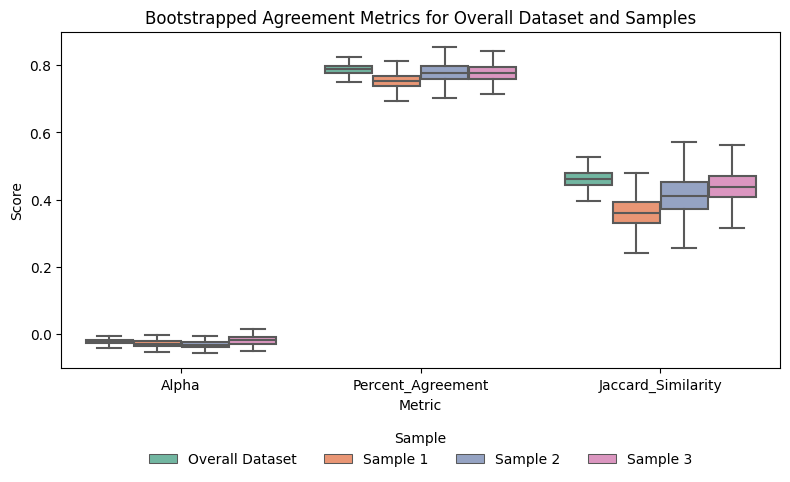

In [76]:
# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Metric', y='Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)
plt.title('Bootstrapped Agreement Metrics for Overall Dataset and Samples')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=0)
# plt.legend(title='Sample', bbox_to_anchor=(0.5, -0.15), loc='upper center', frameon=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='Sample', frameon=False)

plt.tight_layout()
plt.show()

In [70]:
# Calculate mean values for each dataset
mean_values_overall = bootstrap_results_overall.mean().to_frame().T
mean_values_overall['Sample'] = 'Overall Dataset'

mean_values_samples = []
for i, result in enumerate(all_sample_results):
    mean_values_sample = result.mean().to_frame().T
    mean_values_sample['Sample'] = f'Sample {i+1}'
    mean_values_samples.append(mean_values_sample)

mean_values_df = pd.concat([mean_values_overall, *mean_values_samples])
mean_values_df

Alpha  Percent_Agreement  Jaccard_Similarity           Sample
0 -0.023571           0.787193            0.462120  Overall Dataset
0 -0.029004           0.752095            0.362450         Sample 1
0 -0.032066           0.777294            0.414602         Sample 2
0 -0.019593           0.775507            0.438534         Sample 3

In [62]:
mean_values_df

Alpha  Percent_Agreement  Jaccard_Similarity           Sample
0 -0.023571           0.787193            0.462120  Overall Dataset
0 -0.029004           0.752095            0.362450         Sample 1
0 -0.032066           0.777294            0.414602         Sample 2
0 -0.019593           0.775507            0.438534         Sample 3

In [80]:
df=df_new.copy()

In [81]:
df.shape

(722, 83)

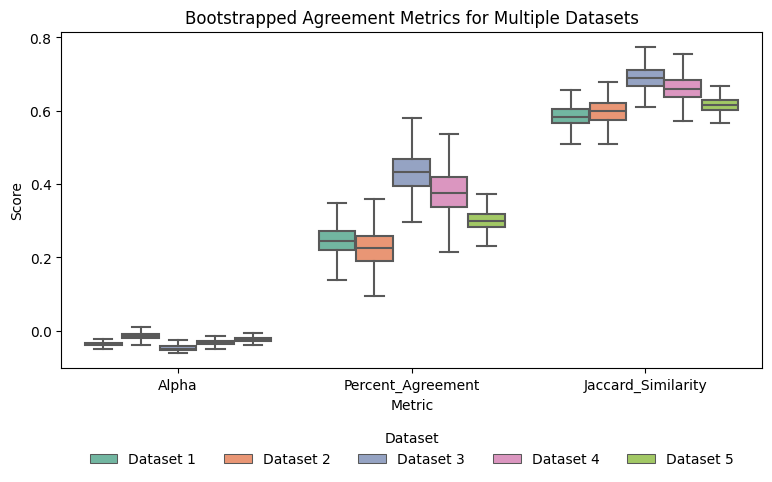

Mean Values for All Datasets:
      Alpha  Percent_Agreement  Jaccard_Similarity     Sample
0 -0.036583           0.247106            0.585021  Dataset 1
0 -0.014210           0.226775            0.598464  Dataset 2
0 -0.047774           0.431245            0.689539  Dataset 3
0 -0.033065           0.377759            0.661000  Dataset 4
0 -0.023571           0.300481            0.615799  Dataset 5


In [94]:
import numpy as np
import pandas as pd
import krippendorff
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute agreement metrics between pairs of participants
def compute_agreement_metrics(df):
    participants = df['Participant email'].unique()
    metrics = {'Alpha': [], 'Percent_Agreement': [], 'Jaccard_Similarity': []}

    # Define the numerical mapping for themes
    theme_mapping = {
        'others': 0,
        'poverty': 1,
        'hunger': 2,
        'health': 3,
        'employment': 4,
        'education': 5,
        'security': 6
    }

    # Clean the 'Theme' column: remove quotes and convert to lowercase
    df['Theme'] = df['Theme'].str.replace('"', '').str.lower()

    # Map 'Theme' to 'Theme_Mapped'
    df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

    # Use MultiLabelBinarizer
    mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

    # Fit the MultiLabelBinarizer once and transform the 'Theme_Mapped' column
    df['Theme_Binarized'] = list(mlb.fit_transform(df['Theme_Mapped']))

    # Iterate over each pair of participants
    for i in range(len(participants)):
        for j in range(i + 1, len(participants)):
            participant_1 = participants[i]
            participant_2 = participants[j]

            # Subset data for the pair of participants
            df_pair = df[df['Participant email'].isin([participant_1, participant_2])]

            if len(df_pair) < 2:
                continue

            # Pivot the data to have one participant per column
            pivot_df = df_pair.pivot_table(index='textid', columns='Participant email', values='Theme_Binarized').dropna()

            if pivot_df.shape[1] < 2:
                continue

            themes1 = pivot_df.iloc[:, 0].tolist()
            themes2 = pivot_df.iloc[:, 1].tolist()

            if not themes1 or not themes2:
                continue

            themes1 = np.vstack(themes1)
            themes2 = np.vstack(themes2)

            if themes1.size == 0 or themes2.size == 0:
                continue

            # Flatten the data for Krippendorff's alpha
            reliability_data = np.concatenate([themes1, themes2], axis=1).T

            # Calculate Krippendorff's Alpha
            alpha = krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')
            metrics['Alpha'].append(alpha)

            # Calculate Percent Agreement
            percent_agreement = np.mean(np.all(themes1 == themes2, axis=1))
            metrics['Percent_Agreement'].append(percent_agreement)

            # Calculate Jaccard Similarity Score
            jaccard_scores = [jaccard_score(themes1[k], themes2[k], average='macro') for k in range(themes1.shape[0])]
            avg_jaccard = np.nanmean(jaccard_scores)
            metrics['Jaccard_Similarity'].append(avg_jaccard)

    return metrics

# Function for bootstrap sampling with replacement
def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {'Alpha': [], 'Percent_Agreement': [], 'Jaccard_Similarity': []}

    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        metrics = compute_agreement_metrics(bootstrap_sample)

        for metric in bootstrap_metrics:
            bootstrap_metrics[metric].append(np.nanmean(metrics[metric]))

    return pd.DataFrame(bootstrap_metrics)

# Example usage with multiple DataFrames
dfs = [df1, df2, df3, df4, df5]  # Replace with your actual DataFrames
all_bootstrap_results = []
mean_values_all_dfs = []

for i, df in enumerate(dfs):
    bootstrap_results = bootstrap_sampling_with_replacement(df)
    all_bootstrap_results.append(bootstrap_results.assign(Sample=f'Dataset {i+1}'))
    mean_values = bootstrap_results.mean().to_frame().T
    mean_values['Sample'] = f'Dataset {i+1}'
    mean_values_all_dfs.append(mean_values)

# Combine mean values for all DataFrames and save to a CSV file
mean_values_all_dfs_df = pd.concat(mean_values_all_dfs)
mean_values_all_dfs_df.to_csv('mean_values_all_dfs.csv', index=False)

# Combine results for plotting
all_bootstrap_results_melted = pd.concat(all_bootstrap_results).melt(id_vars=['Sample'], var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Metric', y='Value', hue='Sample', data=all_bootstrap_results_melted, palette='Set2', showfliers=False)
plt.title('Bootstrapped Agreement Metrics for Multiple Datasets')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=0)
# plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='Dataset', frameon=False)
plt.tight_layout()
plt.show()

# Print mean values for all DataFrames
print("Mean Values for All Datasets:")
print(mean_values_all_dfs_df)


In [87]:
mean_values_all_dfs_df

Alpha  Percent_Agreement  Jaccard_Similarity     Sample
0 -0.036583           0.247106            0.585021  Dataset 1
0 -0.014210           0.226775            0.598464  Dataset 2
0 -0.047774           0.431245            0.689539  Dataset 3
0 -0.033065           0.377759            0.661000  Dataset 4
0 -0.023571           0.300481            0.615799  Dataset 5

In [85]:
mean_values_all_dfs_df

Alpha  Percent_Agreement  Jaccard_Similarity     Sample
0 -0.036583           0.247106            0.585021  Dataset 1
0 -0.014210           0.226775            0.598464  Dataset 2
0 -0.047774           0.431245            0.689539  Dataset 3
0 -0.033065           0.377759            0.661000  Dataset 4
0 -0.023571           0.300481            0.615799  Dataset 5

In [105]:
df=df_new.copy()

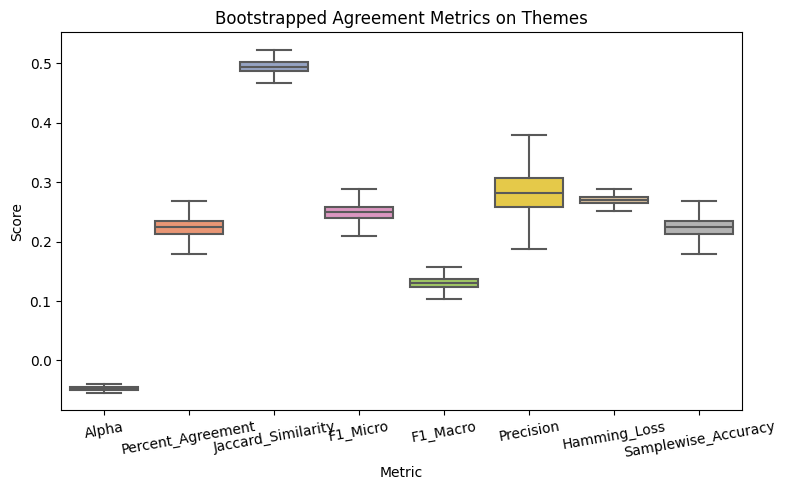

Mean Values:
      Alpha  Percent_Agreement  Jaccard_Similarity  F1_Micro  F1_Macro  \
0 -0.047113           0.224037             0.49443  0.249001  0.130114   

   Precision  Hamming_Loss  Samplewise_Accuracy   Sample  
0   0.284963      0.269626             0.224037  Dataset  


In [108]:
import numpy as np
import pandas as pd
import krippendorff
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score, f1_score, precision_score, accuracy_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical mapping for themes
theme_mapping = {
    'others': 0,
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6
}

# Reverse mapping for themes
reverse_theme_mapping = {v: k for k, v in theme_mapping.items()}

# Assuming df is already defined with relevant data
# Clean the 'Theme' columns: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()
df['Predicted_Categories3'] = df['Predicted_Categories3'].str.replace('"', '').str.lower()

# Map 'Theme' and 'Predicted_Categories3' to numerical values
df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])
df['Predicted_Mapped'] = df['Predicted_Categories3'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

# Fit the MultiLabelBinarizer once and transform the columns
df['Theme_Binarized'] = list(mlb.fit_transform(df['Theme_Mapped']))
df['Predicted_Binarized'] = list(mlb.transform(df['Predicted_Mapped']))

# Function to compute agreement metrics between ground truth and predictions
def compute_agreement_metrics(df):
    metrics = {
        'Alpha': [],
        'Percent_Agreement': [],
        'Jaccard_Similarity': [],
        'F1_Micro': [],
        'F1_Macro': [],
        'Precision': [],
        'Hamming_Loss': [],
        'Samplewise_Accuracy': []
    }

    themes1 = np.vstack(df['Theme_Binarized'].tolist())
    themes2 = np.vstack(df['Predicted_Binarized'].tolist())

    if themes1.size == 0 or themes2.size == 0:
        return metrics

    # Flatten the data for Krippendorff's alpha
    reliability_data = np.concatenate([themes1, themes2], axis=1).T

    # Calculate Krippendorff's Alpha
    alpha = krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')
    metrics['Alpha'].append(alpha)

    # Calculate Percent Agreement
    percent_agreement = np.mean(np.all(themes1 == themes2, axis=1))
    metrics['Percent_Agreement'].append(percent_agreement)

    # Calculate Jaccard Similarity Score
    jaccard_scores = [jaccard_score(themes1[k], themes2[k], average='macro') for k in range(themes1.shape[0])]
    avg_jaccard = np.nanmean(jaccard_scores)
    metrics['Jaccard_Similarity'].append(avg_jaccard)

    # Calculate F1 Score (Micro)
    f1_micro = f1_score(themes1, themes2, average='micro', zero_division=0)
    metrics['F1_Micro'].append(f1_micro)

    # Calculate F1 Score (Macro)
    f1_macro = f1_score(themes1, themes2, average='macro', zero_division=0)
    metrics['F1_Macro'].append(f1_macro)

    # Calculate Precision
    precision = precision_score(themes1, themes2, average='macro', zero_division=0)
    metrics['Precision'].append(precision)

    # Calculate Hamming Loss
    hamming = hamming_loss(themes1, themes2)
    metrics['Hamming_Loss'].append(hamming)

    # Calculate Samplewise Accuracy
    samplewise_accuracy = accuracy_score(themes1, themes2)
    metrics['Samplewise_Accuracy'].append(samplewise_accuracy)

    return metrics

# Function for bootstrap sampling with replacement
def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {
        'Alpha': [],
        'Percent_Agreement': [],
        'Jaccard_Similarity': [],
        'F1_Micro': [],
        'F1_Macro': [],
        'Precision': [],
        'Hamming_Loss': [],
        'Samplewise_Accuracy': []
    }

    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        metrics = compute_agreement_metrics(bootstrap_sample)

        for metric in bootstrap_metrics:
            bootstrap_metrics[metric].append(np.nanmean(metrics[metric]))

    return pd.DataFrame(bootstrap_metrics)

# Perform bootstrap sampling
bootstrap_results = bootstrap_sampling_with_replacement(df)
mean_values = bootstrap_results.mean().to_frame().T
mean_values['Sample'] = 'Dataset'

# Combine results for plotting
bootstrap_results_melted = bootstrap_results.melt(var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Metric', y='Value', data=bootstrap_results_melted, palette='Set2', showfliers=False)
plt.title('Bootstrapped Agreement Metrics on Themes')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# Print mean values for the DataFrame
print("Mean Values:")
print(mean_values)


In [109]:
mean_values

Alpha  Percent_Agreement  Jaccard_Similarity  F1_Micro  F1_Macro  \
0 -0.047113           0.224037             0.49443  0.249001  0.130114   

   Precision  Hamming_Loss  Samplewise_Accuracy   Sample  
0   0.284963      0.269626             0.224037  Dataset

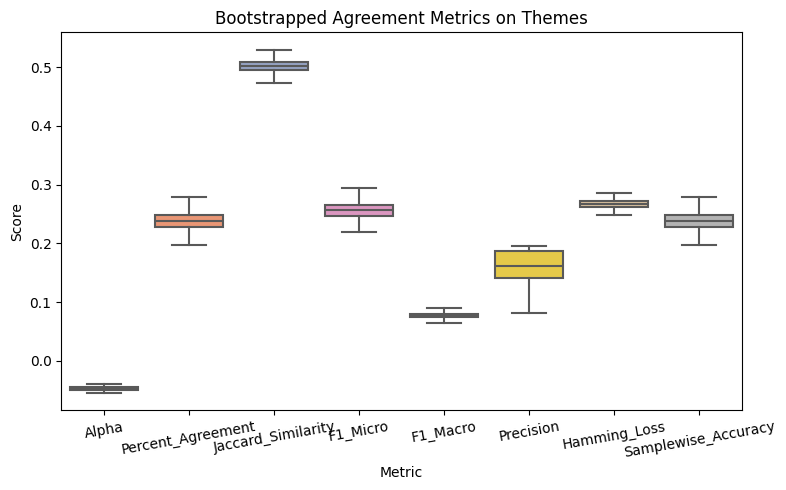

Mean Values:
      Alpha  Percent_Agreement  Jaccard_Similarity  F1_Micro  F1_Macro  \
0 -0.047113           0.237479            0.501757  0.256281  0.077329   

   Precision  Hamming_Loss  Samplewise_Accuracy   Sample  
0   0.158316      0.267015             0.237479  Dataset  


In [110]:
import numpy as np
import pandas as pd
import krippendorff
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score, f1_score, precision_score, accuracy_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical mapping for themes
theme_mapping = {
    'others': 0,
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6
}

# Reverse mapping for themes
reverse_theme_mapping = {v: k for k, v in theme_mapping.items()}

# Assuming df is already defined with relevant data
# Clean the 'Theme' columns: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()
df['Bertscore_Labels'] = df['Bertscore_Labels'].str.replace('"', '').str.lower()

# Map 'Theme' and 'Predicted_Categories3' to numerical values
df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])
df['Predicted_Mapped'] = df['Bertscore_Labels'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

# Fit the MultiLabelBinarizer once and transform the columns
df['Theme_Binarized'] = list(mlb.fit_transform(df['Theme_Mapped']))
df['Predicted_Binarized'] = list(mlb.transform(df['Predicted_Mapped']))

# Function to compute agreement metrics between ground truth and predictions
def compute_agreement_metrics(df):
    metrics = {
        'Alpha': [],
        'Percent_Agreement': [],
        'Jaccard_Similarity': [],
        'F1_Micro': [],
        'F1_Macro': [],
        'Precision': [],
        'Hamming_Loss': [],
        'Samplewise_Accuracy': []
    }

    themes1 = np.vstack(df['Theme_Binarized'].tolist())
    themes2 = np.vstack(df['Predicted_Binarized'].tolist())

    if themes1.size == 0 or themes2.size == 0:
        return metrics

    # Flatten the data for Krippendorff's alpha
    reliability_data = np.concatenate([themes1, themes2], axis=1).T

    # Calculate Krippendorff's Alpha
    alpha = krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')
    metrics['Alpha'].append(alpha)

    # Calculate Percent Agreement
    percent_agreement = np.mean(np.all(themes1 == themes2, axis=1))
    metrics['Percent_Agreement'].append(percent_agreement)

    # Calculate Jaccard Similarity Score
    jaccard_scores = [jaccard_score(themes1[k], themes2[k], average='macro') for k in range(themes1.shape[0])]
    avg_jaccard = np.nanmean(jaccard_scores)
    metrics['Jaccard_Similarity'].append(avg_jaccard)

    # Calculate F1 Score (Micro)
    f1_micro = f1_score(themes1, themes2, average='micro', zero_division=0)
    metrics['F1_Micro'].append(f1_micro)

    # Calculate F1 Score (Macro)
    f1_macro = f1_score(themes1, themes2, average='macro', zero_division=0)
    metrics['F1_Macro'].append(f1_macro)

    # Calculate Precision
    precision = precision_score(themes1, themes2, average='macro', zero_division=0)
    metrics['Precision'].append(precision)

    # Calculate Hamming Loss
    hamming = hamming_loss(themes1, themes2)
    metrics['Hamming_Loss'].append(hamming)

    # Calculate Samplewise Accuracy
    samplewise_accuracy = accuracy_score(themes1, themes2)
    metrics['Samplewise_Accuracy'].append(samplewise_accuracy)

    return metrics

# Function for bootstrap sampling with replacement
def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {
        'Alpha': [],
        'Percent_Agreement': [],
        'Jaccard_Similarity': [],
        'F1_Micro': [],
        'F1_Macro': [],
        'Precision': [],
        'Hamming_Loss': [],
        'Samplewise_Accuracy': []
    }

    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        metrics = compute_agreement_metrics(bootstrap_sample)

        for metric in bootstrap_metrics:
            bootstrap_metrics[metric].append(np.nanmean(metrics[metric]))

    return pd.DataFrame(bootstrap_metrics)

# Perform bootstrap sampling
bootstrap_results = bootstrap_sampling_with_replacement(df)
mean_values = bootstrap_results.mean().to_frame().T
mean_values['Sample'] = 'Dataset'

# Combine results for plotting
bootstrap_results_melted = bootstrap_results.melt(var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Metric', y='Value', data=bootstrap_results_melted, palette='Set2', showfliers=False)
plt.title('Bootstrapped Agreement Metrics on Themes')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# Print mean values for the DataFrame
print("Mean Values:")
print(mean_values)


In [112]:
mean_values

Alpha  Percent_Agreement  Jaccard_Similarity  F1_Micro  F1_Macro  \
0 -0.047113           0.237479            0.501757  0.256281  0.077329   

   Precision  Hamming_Loss  Samplewise_Accuracy   Sample  
0   0.158316      0.267015             0.237479  Dataset

In [169]:
df=df_new.copy()

In [170]:
# df.columns

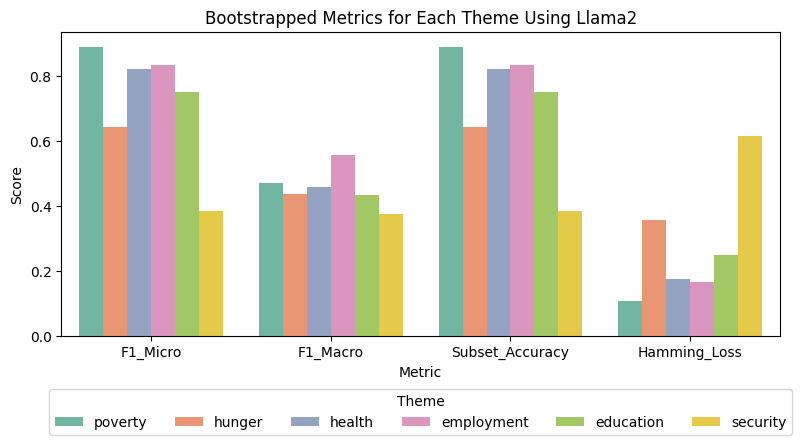

Mean Values for Each Theme:
   F1_Micro  F1_Macro  Subset_Accuracy  Hamming_Loss       Theme
0  0.890093  0.470905         0.890093      0.109907     poverty
1  0.642632  0.437868         0.642632      0.357368      hunger
2  0.822395  0.458917         0.822395      0.177605      health
3  0.832463  0.557855         0.832463      0.167537  employment
4  0.751565  0.434408         0.751565      0.248435   education
5  0.384202  0.374667         0.384202      0.615798    security


In [171]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, accuracy_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical mapping for themes
theme_mapping = {
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6,
    'others': 0  # Keep others for mapping purposes, but we will exclude it in calculations
}

# Reverse mapping for themes
reverse_theme_mapping = {v: k for k, v in theme_mapping.items()}

# Assuming df is already defined with relevant data
# Clean the 'Theme' columns: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()
df['Predicted_Categories3'] = df['Predicted_Categories3'].str.replace('"', '').str.lower()

# Map 'Theme' and 'Predicted_Categories3' to numerical values
df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])
df['Predicted_Mapped'] = df['Predicted_Categories3'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

# Fit the MultiLabelBinarizer once and transform the columns
theme_binarized = mlb.fit_transform(df['Theme_Mapped'])
predicted_binarized = mlb.transform(df['Predicted_Mapped'])

# Add the binarized columns back to the DataFrame
df['Theme_Binarized'] = list(theme_binarized)
df['Predicted_Binarized'] = list(predicted_binarized)

# Function to compute agreement metrics for a single theme
def compute_agreement_metrics_for_theme(themes1, themes2):
    metrics = {
        'F1_Micro': f1_score(themes1, themes2, average='micro', zero_division=0),
        'F1_Macro': f1_score(themes1, themes2, average='macro', zero_division=0),
        'Subset_Accuracy': np.mean(np.all(themes1 == themes2, axis=1)) if themes1.ndim == 2 else np.mean(themes1 == themes2),
        'Hamming_Loss': hamming_loss(themes1, themes2)
    }
    return metrics

# Function for bootstrap sampling with replacement for each theme
def bootstrap_sampling_for_theme(df, theme_index, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {
        'F1_Micro': [],
        'F1_Macro': [],
        'Subset_Accuracy': [],
        'Hamming_Loss': []
    }

    themes1_all = np.vstack(df['Theme_Binarized'].tolist())
    themes2_all = np.vstack(df['Predicted_Binarized'].tolist())

    theme1 = themes1_all[:, theme_index]
    theme2 = themes2_all[:, theme_index]

    for _ in range(n_iterations):
        bootstrap_indices = np.random.choice(range(len(df)), size=len(df), replace=True)
        themes1_sample = theme1[bootstrap_indices]
        themes2_sample = theme2[bootstrap_indices]

        metrics = compute_agreement_metrics_for_theme(themes1_sample, themes2_sample)

        for metric in bootstrap_metrics:
            bootstrap_metrics[metric].append(metrics[metric])

    return pd.DataFrame(bootstrap_metrics)

# Perform bootstrap sampling for each theme (excluding 'others')
all_metrics = []
for theme, index in theme_mapping.items():
    if theme != 'others':
        bootstrap_results = bootstrap_sampling_for_theme(df, index)
        mean_values = bootstrap_results.mean().to_frame().T
        mean_values['Theme'] = theme
        all_metrics.append(mean_values)

# Combine results for plotting
all_metrics_df = pd.concat(all_metrics, ignore_index=True)
all_metrics_melted = all_metrics_df.melt(id_vars='Theme', var_name='Metric', value_name='Value')

# Plot bar plot
plt.figure(figsize=(8, 4))  # Adjust figure size for clarity
sns.barplot(x='Metric', y='Value', hue='Theme', data=all_metrics_melted, palette='Set2')
plt.title('Bootstrapped Metrics for Each Theme Using Llama2')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
# plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title='Theme', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=6)

plt.show()

# Print mean values for each theme
print("Mean Values for Each Theme:")
print(all_metrics_df)


In [172]:
all_metrics_df

F1_Micro  F1_Macro  Subset_Accuracy  Hamming_Loss       Theme
0  0.890093  0.470905         0.890093      0.109907     poverty
1  0.642632  0.437868         0.642632      0.357368      hunger
2  0.822395  0.458917         0.822395      0.177605      health
3  0.832463  0.557855         0.832463      0.167537  employment
4  0.751565  0.434408         0.751565      0.248435   education
5  0.384202  0.374667         0.384202      0.615798    security

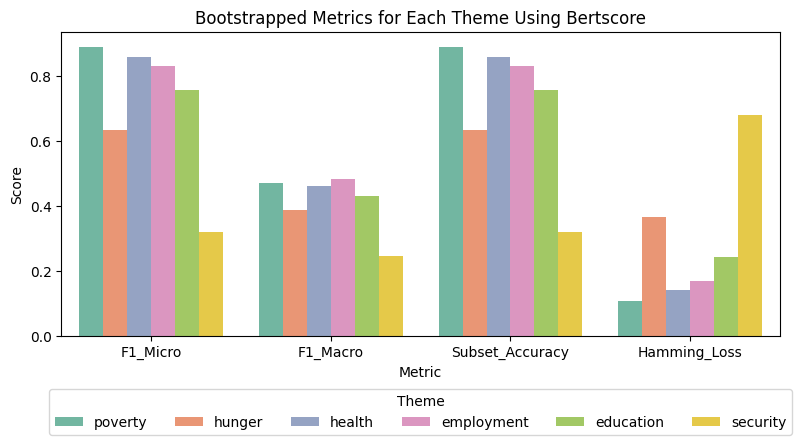

Mean Values for Each Theme:
   F1_Micro  F1_Macro  Subset_Accuracy  Hamming_Loss       Theme
0  0.890093  0.470905         0.890093      0.109907     poverty
1  0.632492  0.387366         0.632492      0.367508      hunger
2  0.856903  0.461441         0.856903      0.143097      health
3  0.829479  0.482704         0.829479      0.170521  employment
4  0.755686  0.430377         0.755686      0.244314   education
5  0.320578  0.246916         0.320578      0.679422    security


In [163]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, accuracy_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical mapping for themes
theme_mapping = {
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6,
    'others': 0  # Keep others for mapping purposes, but we will exclude it in calculations
}

# Reverse mapping for themes
reverse_theme_mapping = {v: k for k, v in theme_mapping.items()}

# Assuming df is already defined with relevant data
# Clean the 'Theme' columns: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()
df['Bertscore_Labels'] = df['Bertscore_Labels'].str.replace('"', '').str.lower()

# Map 'Theme' and 'Predicted_Categories3' to numerical values
df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])
df['Predicted_Mapped'] = df['Bertscore_Labels'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

# Fit the MultiLabelBinarizer once and transform the columns
theme_binarized = mlb.fit_transform(df['Theme_Mapped'])
predicted_binarized = mlb.transform(df['Predicted_Mapped'])

# Add the binarized columns back to the DataFrame
df['Theme_Binarized'] = list(theme_binarized)
df['Predicted_Binarized'] = list(predicted_binarized)

# Function to compute agreement metrics for a single theme
def compute_agreement_metrics_for_theme(themes1, themes2):
    metrics = {
        'F1_Micro': f1_score(themes1, themes2, average='micro', zero_division=0),
        'F1_Macro': f1_score(themes1, themes2, average='macro', zero_division=0),
        'Subset_Accuracy': np.mean(np.all(themes1 == themes2, axis=1)) if themes1.ndim == 2 else np.mean(themes1 == themes2),
        'Hamming_Loss': hamming_loss(themes1, themes2)
    }
    return metrics

# Function for bootstrap sampling with replacement for each theme
def bootstrap_sampling_for_theme(df, theme_index, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {
        'F1_Micro': [],
        'F1_Macro': [],
        'Subset_Accuracy': [],
        'Hamming_Loss': []
    }

    themes1_all = np.vstack(df['Theme_Binarized'].tolist())
    themes2_all = np.vstack(df['Predicted_Binarized'].tolist())

    theme1 = themes1_all[:, theme_index]
    theme2 = themes2_all[:, theme_index]

    for _ in range(n_iterations):
        bootstrap_indices = np.random.choice(range(len(df)), size=len(df), replace=True)
        themes1_sample = theme1[bootstrap_indices]
        themes2_sample = theme2[bootstrap_indices]

        metrics = compute_agreement_metrics_for_theme(themes1_sample, themes2_sample)

        for metric in bootstrap_metrics:
            bootstrap_metrics[metric].append(metrics[metric])

    return pd.DataFrame(bootstrap_metrics)

# Perform bootstrap sampling for each theme (excluding 'others')
all_metrics = []
for theme, index in theme_mapping.items():
    if theme != 'others':
        bootstrap_results = bootstrap_sampling_for_theme(df, index)
        mean_values = bootstrap_results.mean().to_frame().T
        mean_values['Theme'] = theme
        all_metrics.append(mean_values)

# Combine results for plotting
all_metrics_df = pd.concat(all_metrics, ignore_index=True)
all_metrics_melted = all_metrics_df.melt(id_vars='Theme', var_name='Metric', value_name='Value')

# Plot bar plot
plt.figure(figsize=(8, 4))  # Adjust figure size for clarity
sns.barplot(x='Metric', y='Value', hue='Theme', data=all_metrics_melted, palette='Set2')
plt.title('Bootstrapped Metrics for Each Theme Using Bertscore')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
# plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title='Theme', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=6)

plt.show()

# Print mean values for each theme
print("Mean Values for Each Theme:")
print(all_metrics_df)


In [161]:
all_metrics_df

F1_Micro  F1_Macro  Subset_Accuracy  Hamming_Loss       Theme
0  0.890093  0.470905         0.890093      0.109907     poverty
1  0.632492  0.387366         0.632492      0.367508      hunger
2  0.856903  0.461441         0.856903      0.143097      health
3  0.829479  0.482704         0.829479      0.170521  employment
4  0.755686  0.430377         0.755686      0.244314   education
5  0.320578  0.246916         0.320578      0.679422    security

In [152]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score, f1_score, precision_score, accuracy_score
import matplotlib.pyplot as plt

# Define the numerical mapping for themes
theme_mapping = {
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6,
    'others': 0  # Keep others for mapping purposes, but we will exclude it in calculations
}

# Reverse mapping for themes
reverse_theme_mapping = {v: k for k, v in theme_mapping.items()}

# Assuming df is already defined with relevant data
# Clean the 'Theme' columns: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()
df['Bertscore_Labels'] = df['Bertscore_Labels'].str.replace('"', '').str.lower()

# Map 'Theme' and 'Predicted_Categories3' to numerical values
df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])
df['Predicted_Mapped'] = df['Bertscore_Labels'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

# Fit the MultiLabelBinarizer once and transform the columns
theme_binarized = mlb.fit_transform(df['Theme_Mapped'])
predicted_binarized = mlb.transform(df['Predicted_Mapped'])

# Add the binarized columns back to the DataFrame
df['Theme_Binarized'] = list(theme_binarized)
df['Predicted_Binarized'] = list(predicted_binarized)

# Function to compute agreement metrics for a single theme
def compute_agreement_metrics_for_theme(themes1, themes2):
    metrics = {
        'Percent_Agreement': np.mean(themes1 == themes2),
        'Accuracy': accuracy_score(themes1, themes2),
        'F1_Micro': f1_score(themes1, themes2, average='micro', zero_division=0),
        'F1_Macro': f1_score(themes1, themes2, average='macro', zero_division=0),
        'Jaccard_Similarity': jaccard_score(themes1, themes2, average='binary', zero_division=0),
        'Precision': precision_score(themes1, themes2, average='binary', zero_division=0),
    }
    return metrics

# Function for bootstrap sampling with replacement for each theme
def bootstrap_sampling_for_theme(df, theme_index, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {
        'Percent_Agreement': [],
        'Accuracy': [],
        'F1_Micro': [],
        'F1_Macro': [],
        'Jaccard_Similarity': [],
        'Precision': [],
    }

    themes1_all = np.vstack(df['Theme_Binarized'].tolist())
    themes2_all = np.vstack(df['Predicted_Binarized'].tolist())

    theme1 = themes1_all[:, theme_index]
    theme2 = themes2_all[:, theme_index]

    for _ in range(n_iterations):
        bootstrap_indices = np.random.choice(range(len(df)), size=len(df), replace=True)
        themes1_sample = theme1[bootstrap_indices]
        themes2_sample = theme2[bootstrap_indices]

        metrics = compute_agreement_metrics_for_theme(themes1_sample, themes2_sample)

        for metric in bootstrap_metrics:
            bootstrap_metrics[metric].append(metrics[metric])

    return pd.DataFrame(bootstrap_metrics)

# Perform bootstrap sampling for each theme (excluding 'others')
all_metrics = []
for theme, index in theme_mapping.items():
    if theme != 'others':
        bootstrap_results = bootstrap_sampling_for_theme(df, index)
        mean_values = bootstrap_results.mean().to_frame().T
        mean_values['Theme'] = theme
        std_values = bootstrap_results.std().to_frame().T
        std_values['Theme'] = theme
        mean_values = mean_values.rename(columns=lambda x: f"Mean_{x}")
        std_values = std_values.rename(columns=lambda x: f"Std_{x}")
        combined = pd.concat([mean_values, std_values], axis=1)
        all_metrics.append(combined)

# Combine results into a single DataFrame
all_metrics_df = pd.concat(all_metrics, ignore_index=True)

# Check the resulting DataFrame
print(all_metrics_df.head())

# Plot bar plot with error bars
plt.figure(figsize=(14, 8))

metrics = ['Percent_Agreement', 'Accuracy', 'F1_Micro', 'F1_Macro', 'Jaccard_Similarity', 'Precision']

for metric in metrics:
    plt.errorbar(
        x=all_metrics_df['Theme'],
        y=all_metrics_df[f"Mean_{metric}"],
        yerr=all_metrics_df[f"Std_{metric}"],
        label=metric,
        fmt='o',
        capsize=5,
        elinewidth=2,
        capthick=2
    )

plt.title('Mean and Standard Deviation of Bootstrapped Metrics for Each Theme')
plt.xlabel('Theme')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   Mean_Percent_Agreement  Mean_Accuracy  Mean_F1_Micro  Mean_F1_Macro  \
0                0.890093       0.890093       0.890093       0.470905   
1                0.632492       0.632492       0.632492       0.387366   
2                0.856903       0.856903       0.856903       0.461441   
3                0.829479       0.829479       0.829479       0.482704   
4                0.755686       0.755686       0.755686       0.430377   

   Mean_Jaccard_Similarity  Mean_Precision  Mean_Theme  Std_Percent_Agreement  \
0                 0.000000        0.000000     poverty               0.011770   
1                 0.000000        0.000000      hunger               0.017925   
2                 0.000000        0.000000      health               0.013409   
3                 0.030742        0.789514  employment               0.014046   
4                 0.000000        0.000000   education               0.015647   

   Std_Accuracy  Std_F1_Micro  Std_F1_Macro  Std_Jaccard_Similarity 

KeyError: 'Theme'

<Figure size 1400x800 with 0 Axes>

In [144]:
all_metrics_df

Percent_Agreement  Accuracy  F1_Micro  F1_Macro  Jaccard_Similarity  \
0           0.890093  0.890093  0.890093  0.470905            0.000000   
1           0.632492  0.632492  0.632492  0.387366            0.000000   
2           0.856903  0.856903  0.856903  0.461441            0.000000   
3           0.829479  0.829479  0.829479  0.482704            0.030742   
4           0.755686  0.755686  0.755686  0.430377            0.000000   
5           0.320578  0.320578  0.320578  0.246916            0.317815   

   Precision       Theme  
0   0.000000     poverty  
1   0.000000      hunger  
2   0.000000      health  
3   0.789514  employment  
4   0.000000   education  
5   0.318697    security

In [125]:
metrics_df

Relaxed_Jaccard_Similarity  Relaxed_F1_Micro  Relaxed_F1_Macro  \
0                    0.274423          0.257033          0.077742   
1                    0.182506          0.297534          0.288061   

   Relaxed_Precision  Relaxed_Hamming_Loss  Relaxed_Accuracy    Type  
0           0.159912              0.266522          0.238227   Model  
1           0.213335              0.507321          0.008310  Random

In [114]:
mean_values

Alpha  Percent_Agreement  Jaccard_Similarity  F1_Micro  F1_Macro  \
0 -0.047113           0.237479            0.501757  0.256281  0.077329   

   Precision  Hamming_Loss  Samplewise_Accuracy   Sample  
0   0.158316      0.267015             0.237479  Dataset

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


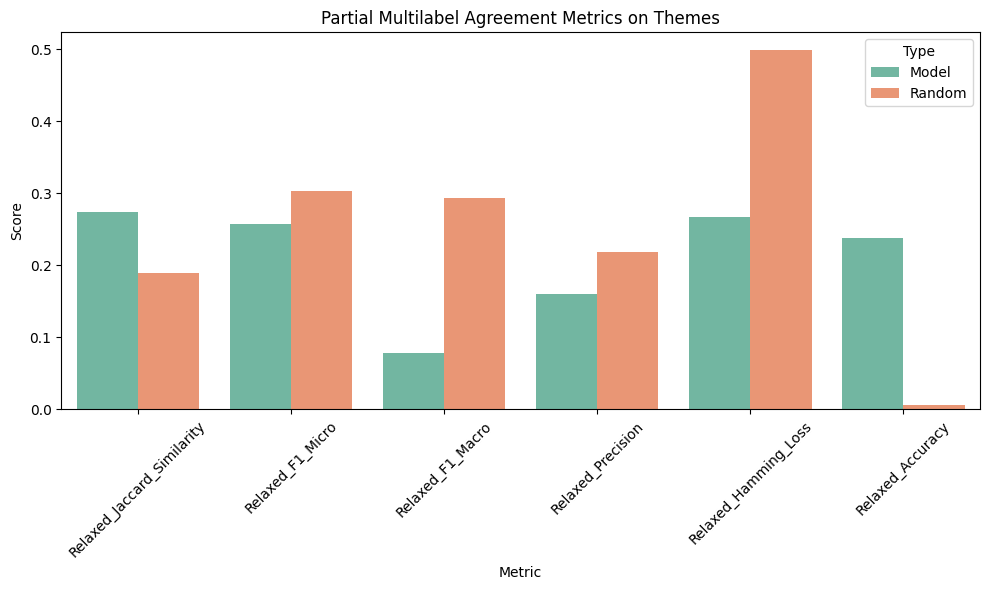

Partial Multilabel Metrics:
   Relaxed_Jaccard_Similarity  Relaxed_F1_Micro  Relaxed_F1_Macro  \
0                    0.274423          0.257033          0.077742   
1                    0.189388          0.303014          0.293032   

   Relaxed_Precision  Relaxed_Hamming_Loss  Relaxed_Accuracy    Type  
0           0.159912              0.266522          0.238227   Model  
1           0.217890              0.498813          0.005540  Random  


In [132]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, precision_score, hamming_loss, accuracy_score

# Define the numerical mapping for themes
theme_mapping = {
    'others': 0,
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6
}

# Clean the 'Theme' columns: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()
df['Bertscore_Labels'] = df['Bertscore_Labels'].str.replace('"', '').str.lower()

# Map 'Theme' and 'Predicted_Categories3' to numerical values
df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])
df['Predicted_Mapped'] = df['Bertscore_Labels'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

# Fit the MultiLabelBinarizer once and transform the columns
y_true = mlb.fit_transform(df['Theme_Mapped'])
y_pred = mlb.transform(df['Predicted_Mapped'])

# Partial multilabel metric calculation: give partial credit for overlap
def partial_multilabel_metric(y_true, y_pred):
    scores = []
    for true, pred in zip(y_true, y_pred):
        intersection = np.logical_and(true, pred).sum()
        union = np.logical_or(true, pred).sum()
        score = intersection / union if union != 0 else 0
        scores.append(score)
    return np.mean(scores)

# Function to compute partial multilabel metrics
def compute_partial_multilabel_metrics(y_true, y_pred):
    partial_jaccard = partial_multilabel_metric(y_true, y_pred)
    partial_f1_micro = f1_score(y_true, y_pred, average='micro')
    partial_f1_macro = f1_score(y_true, y_pred, average='macro')
    partial_precision = precision_score(y_true, y_pred, average='macro')
    partial_hamming_loss = hamming_loss(y_true, y_pred)
    partial_accuracy = accuracy_score(y_true, y_pred)

    metrics = {
        'Relaxed_Jaccard_Similarity': partial_jaccard,
        'Relaxed_F1_Micro': partial_f1_micro,
        'Relaxed_F1_Macro': partial_f1_macro,
        'Relaxed_Precision': partial_precision,
        'Relaxed_Hamming_Loss': partial_hamming_loss,
        'Relaxed_Accuracy': partial_accuracy
    }
    return metrics

# Compute partial multilabel metrics for the model
partial_multilabel_metrics = compute_partial_multilabel_metrics(y_true, y_pred)

# Compute random baseline partial multilabel metrics
def compute_random_partial_multilabel_metrics(y_true):
    random_predictions = np.random.randint(2, size=y_true.shape)
    random_metrics = compute_partial_multilabel_metrics(y_true, random_predictions)
    return random_metrics

random_partial_multilabel_metrics = compute_random_partial_multilabel_metrics(y_true)

# Combine results for plotting
metrics_df = pd.DataFrame([partial_multilabel_metrics, random_partial_multilabel_metrics])
metrics_df['Type'] = ['Model', 'Random']

# Plot the partial multilabel metrics
metrics_df_melted = metrics_df.melt(id_vars='Type', var_name='Metric', value_name='Value')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Type', data=metrics_df_melted, palette='Set2')
plt.title('Partial Multilabel Agreement Metrics on Themes')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print metrics for the DataFrame
print("Partial Multilabel Metrics:")
print(metrics_df)


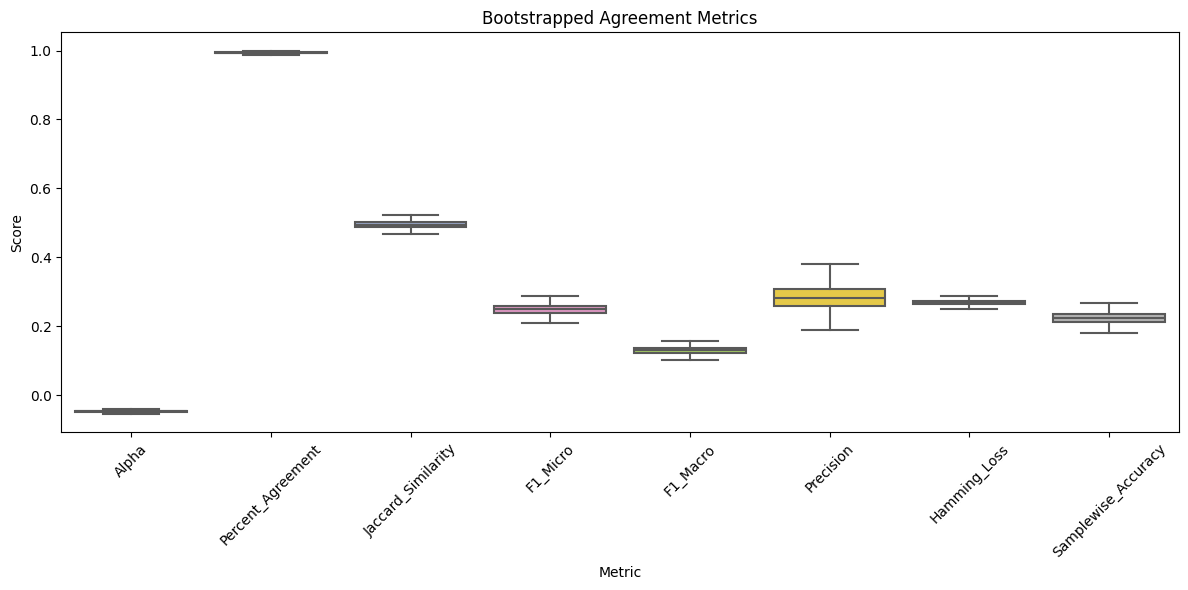

Mean Values:
      Alpha  Percent_Agreement  Jaccard_Similarity  F1_Micro  F1_Macro  \
0 -0.047113           0.993057             0.49443  0.249001  0.130114   

   Precision  Hamming_Loss  Samplewise_Accuracy   Sample  
0   0.284963      0.269626             0.224037  Dataset  


In [115]:
import numpy as np
import pandas as pd
import krippendorff
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score, f1_score, precision_score, accuracy_score, hamming_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical mapping for themes
theme_mapping = {
    'others': 0,
    'poverty': 1,
    'hunger': 2,
    'health': 3,
    'employment': 4,
    'education': 5,
    'security': 6
}

# Reverse mapping for themes
reverse_theme_mapping = {v: k for k, v in theme_mapping.items()}

# Assuming df is already defined with relevant data
# Clean the 'Theme' columns: remove quotes and convert to lowercase
df['Theme'] = df['Theme'].str.replace('"', '').str.lower()
df['Predicted_Categories3'] = df['Predicted_Categories3'].str.replace('"', '').str.lower()

# Map 'Theme' and 'Predicted_Categories3' to numerical values
df['Theme_Mapped'] = df['Theme'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])
df['Predicted_Mapped'] = df['Predicted_Categories3'].apply(lambda x: [theme_mapping.get(theme.strip(), 0) for theme in x.split(',')])

# Use MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=list(theme_mapping.values()))

# Fit the MultiLabelBinarizer once and transform the columns
df['Theme_Binarized'] = list(mlb.fit_transform(df['Theme_Mapped']))
df['Predicted_Binarized'] = list(mlb.transform(df['Predicted_Mapped']))

# Function to compute agreement metrics between ground truth and predictions
def compute_agreement_metrics(df):
    metrics = {
        'Alpha': [],
        'Percent_Agreement': [],
        'Jaccard_Similarity': [],
        'F1_Micro': [],
        'F1_Macro': [],
        'Precision': [],
        'Hamming_Loss': [],
        'Samplewise_Accuracy': []
    }

    themes1 = np.vstack(df['Theme_Binarized'].tolist())
    themes2 = np.vstack(df['Predicted_Binarized'].tolist())

    if themes1.size == 0 or themes2.size == 0:
        return metrics

    # Flatten the data for Krippendorff's alpha
    reliability_data = np.concatenate([themes1, themes2], axis=1).T

    # Calculate Krippendorff's Alpha
    alpha = krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')
    metrics['Alpha'].append(alpha)

    # Calculate Percent Agreement
    percent_agreement = np.mean(np.any(themes1 == themes2, axis=1))
    metrics['Percent_Agreement'].append(percent_agreement)

    # Calculate Jaccard Similarity Score
    jaccard_scores = [jaccard_score(themes1[k], themes2[k], average='macro') for k in range(themes1.shape[0])]
    avg_jaccard = np.nanmean(jaccard_scores)
    metrics['Jaccard_Similarity'].append(avg_jaccard)

    # Calculate F1 Score (Micro)
    f1_micro = f1_score(themes1, themes2, average='micro', zero_division=0)
    metrics['F1_Micro'].append(f1_micro)

    # Calculate F1 Score (Macro)
    f1_macro = f1_score(themes1, themes2, average='macro', zero_division=0)
    metrics['F1_Macro'].append(f1_macro)

    # Calculate Precision
    precision = precision_score(themes1, themes2, average='macro', zero_division=0)
    metrics['Precision'].append(precision)

    # Calculate Hamming Loss
    hamming = hamming_loss(themes1, themes2)
    metrics['Hamming_Loss'].append(hamming)

    # Calculate Samplewise Accuracy
    samplewise_accuracy = accuracy_score(themes1, themes2)
    metrics['Samplewise_Accuracy'].append(samplewise_accuracy)

    return metrics

# Function for bootstrap sampling with replacement
def bootstrap_sampling_with_replacement(df, n_iterations=1000, seed=42):
    np.random.seed(seed)
    bootstrap_metrics = {
        'Alpha': [],
        'Percent_Agreement': [],
        'Jaccard_Similarity': [],
        'F1_Micro': [],
        'F1_Macro': [],
        'Precision': [],
        'Hamming_Loss': [],
        'Samplewise_Accuracy': []
    }

    for _ in range(n_iterations):
        bootstrap_sample = df.sample(n=len(df), replace=True)
        metrics = compute_agreement_metrics(bootstrap_sample)

        for metric in bootstrap_metrics:
            bootstrap_metrics[metric].append(np.nanmean(metrics[metric]))

    return pd.DataFrame(bootstrap_metrics)

# Perform bootstrap sampling
bootstrap_results = bootstrap_sampling_with_replacement(df)
mean_values = bootstrap_results.mean().to_frame().T
mean_values['Sample'] = 'Dataset'

# Combine results for plotting
bootstrap_results_melted = bootstrap_results.melt(var_name='Metric', value_name='Value')

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Value', data=bootstrap_results_melted, palette='Set2', showfliers=False)
plt.title('Bootstrapped Agreement Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print mean values for the DataFrame
print("Mean Values:")
print(mean_values)


In [116]:
mean_values

Alpha  Percent_Agreement  Jaccard_Similarity  F1_Micro  F1_Macro  \
0 -0.047113           0.993057             0.49443  0.249001  0.130114   

   Precision  Hamming_Loss  Samplewise_Accuracy   Sample  
0   0.284963      0.269626             0.224037  Dataset

In [7]:
df=pd.read_csv('/home/hsibitenda/scratch/harriet/all_findings.csv')
# df6=pd.read_csv('/home/hsibitenda/scratch/harriet/sentiments/survey6_fini.csv')

df=df.astype(str)
df.shape

(22036, 71)

In [8]:
df.head(10)

Unnamed: 0.3 Unnamed: 0.2 Unnamed: 0 textid        Date Views sourcetype  \
0            0        13545       3090  24969  2023-08-18   624    youtube   
1            1        12258        548  23885  2023-08-18   494    youtube   
2            2         8929       6322  22900  2023-08-18   205    youtube   
3            3         4865       4719  23994  2023-08-12    52    youtube   
4            4        21598      19303  21921  2019-08-24   110    youtube   
5            5        21592      19290  20287  2019-08-24    77    youtube   
6            6         8231       7025  19237  2021-08-24   755    youtube   
7            7        10344      11604  21467  2021-08-24   346    youtube   
8            8        17775      11601  22451  2021-08-24   374    youtube   
9            9        17781      11610  21862  2021-08-24   354    youtube   

                                             alltext  \
0    aaj ke mukhya samachar 13 february 2023 | aa...   
1    aaj ke mukhya samachar 13 february 2023 | aa...   
2    aaj ke mukhya samachar 13 february 2023 | aa...   
3    aaj ke mukhya samachar 13 february 2023 | aa...   
4    aakhri station episode 1 - 13th february 201...   
5    aakhri station episode 1 - 13th february 201...   
6    aaliyah gaona - hope: a coronavirus awarenes...   
7    aam olas: ep # (291) | zar sanga ao zar gham...   
8    aam olas: ep # (291) | zar sanga ao zar gham...   
9    aam olas: ep # (291) | zar sanga ao zar gham...   

                                            Text_emt  \
0    aaj ke mukhya samachar 13 february 2023 | aa...   
1    aaj ke mukhya samachar 13 february 2023 | aa...   
2    aaj ke mukhya samachar 13 february 2023 | aa...   
3    aaj ke mukhya samachar 13 february 2023 | aa...   
4    aakhri station episode 1 - 13th february 201...   
5    aakhri station episode 1 - 13th february 201...   
6    aaliyah gaona - hope: a coronavirus awarenes...   
7    aam olas: ep # (291confusion | zar sanga ao ...   
8    aam olas: ep # (291confusion | zar sanga ao ...   
9    aam olas: ep # (291confusion | zar sanga ao ...   

                                            Text_emj  ... BERT_nlptown  \
0    aaj ke mukhya samachar 13 february 2023 | aa...  ...     negative   
1    aaj ke mukhya samachar 13 february 2023 | aa...  ...     negative   
2    aaj ke mukhya samachar 13 february 2023 | aa...  ...     negative   
3    aaj ke mukhya samachar 13 february 2023 | aa...  ...     negative   
4    aakhri station episode 1 - 13th february 201...  ...     negative   
5    aakhri station episode 1 - 13th february 201...  ...     negative   
6    aaliyah gaona - hope: a coronavirus awarenes...  ...     negative   
7    aam olas: ep # (291confusion | zar sanga ao ...  ...     negative   
8    aam olas: ep # (291confusion | zar sanga ao ...  ...     negative   
9    aam olas: ep # (291confusion | zar sanga ao ...  ...     negative   

             cleaned_theme                                       Text_lemma.1  \
0                  poverty  aaj ke mukhya samachar february aaj ka taaja k...   
1                  poverty  aaj ke mukhya samachar february aaj ka taaja k...   
2                  poverty  aaj ke mukhya samachar february aaj ka taaja k...   
3                  poverty  aaj ke mukhya samachar february aaj ka taaja k...   
4                  poverty  aakhri station episode th february ary digital...   
5                  poverty  aakhri station episode th february ary digital...   
6                  poverty  aaliyah gaona hope coronavirus awareness song ...   
7  yousaf - discrimination  aam ola ep confusion zar sanga ao zar ghamona ...   
8  yousaf - discrimination  aam ola ep confusion zar sanga ao zar ghamona ...   
9  yousaf - discrimination  aam ola ep confusion zar sanga ao zar ghamona ...   

                                            Entities  \
0  dict_items([('news reactionsk', {'url': 'https...   
1  dict_items([('news reactionsk', {'url': 'https...   
2  dict_items([('news reactionsk',

Theme Summary by Source Type:
cleaned_theme  approves - politics  bend - cultural identity  betterment  \
sourcetype                                                                 
facebook                        39                         0           0   
twitter                          4                         0          21   
youtube                          1                        36          10   

cleaned_theme  bidens - political polarization  buildingcapacity  climate  \
sourcetype                                                                  
facebook                                     0                 0        0   
twitter                                      0                40        0   
youtube                                     44                 0       20   

cleaned_theme  conservation  contemplating - energy poverty  \
sourcetype                                                    
facebook                 28                               3   
twitter       

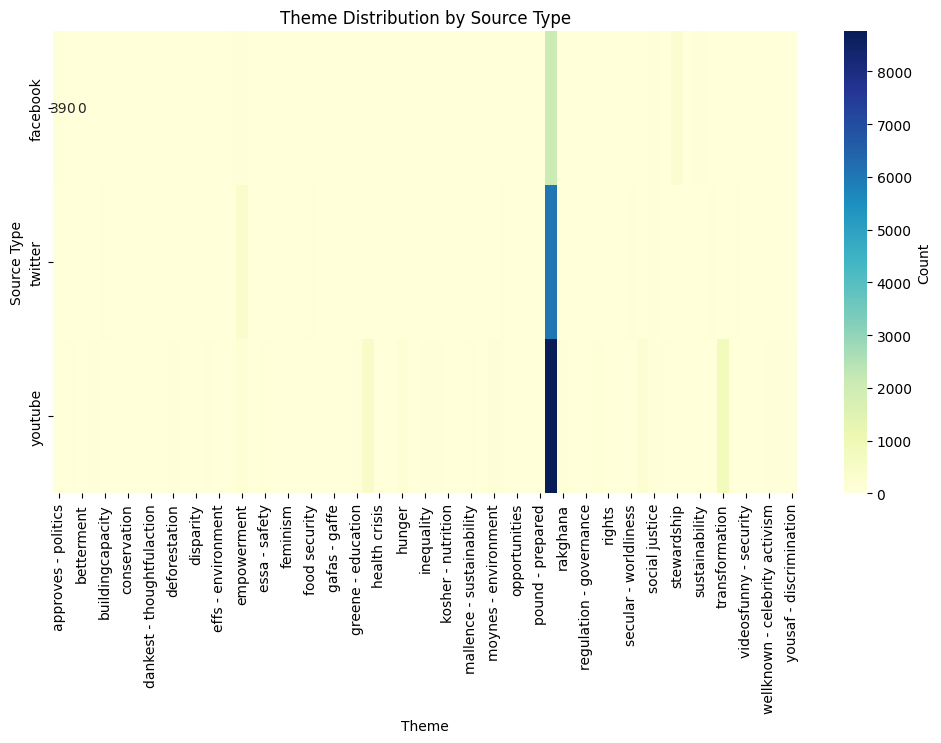

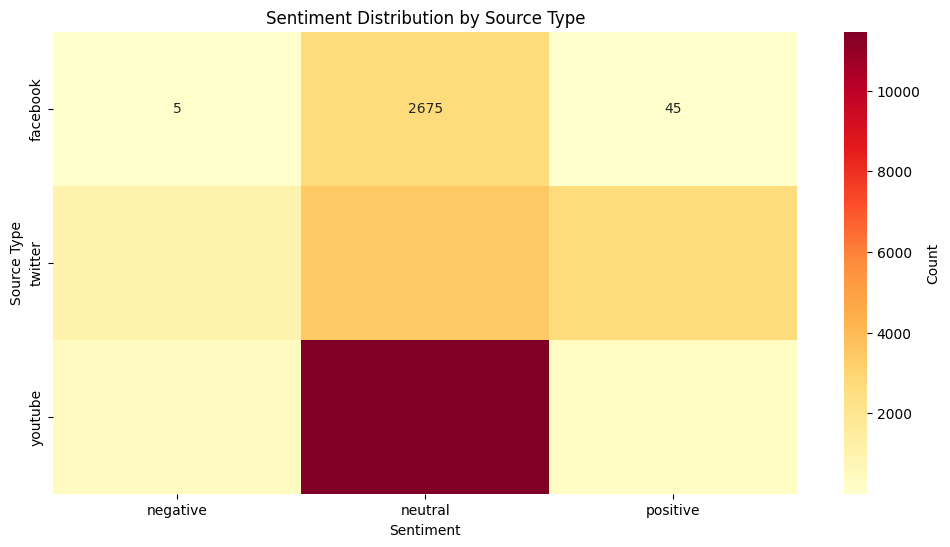


Unique Themes by Source Type:
sourcetype
facebook    17
twitter     44
youtube     59
Name: cleaned_theme, dtype: int64

Unique Sentiments by Source Type:
sourcetype
facebook    3
twitter     3
youtube     3
Name: llama3_sentiment, dtype: int64

Sentiment Distribution by Theme for YouTube:
llama3_sentiment                         negative  neutral  positive
cleaned_theme                                                       
approves - politics                             0        1         0
bend - cultural identity                        9       27         0
betterment                                      0       10         0
bidens - political polarization                 0       41         3
climate                                         0       20         0
conservation                                    0       10         3
contemplating - energy poverty                  0        4         0
deforestation                                   0       42         0
detroit - revitali

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming it's saved as a CSV file)
# df = pd.read_csv("your_data_file.csv") # Uncomment this line if reading from a file

# Display the first few rows to understand the data structure
# print(df.head())

# Group data by 'source_type', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Pivot the table for easier analysis (themes as columns, source_type as rows, and counts as values)
theme_pivot = theme_sentiment_summary.pivot_table(index='sourcetype', columns='cleaned_theme', values='count', aggfunc='sum', fill_value=0)
sentiment_pivot = theme_sentiment_summary.pivot_table(index='sourcetype', columns='llama3_sentiment', values='count', aggfunc='sum', fill_value=0)

# Display summary tables
print("Theme Summary by Source Type:")
print(theme_pivot)
print("\nSentiment Summary by Source Type:")
print(sentiment_pivot)

# Visualize the data
plt.figure(figsize=(12, 6))
sns.heatmap(theme_pivot, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title("Theme Distribution by Source Type")
plt.xlabel("Theme")
plt.ylabel("Source Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_pivot, annot=True, fmt="d", cmap="YlOrRd", cbar_kws={'label': 'Count'})
plt.title("Sentiment Distribution by Source Type")
plt.xlabel("Sentiment")
plt.ylabel("Source Type")
plt.show()

# Additional summary statistics
# Count unique themes and sentiments per source type
unique_themes_per_source = df.groupby('sourcetype')['cleaned_theme'].nunique()
unique_sentiments_per_source = df.groupby('sourcetype')['llama3_sentiment'].nunique()

print("\nUnique Themes by Source Type:")
print(unique_themes_per_source)
print("\nUnique Sentiments by Source Type:")
print(unique_sentiments_per_source)

# Sentiment distribution across themes for a specific source type (if needed)
youtube_sentiment_theme = df[df['sourcetype'] == 'youtube'].groupby(['cleaned_theme', 'llama3_sentiment']).size().unstack(fill_value=0)

print("\nSentiment Distribution by Theme for YouTube:")
print(youtube_sentiment_theme)


Theme Summary by Source Type:
cleaned_theme  approves - politics  bend - cultural identity  betterment  \
sourcetype                                                                 
twitter                          4                         0          21   
youtube                         40                        36          10   

cleaned_theme  bidens - political polarization  buildingcapacity  climate  \
sourcetype                                                                  
twitter                                      0                40        0   
youtube                                     44                 0       20   

cleaned_theme  conservation  contemplating - energy poverty  \
sourcetype                                                    
twitter                  12                              32   
youtube                  41                               7   

cleaned_theme  dankest - thoughtfulaction  deadline - urgency  ...  survival  \
sourcetype             

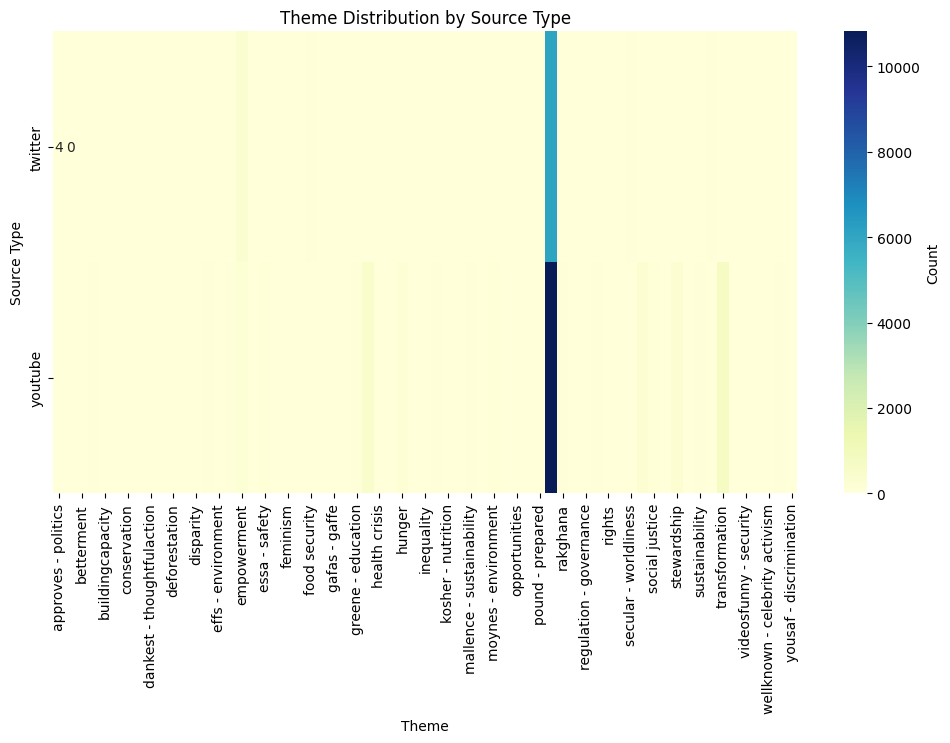

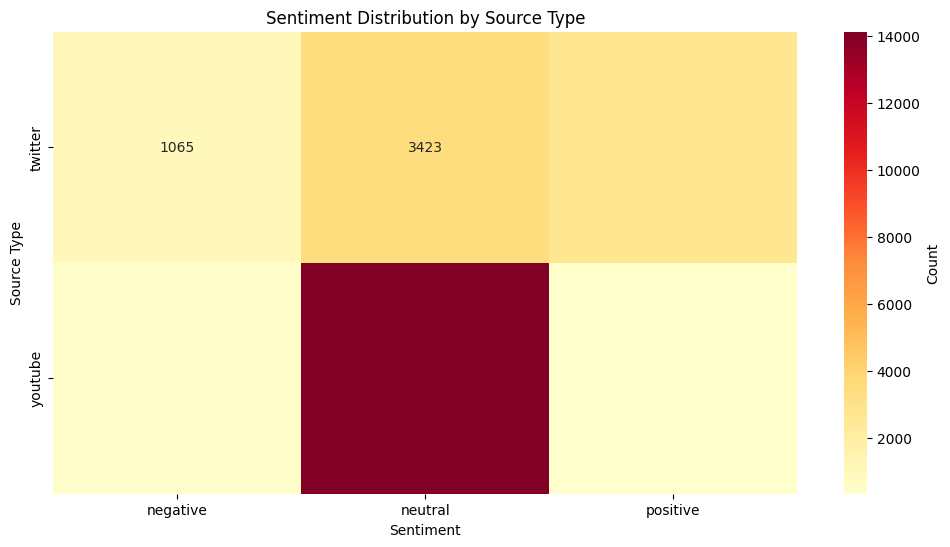


Unique Themes by Source Type:
sourcetype
twitter    44
youtube    61
Name: cleaned_theme, dtype: int64

Unique Sentiments by Source Type:
sourcetype
twitter    3
youtube    3
Name: llama3_sentiment, dtype: int64

Sentiment Distribution by Theme for YouTube:
llama3_sentiment                 negative  neutral  positive
cleaned_theme                                               
approves - politics                     0       40         0
bend - cultural identity                9       27         0
betterment                              0       10         0
bidens - political polarization         0       41         3
climate                                 0       20         0
...                                   ...      ...       ...
videosfunny - security                  2       14         0
waste management                        0        3         0
wellknown - celebrity activism          0       38         0
worse - discrimination                  0       56         0
yousaf - 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming it's saved as a CSV file)
# df = pd.read_csv("your_data_file.csv") # Uncomment this line if reading from a file

# Display the first few rows to understand the data structure
# print(df.head())
df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Group data by 'source_type', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Pivot the table for easier analysis (themes as columns, source_type as rows, and counts as values)
theme_pivot = theme_sentiment_summary.pivot_table(index='sourcetype', columns='cleaned_theme', values='count', aggfunc='sum', fill_value=0)
sentiment_pivot = theme_sentiment_summary.pivot_table(index='sourcetype', columns='llama3_sentiment', values='count', aggfunc='sum', fill_value=0)

# Display summary tables
print("Theme Summary by Source Type:")
print(theme_pivot)
print("\nSentiment Summary by Source Type:")
print(sentiment_pivot)

# Visualize the data
plt.figure(figsize=(12, 6))
sns.heatmap(theme_pivot, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title("Theme Distribution by Source Type")
plt.xlabel("Theme")
plt.ylabel("Source Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_pivot, annot=True, fmt="d", cmap="YlOrRd", cbar_kws={'label': 'Count'})
plt.title("Sentiment Distribution by Source Type")
plt.xlabel("Sentiment")
plt.ylabel("Source Type")
plt.show()

# Additional summary statistics
# Count unique themes and sentiments per source type
unique_themes_per_source = df.groupby('sourcetype')['cleaned_theme'].nunique()
unique_sentiments_per_source = df.groupby('sourcetype')['llama3_sentiment'].nunique()

print("\nUnique Themes by Source Type:")
print(unique_themes_per_source)
print("\nUnique Sentiments by Source Type:")
print(unique_sentiments_per_source)

# Sentiment distribution across themes for a specific source type (if needed)
youtube_sentiment_theme = df[df['sourcetype'] == 'youtube'].groupby(['cleaned_theme', 'llama3_sentiment']).size().unstack(fill_value=0)

print("\nSentiment Distribution by Theme for YouTube:")
print(youtube_sentiment_theme)


/tmp/ipykernel_408775/3036436200.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=theme_sentiment_summary, x='cleaned_theme', y='count', hue='llama3_sentiment', ci=None)


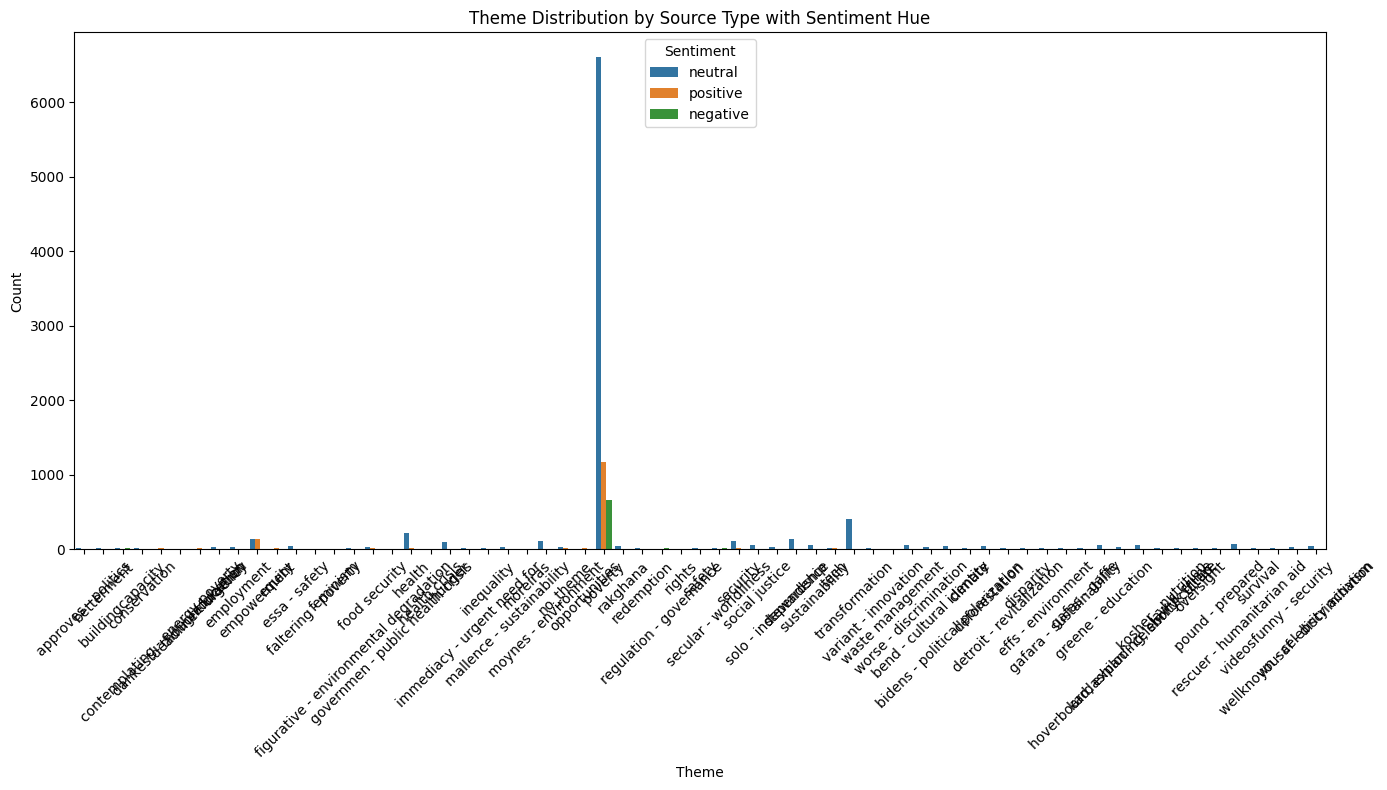

/tmp/ipykernel_408775/3036436200.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=theme_sentiment_summary, x='sourcetype', y='count', hue='cleaned_theme', ci=None)
/tmp/ipykernel_408775/3036436200.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


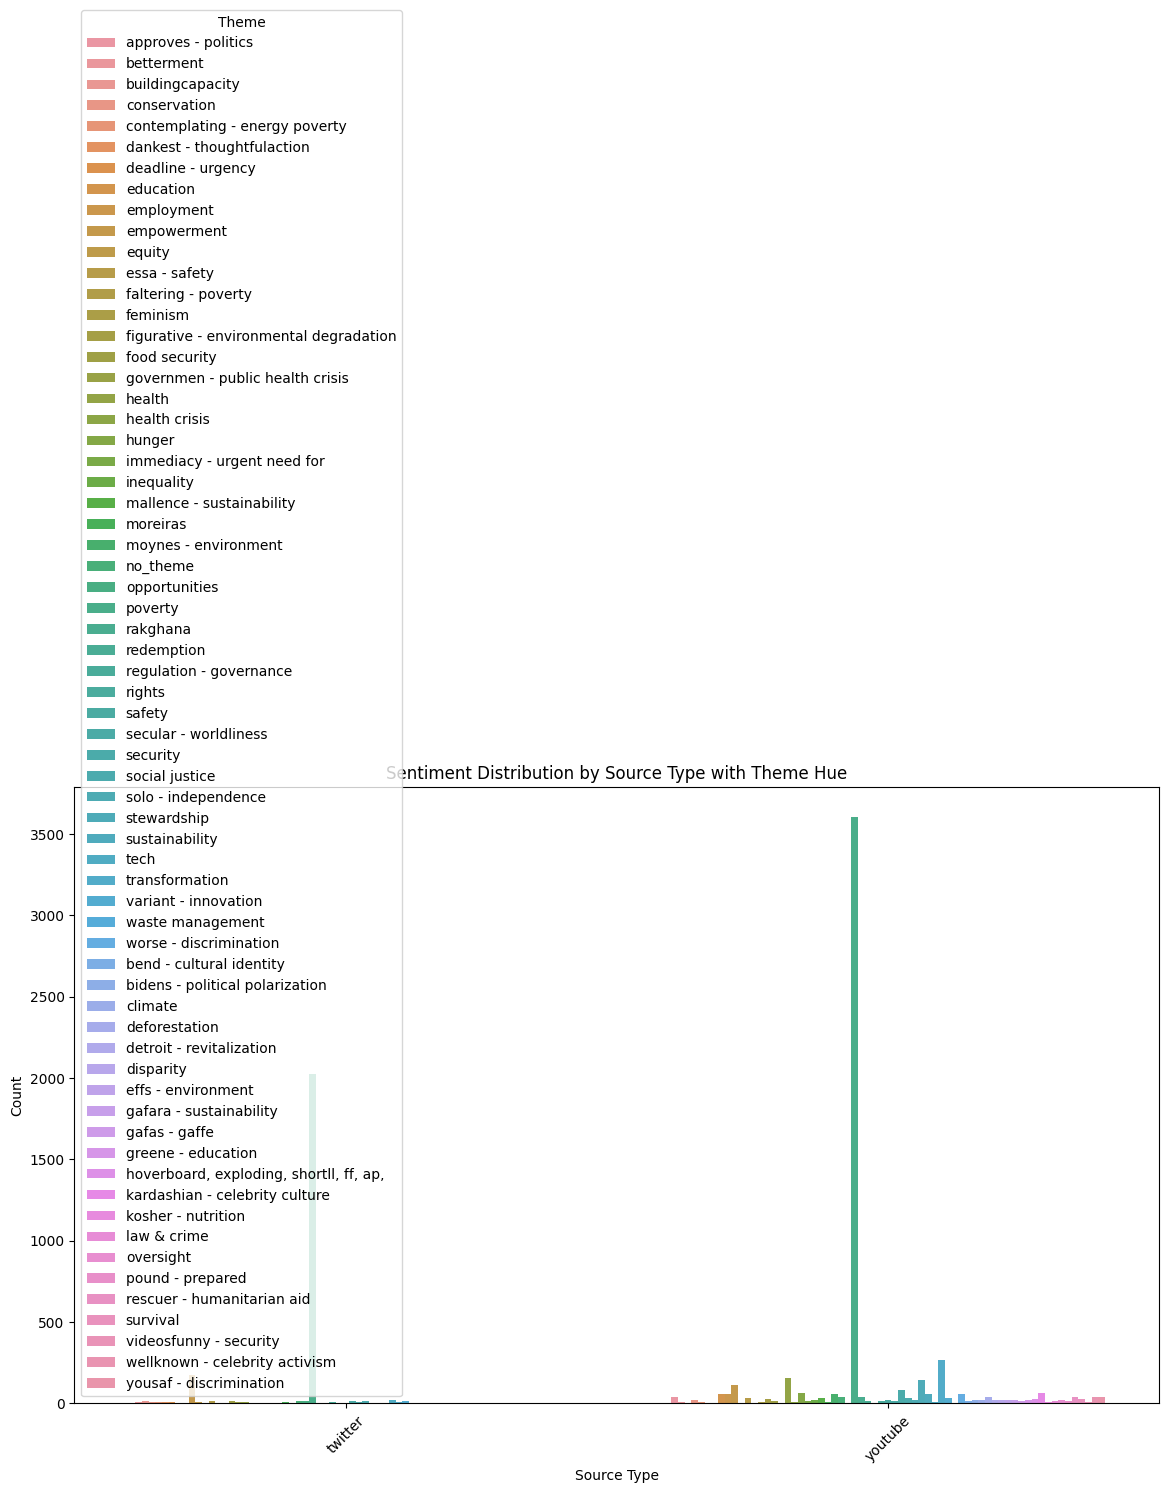

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Group the data by 'sourcetype', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Plotting theme distribution by source type with sentiment as hue
plt.figure(figsize=(14, 8))
sns.barplot(data=theme_sentiment_summary, x='cleaned_theme', y='count', hue='llama3_sentiment', ci=None)
plt.title("Theme Distribution by Source Type with Sentiment Hue")
plt.xlabel("Theme")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Plotting sentiment distribution by source type with theme as hue
plt.figure(figsize=(14, 8))
sns.barplot(data=theme_sentiment_summary, x='sourcetype', y='count', hue='cleaned_theme', ci=None)
plt.title("Sentiment Distribution by Source Type with Theme Hue")
plt.xlabel("Source Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Theme')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

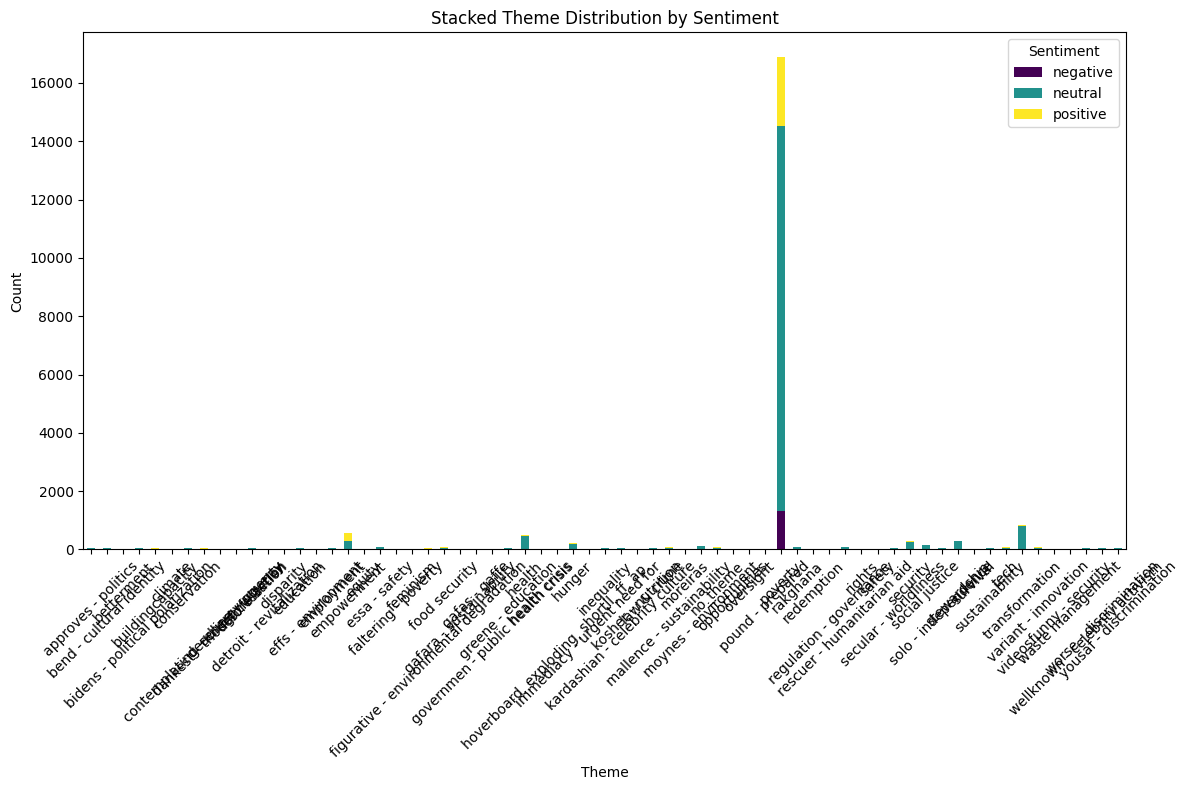

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: Fu

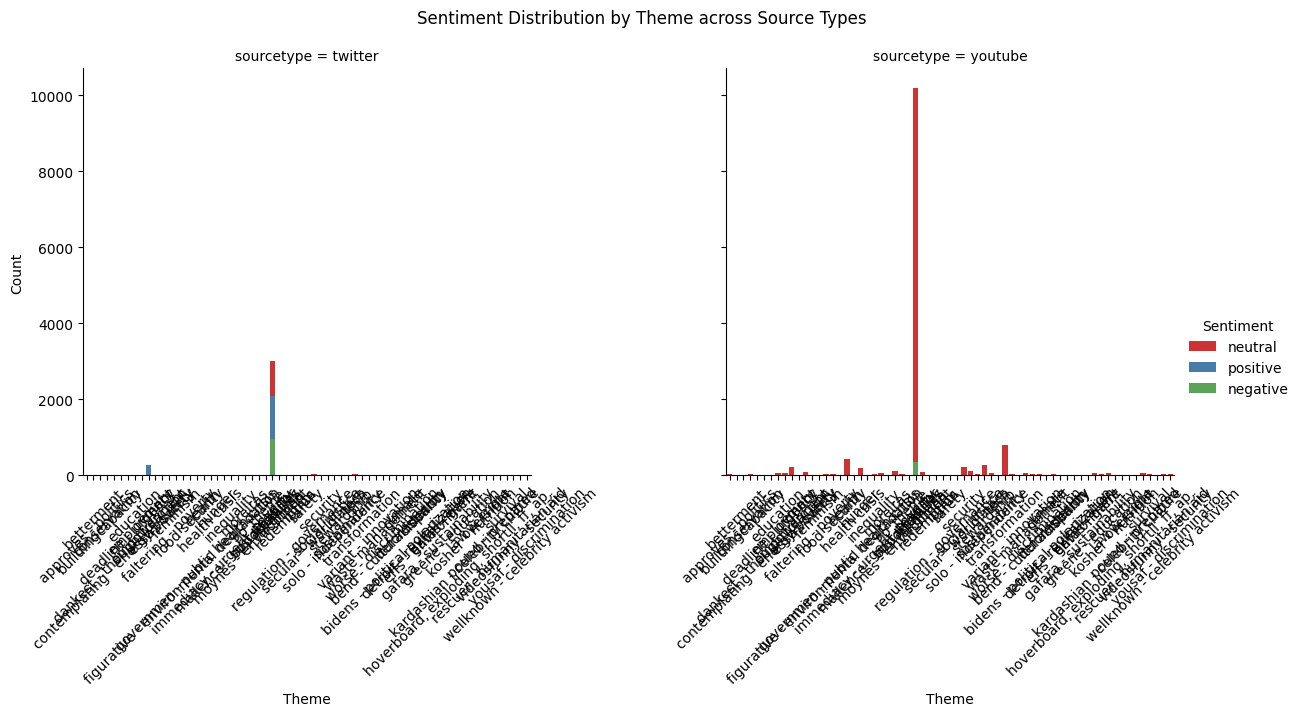

/tmp/ipykernel_408775/1084450386.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


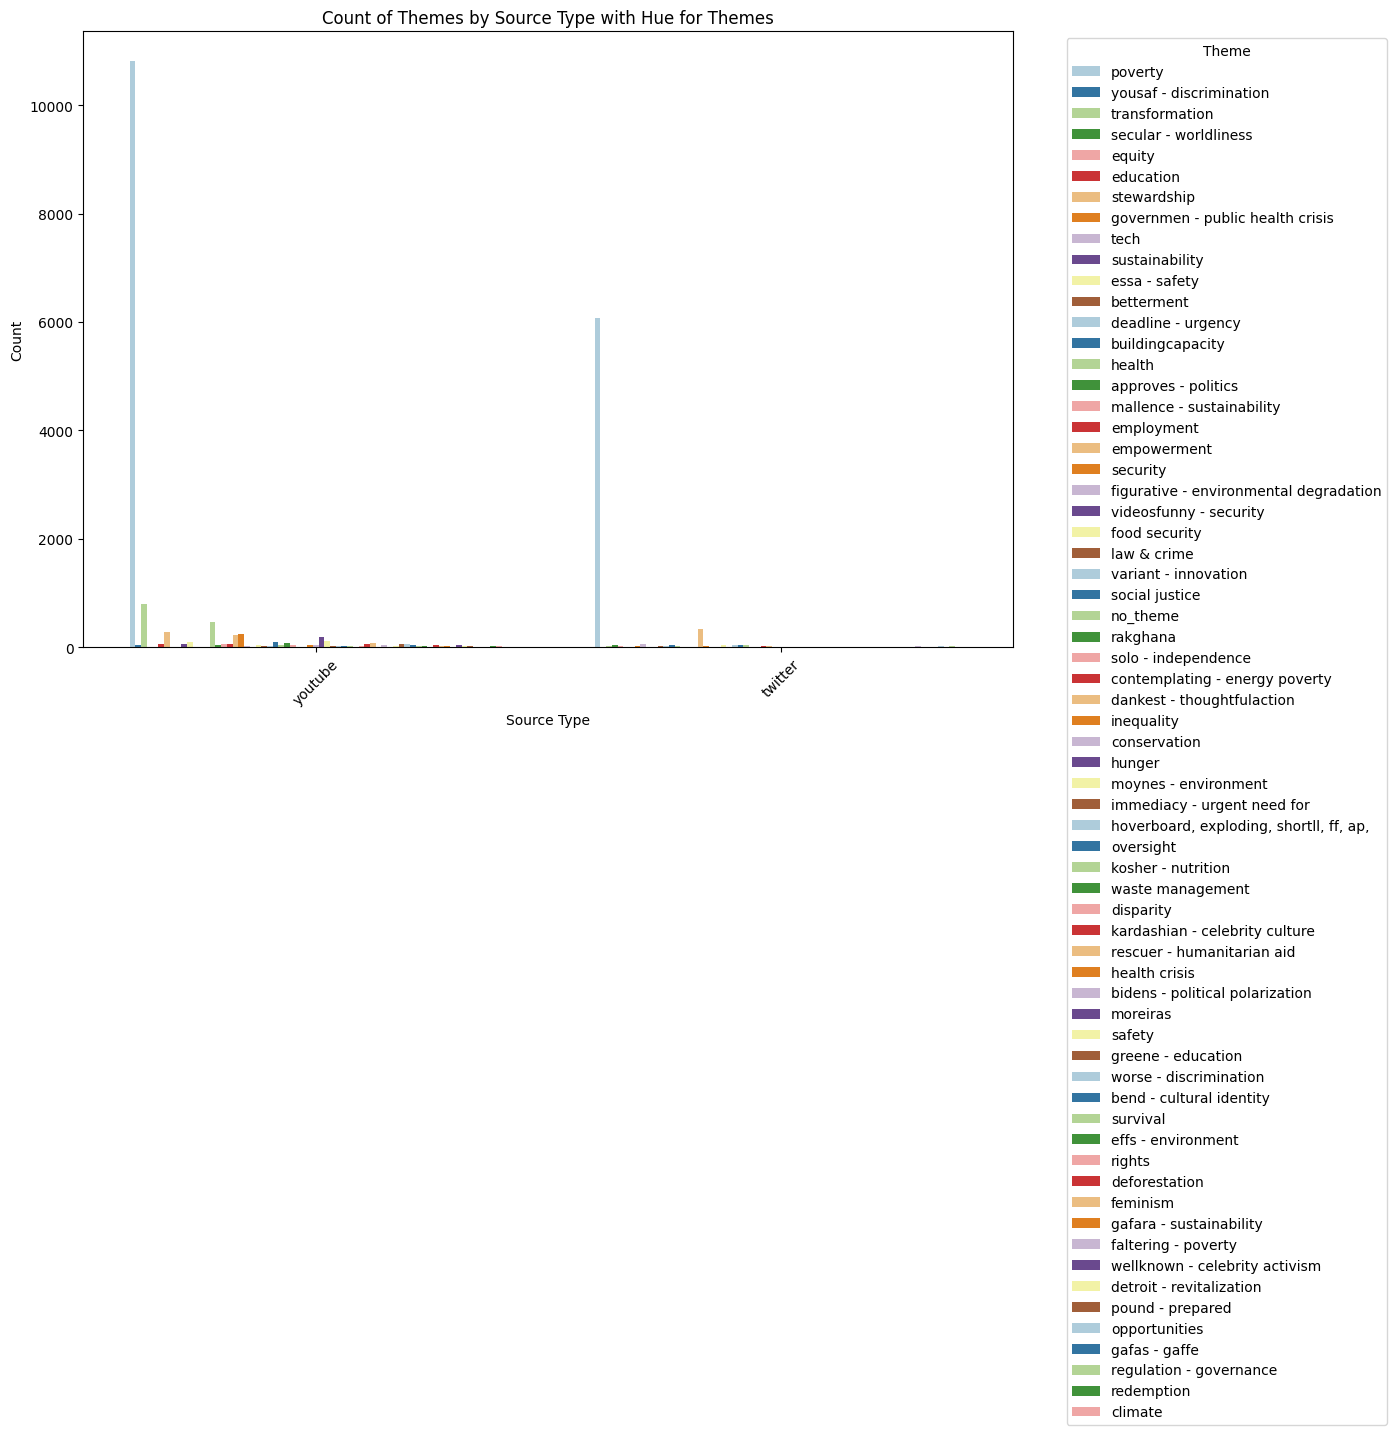

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
# df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Group data for easier plotting
theme_sentiment_summary = df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Stacked Bar Plot: Theme Distribution by Source Type with Sentiment as Stacks
plt.figure(figsize=(12, 8))
theme_pivot = theme_sentiment_summary.pivot_table(index='cleaned_theme', columns='llama3_sentiment', values='count', aggfunc='sum', fill_value=0)
theme_pivot.plot(kind='bar', stacked=True, colormap="viridis", figsize=(12, 8))
plt.title("Stacked Theme Distribution by Sentiment")
plt.xlabel("Theme")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Facet Grid: Sentiment Distribution by Theme and Source Type
g = sns.FacetGrid(theme_sentiment_summary, col='sourcetype', hue='llama3_sentiment', height=5, aspect=1.2, palette="Set1")
g.map(sns.barplot, 'cleaned_theme', 'count', order=theme_sentiment_summary['cleaned_theme'].unique(), ci=None)
g.add_legend(title="Sentiment")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Theme", "Count")
g.fig.suptitle("Sentiment Distribution by Theme across Source Types", y=1.05)
plt.show()

# Count Plot with Hue: Sentiment distribution by Source Type with Theme as Hue
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='sourcetype', hue='cleaned_theme', palette="Paired")
plt.title("Count of Themes by Source Type with Hue for Themes")
plt.xlabel("Source Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

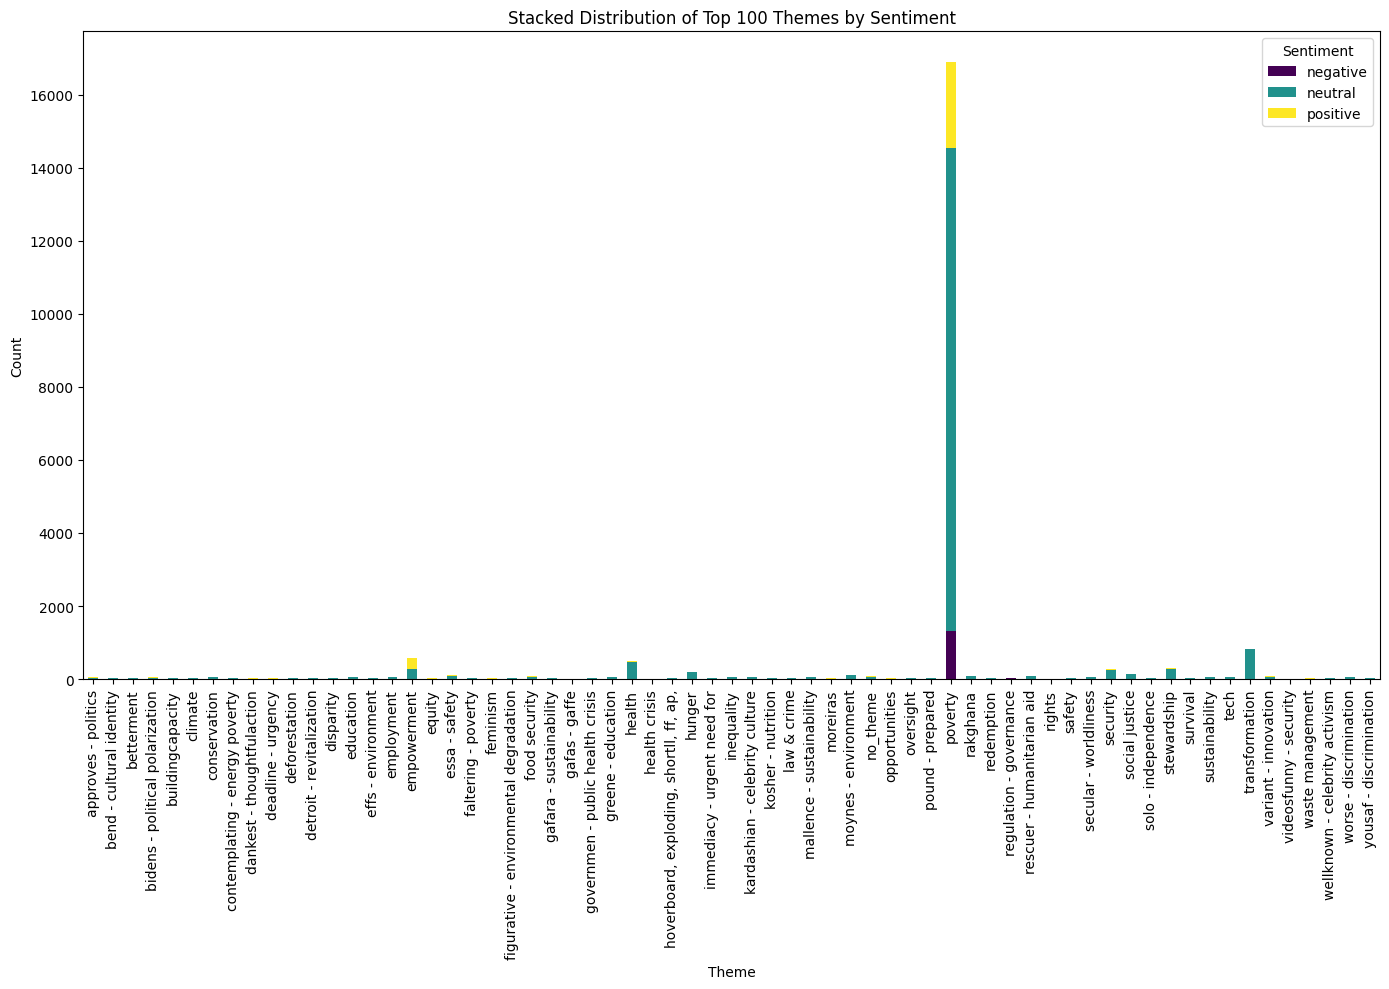

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: Fu

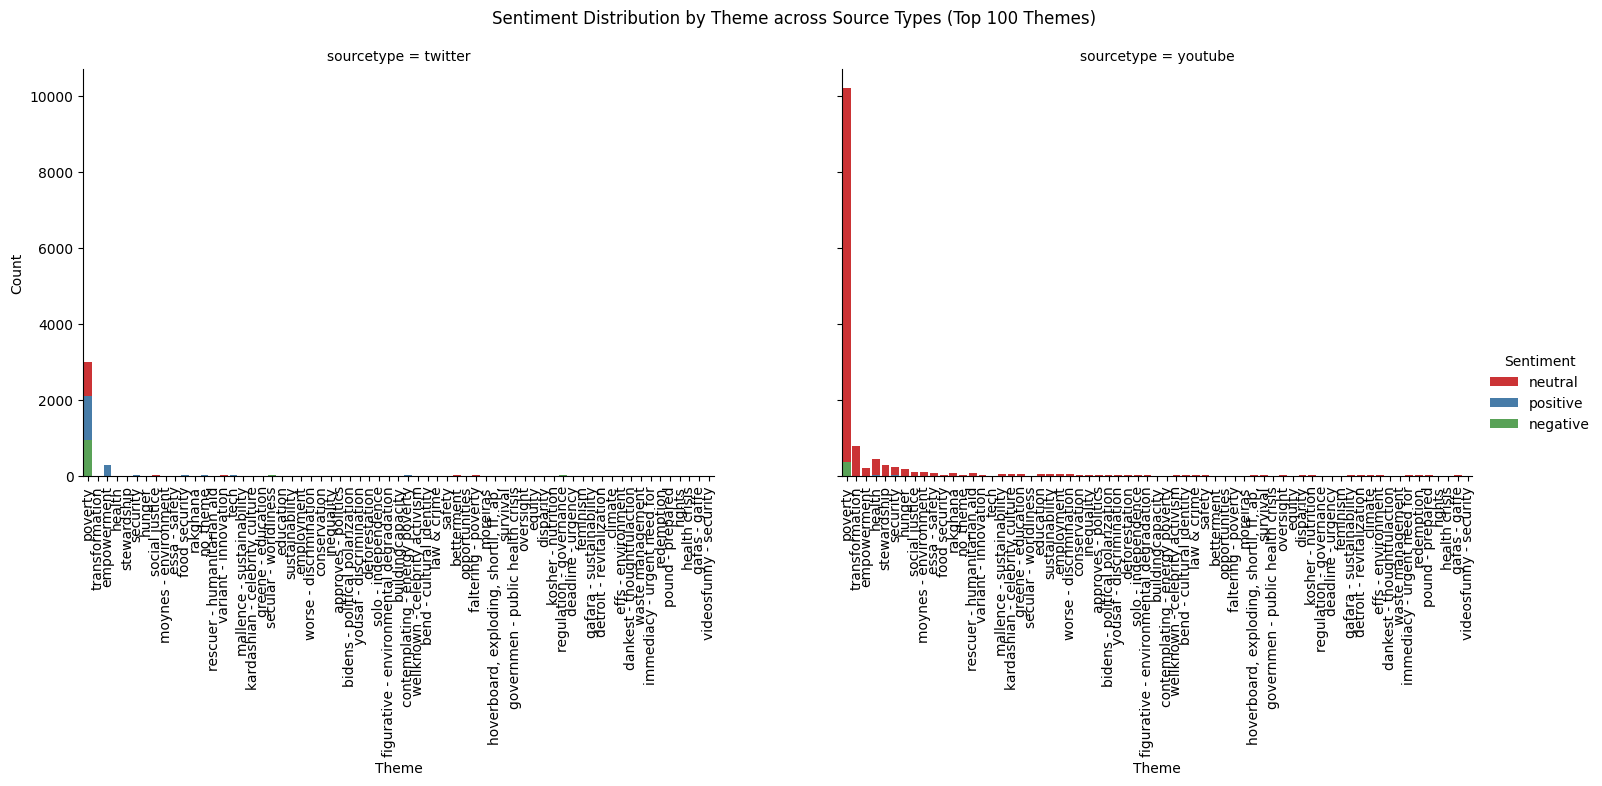

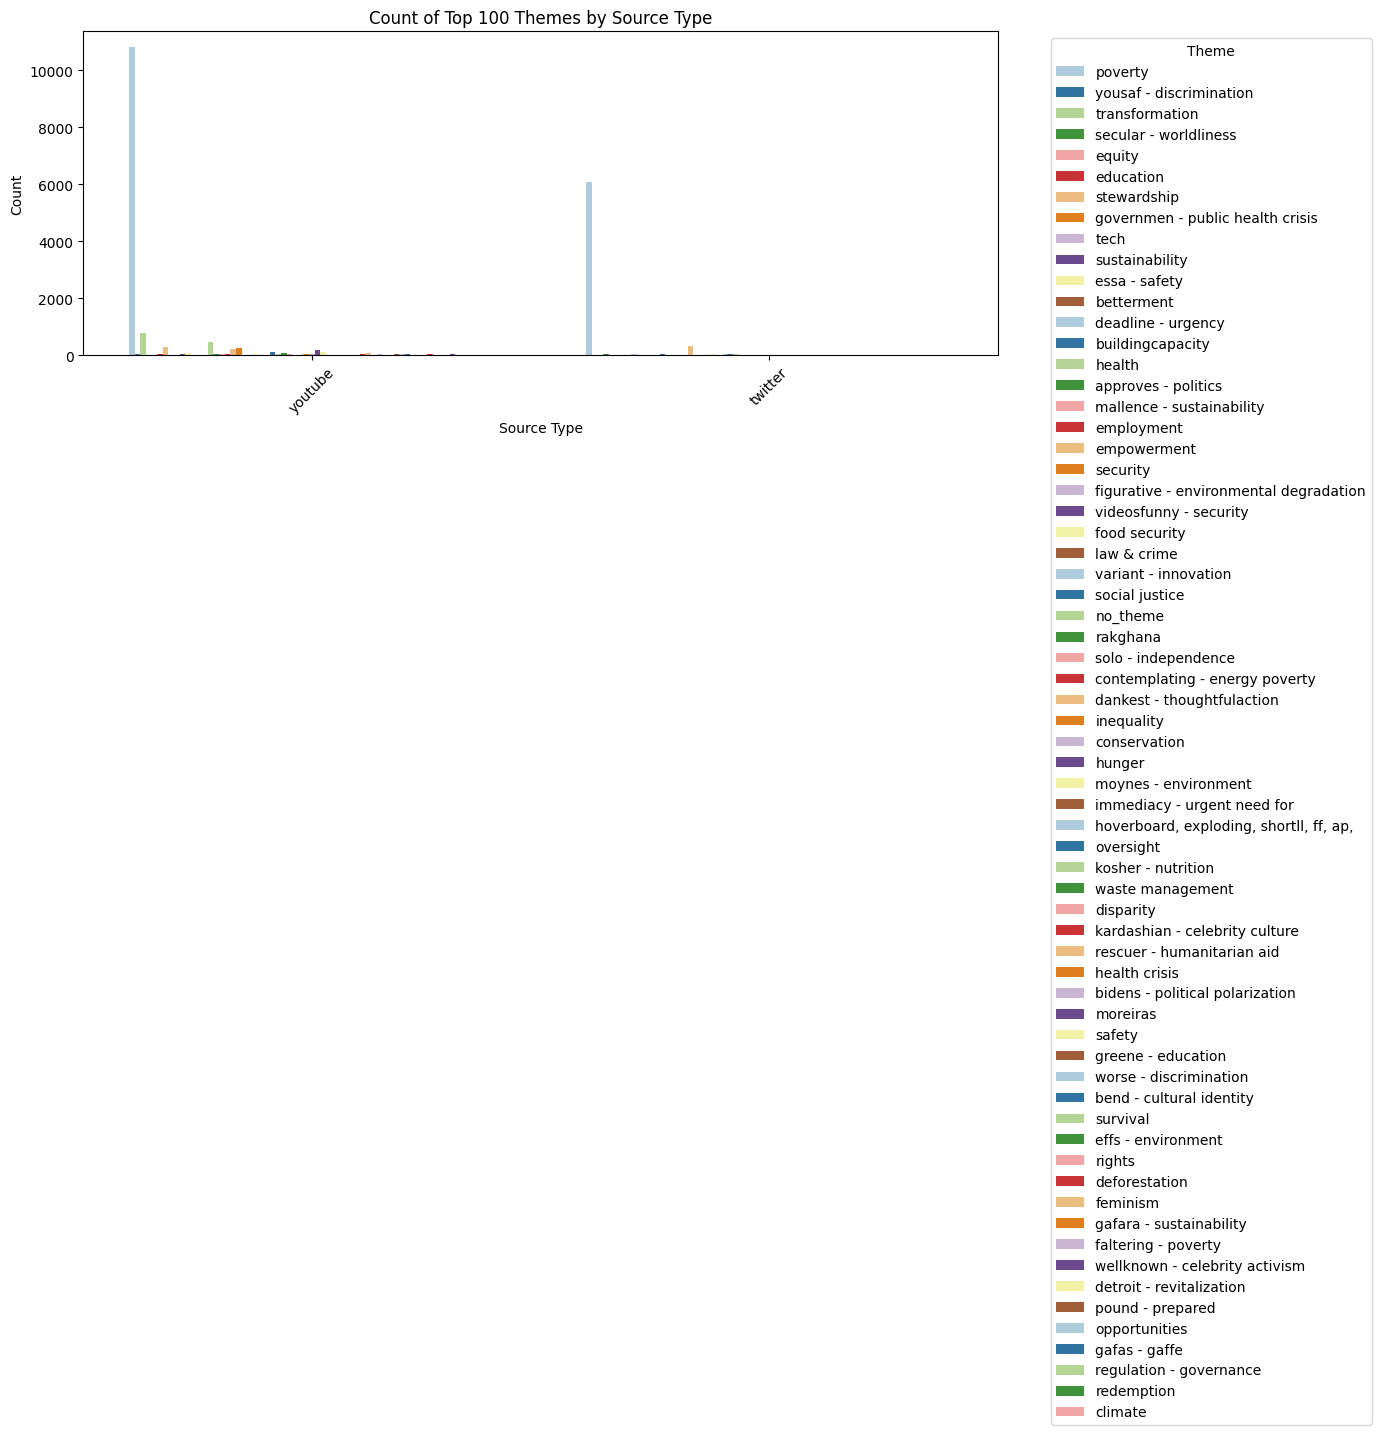

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
# df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Identify the top 100 most frequent topics in 'cleaned_theme'
top_topics = df['cleaned_theme'].value_counts().head(100).index

# Filter the dataset to include only records with the top 100 topics
filtered_df = df[df['cleaned_theme'].isin(top_topics)]

# Group data by 'sourcetype', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = filtered_df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Stacked Bar Plot: Top 100 Themes Distribution by Source Type with Sentiment as Stacks
plt.figure(figsize=(14, 10))
theme_pivot = theme_sentiment_summary.pivot_table(index='cleaned_theme', columns='llama3_sentiment', values='count', aggfunc='sum', fill_value=0)
theme_pivot.plot(kind='bar', stacked=True, colormap="viridis", figsize=(14, 10))
plt.title("Stacked Distribution of Top 100 Themes by Sentiment")
plt.xlabel("Theme")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Facet Grid: Sentiment Distribution by Theme and Source Type for Top 100 Themes
g = sns.FacetGrid(theme_sentiment_summary, col='sourcetype', hue='llama3_sentiment', height=5, aspect=1.5, palette="Set1")
g.map(sns.barplot, 'cleaned_theme', 'count', order=top_topics, ci=None)
g.add_legend(title="Sentiment")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Theme", "Count")
g.fig.suptitle("Sentiment Distribution by Theme across Source Types (Top 100 Themes)", y=1.05)
plt.show()

# Count Plot with Hue: Top 100 Themes by Source Type with Theme as Hue
plt.figure(figsize=(14, 10))
sns.countplot(data=filtered_df, x='sourcetype', hue='cleaned_theme', palette="Paired", order=filtered_df['sourcetype'].unique())
plt.title("Count of Top 100 Themes by Source Type")
plt.xlabel("Source Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

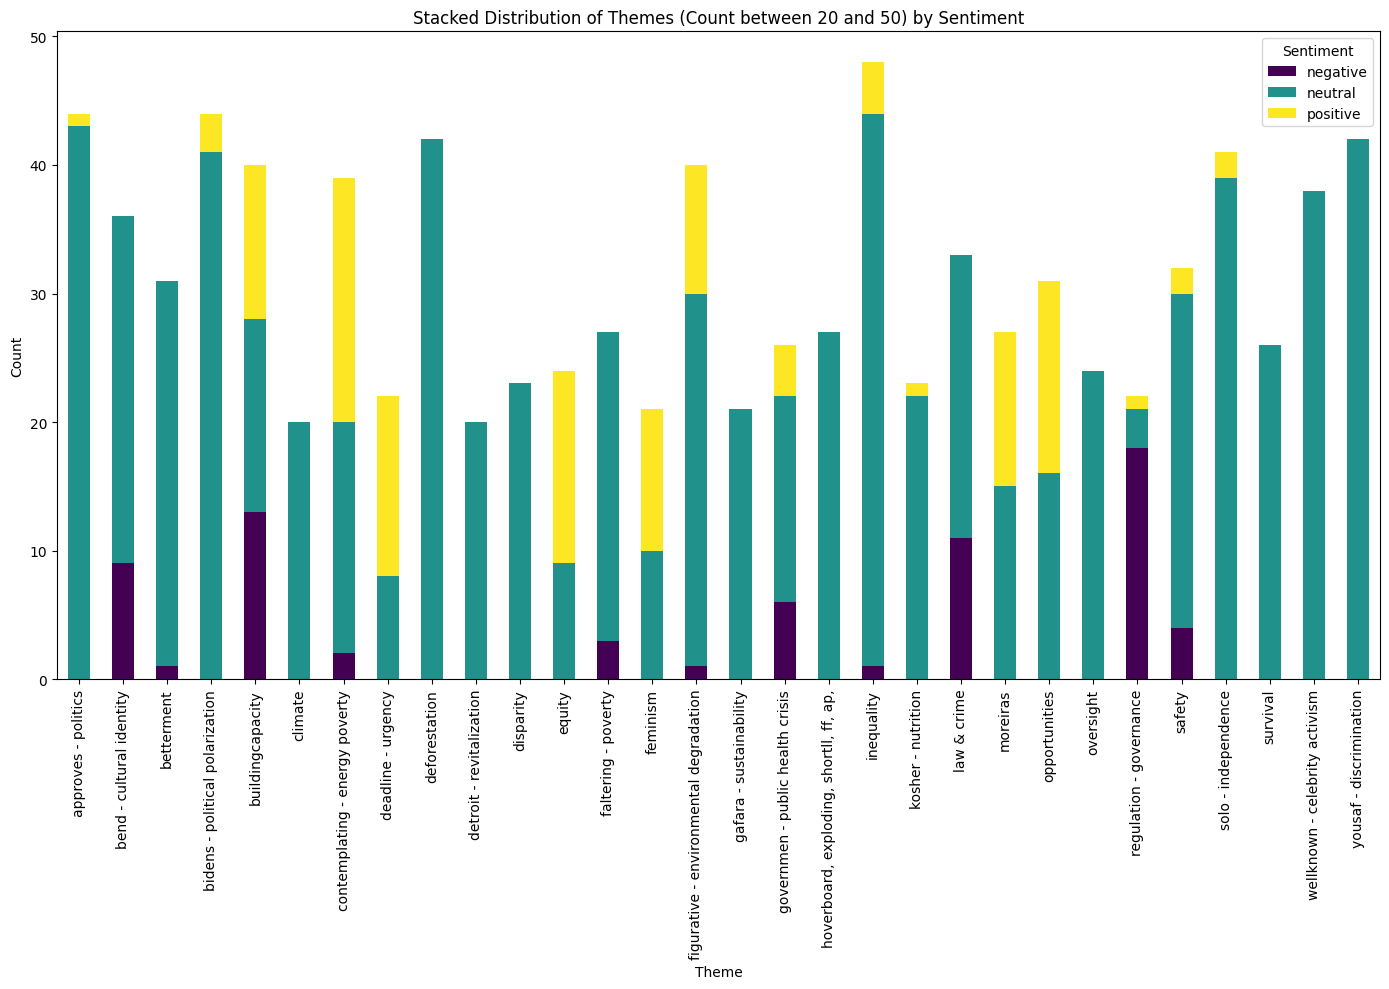

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: Fu

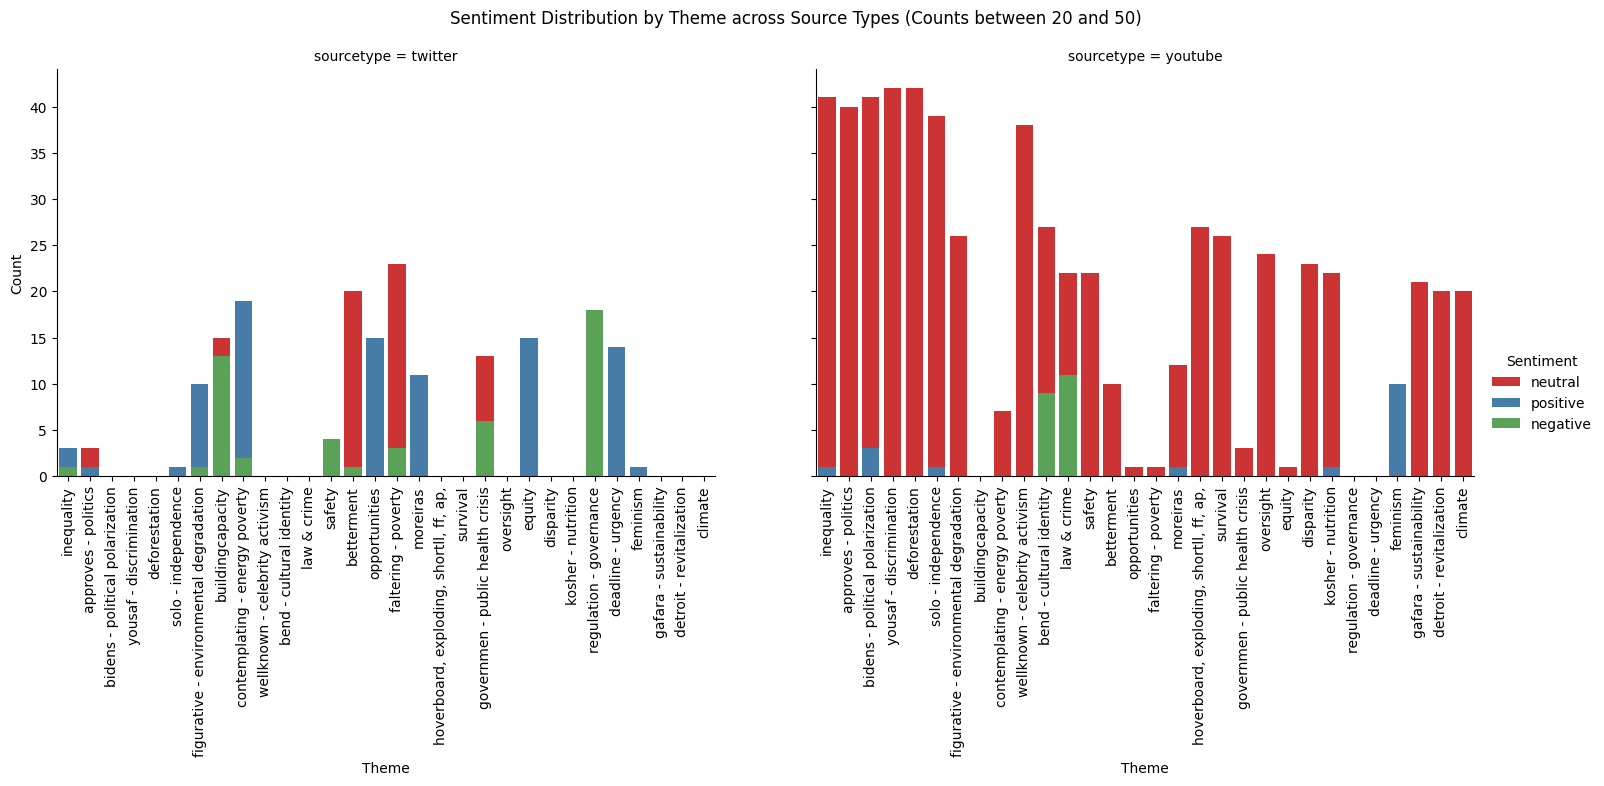

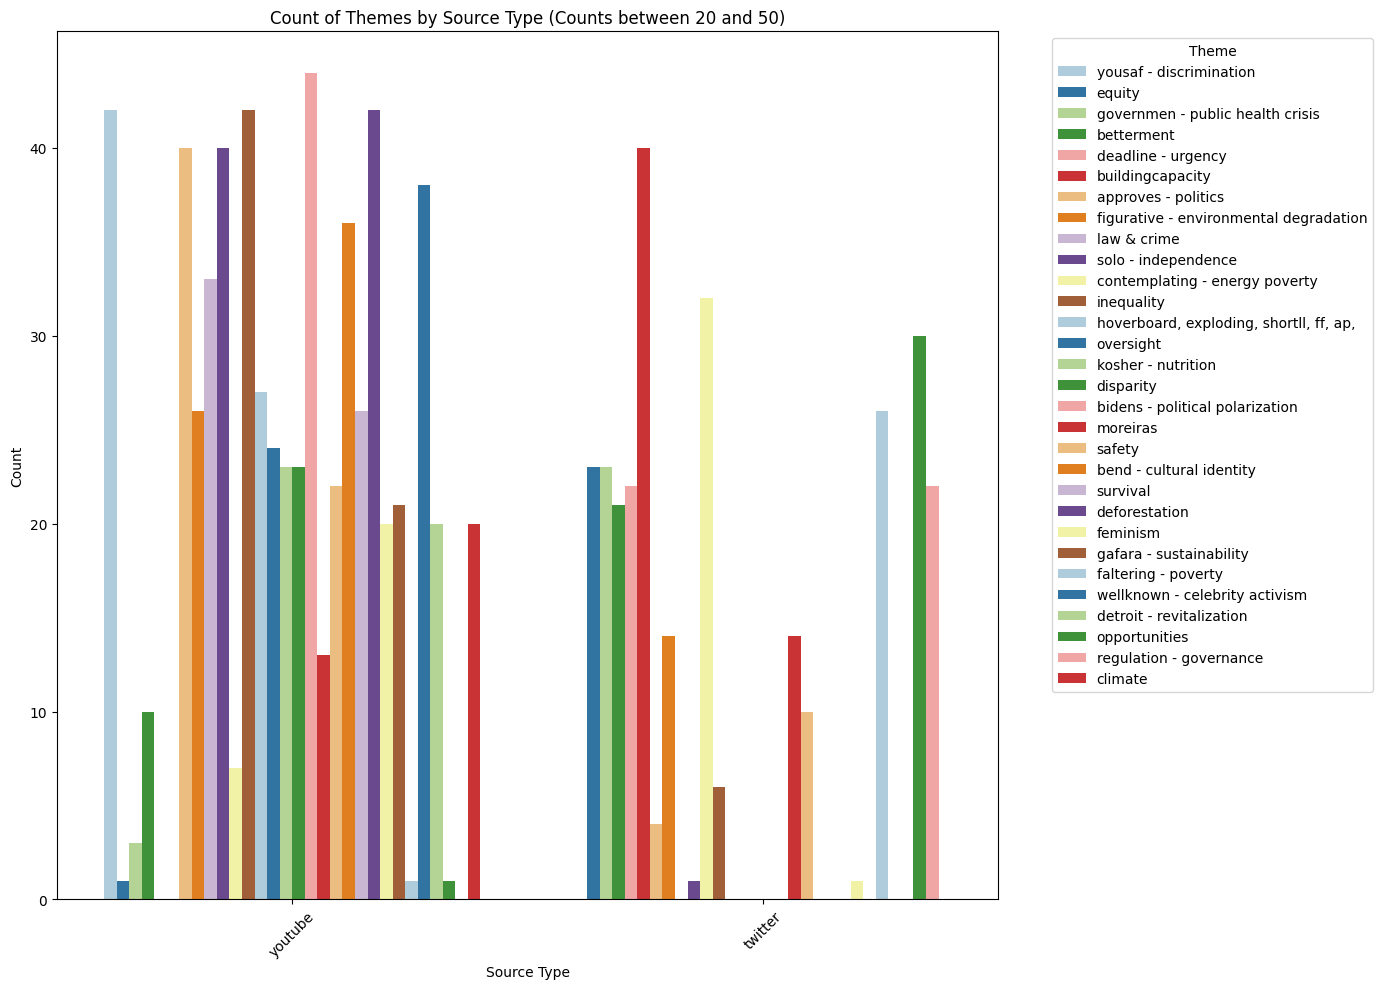

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
# df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Filter themes with counts between 20 and 50
theme_counts = df['cleaned_theme'].value_counts()
selected_themes = theme_counts[(theme_counts >= 20) & (theme_counts <= 50)].index

# Filter the dataset to include only records with selected themes
filtered_df = df[df['cleaned_theme'].isin(selected_themes)]

# Group data by 'sourcetype', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = filtered_df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Stacked Bar Plot: Themes Distribution by Source Type with Sentiment as Stacks
plt.figure(figsize=(14, 10))
theme_pivot = theme_sentiment_summary.pivot_table(index='cleaned_theme', columns='llama3_sentiment', values='count', aggfunc='sum', fill_value=0)
theme_pivot.plot(kind='bar', stacked=True, colormap="viridis", figsize=(14, 10))
plt.title("Stacked Distribution of Themes (Count between 20 and 50) by Sentiment")
plt.xlabel("Theme")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Facet Grid: Sentiment Distribution by Theme and Source Type
g = sns.FacetGrid(theme_sentiment_summary, col='sourcetype', hue='llama3_sentiment', height=5, aspect=1.5, palette="Set1")
g.map(sns.barplot, 'cleaned_theme', 'count', order=selected_themes, ci=None)
g.add_legend(title="Sentiment")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Theme", "Count")
g.fig.suptitle("Sentiment Distribution by Theme across Source Types (Counts between 20 and 50)", y=1.05)
plt.show()

# Count Plot with Theme as Hue
plt.figure(figsize=(14, 10))
sns.countplot(data=filtered_df, x='sourcetype', hue='cleaned_theme', palette="Paired", order=filtered_df['sourcetype'].unique())
plt.title("Count of Themes by Source Type (Counts between 20 and 50)")
plt.xlabel("Source Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

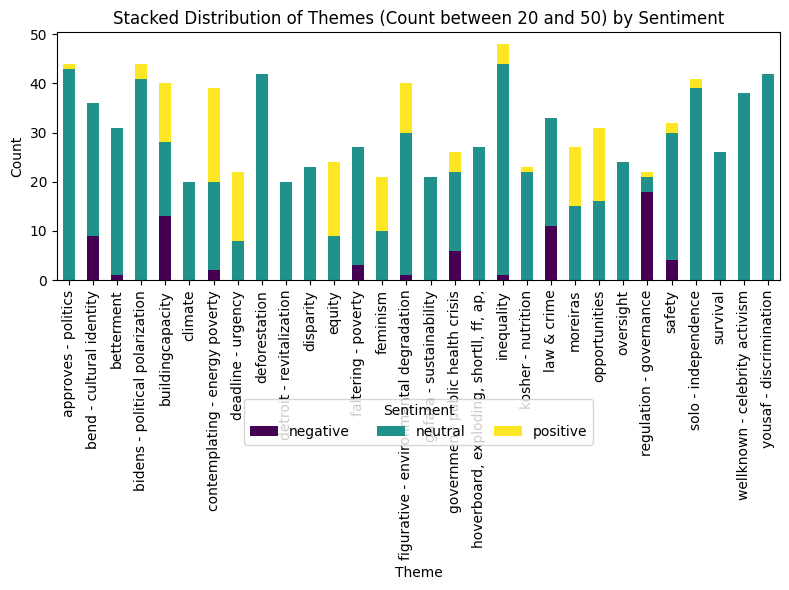

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: Fu

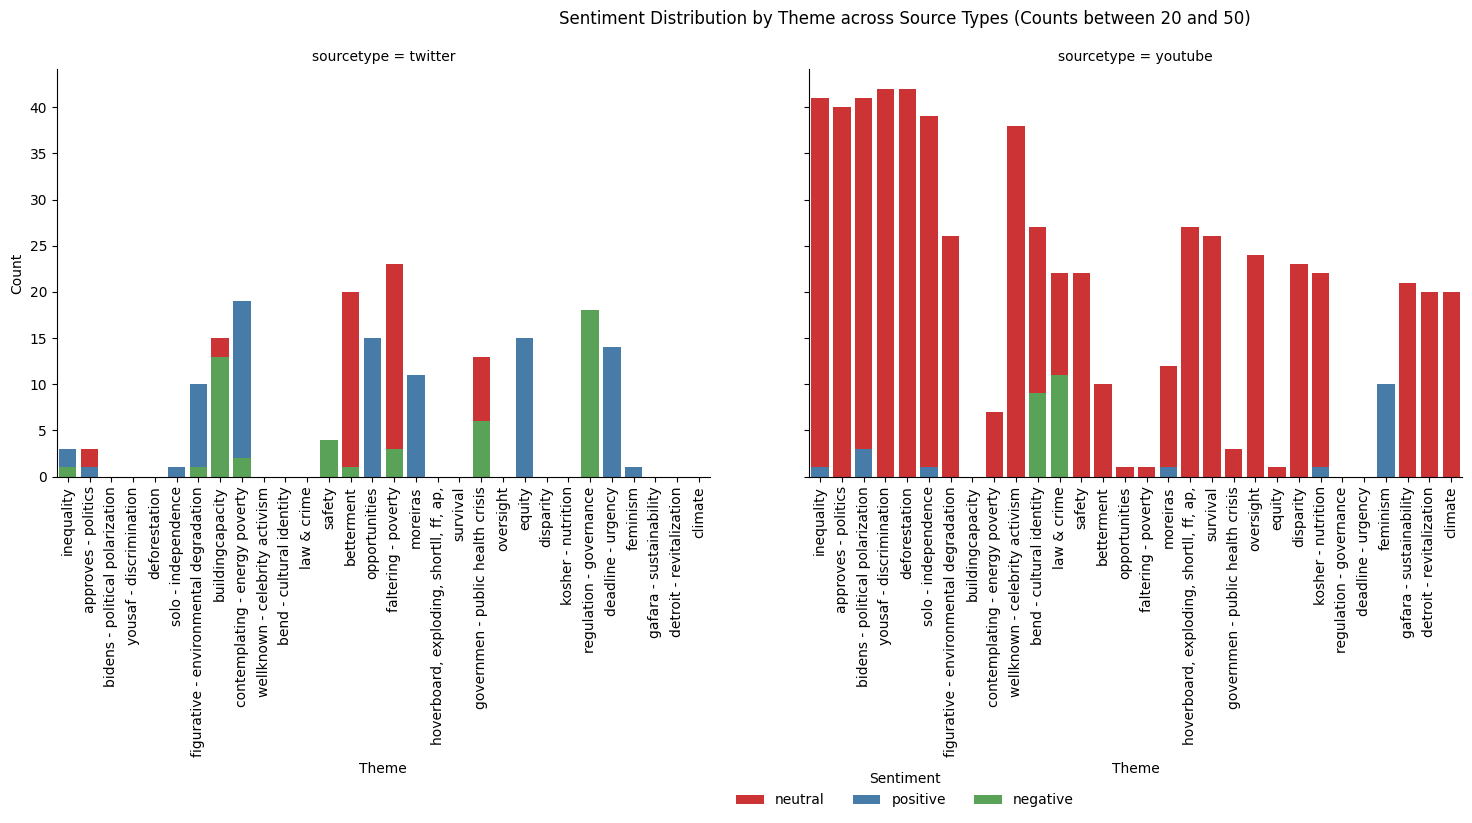

/tmp/ipykernel_408775/710132647.py:48: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


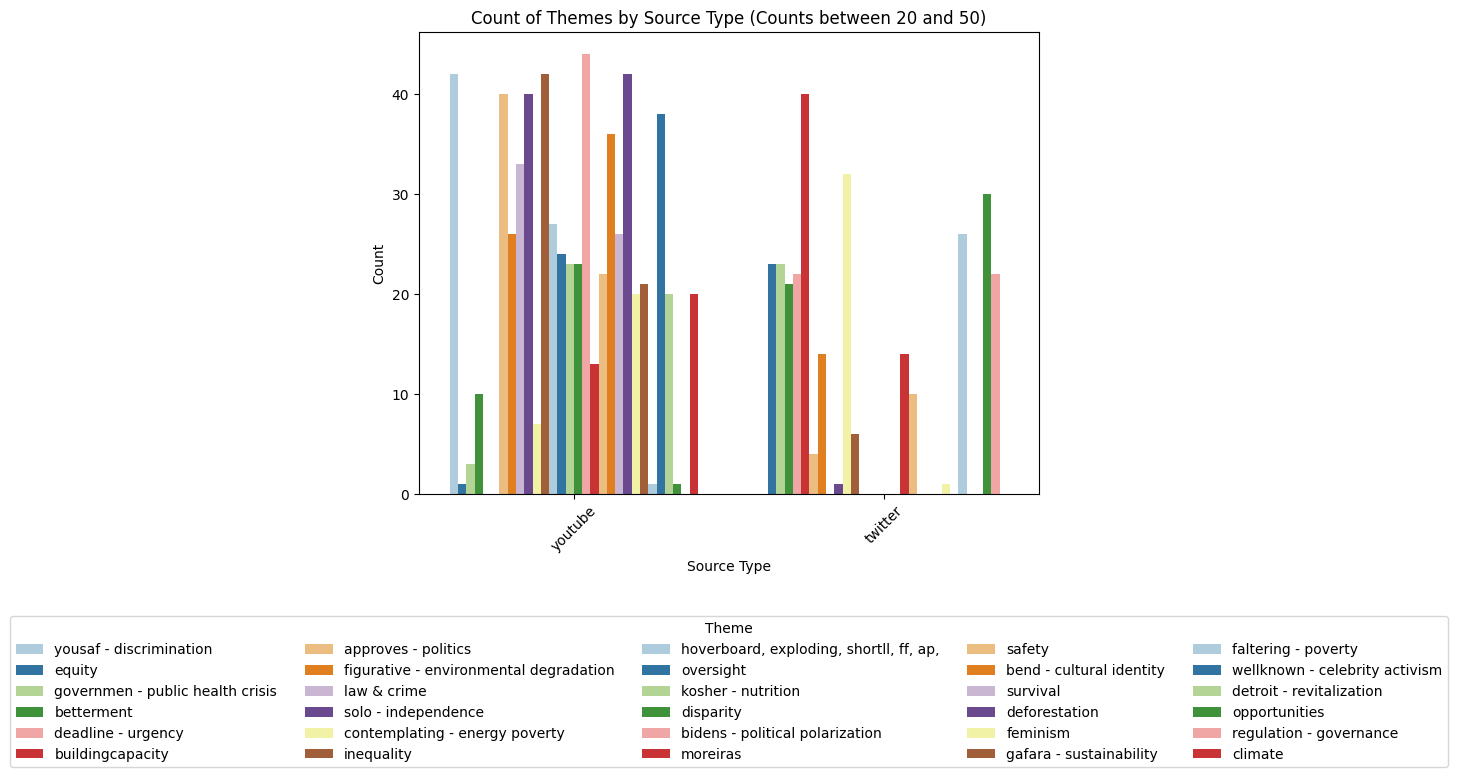

In [19]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Filter themes with counts between 20 and 50
theme_counts = df['cleaned_theme'].value_counts()
selected_themes = theme_counts[(theme_counts >= 20) & (theme_counts <= 50)].index

# Filter the dataset to include only records with selected themes
filtered_df = df[df['cleaned_theme'].isin(selected_themes)]

# Group data by 'sourcetype', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = filtered_df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Stacked Bar Plot: Themes Distribution by Source Type with Sentiment as Stacks
plt.figure(figsize=(8, 6))
theme_pivot = theme_sentiment_summary.pivot_table(index='cleaned_theme', columns='llama3_sentiment', values='count', aggfunc='sum', fill_value=0)
theme_pivot.plot(kind='bar', stacked=True, colormap="viridis", figsize=(8, 6))
plt.title("Stacked Distribution of Themes (Count between 20 and 50) by Sentiment")
plt.xlabel("Theme")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Sentiment', bbox_to_anchor=(0.5, -0.45), loc='upper center', ncol=3)
plt.tight_layout()
plt.show()

# Facet Grid: Sentiment Distribution by Theme and Source Type
g = sns.FacetGrid(theme_sentiment_summary, col='sourcetype', hue='llama3_sentiment', height=5, aspect=1.5, palette="Set1")
g.map(sns.barplot, 'cleaned_theme', 'count', order=selected_themes, ci=None)
g.add_legend(title="Sentiment", bbox_to_anchor=(0.5, -0.45), loc='upper center', ncol=3)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Theme", "Count")
g.fig.suptitle("Sentiment Distribution by Theme across Source Types (Counts between 20 and 50)", y=1.05)
plt.show()

# Count Plot with Theme as Hue
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='sourcetype', hue='cleaned_theme', palette="Paired", order=filtered_df['sourcetype'].unique())
plt.title("Count of Themes by Source Type (Counts between 20 and 50)")
plt.xlabel("Source Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Theme", bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=5)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

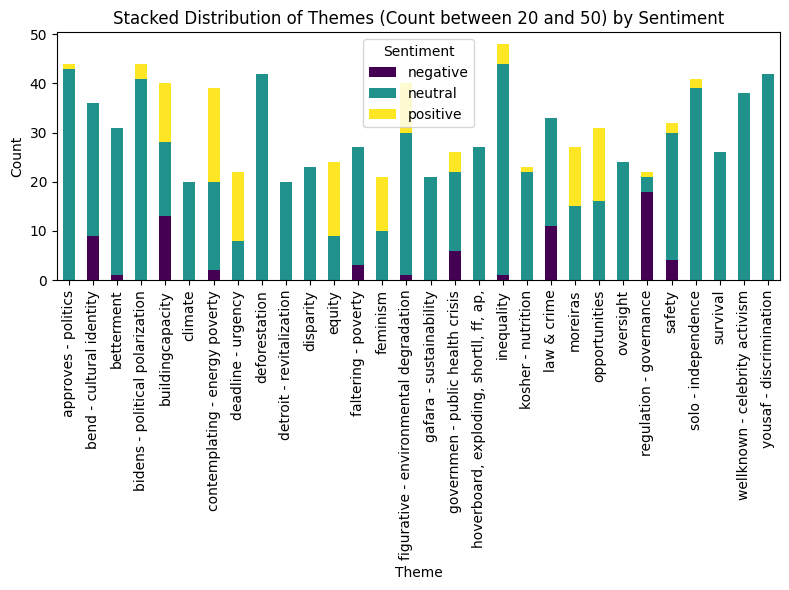

/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: Fu

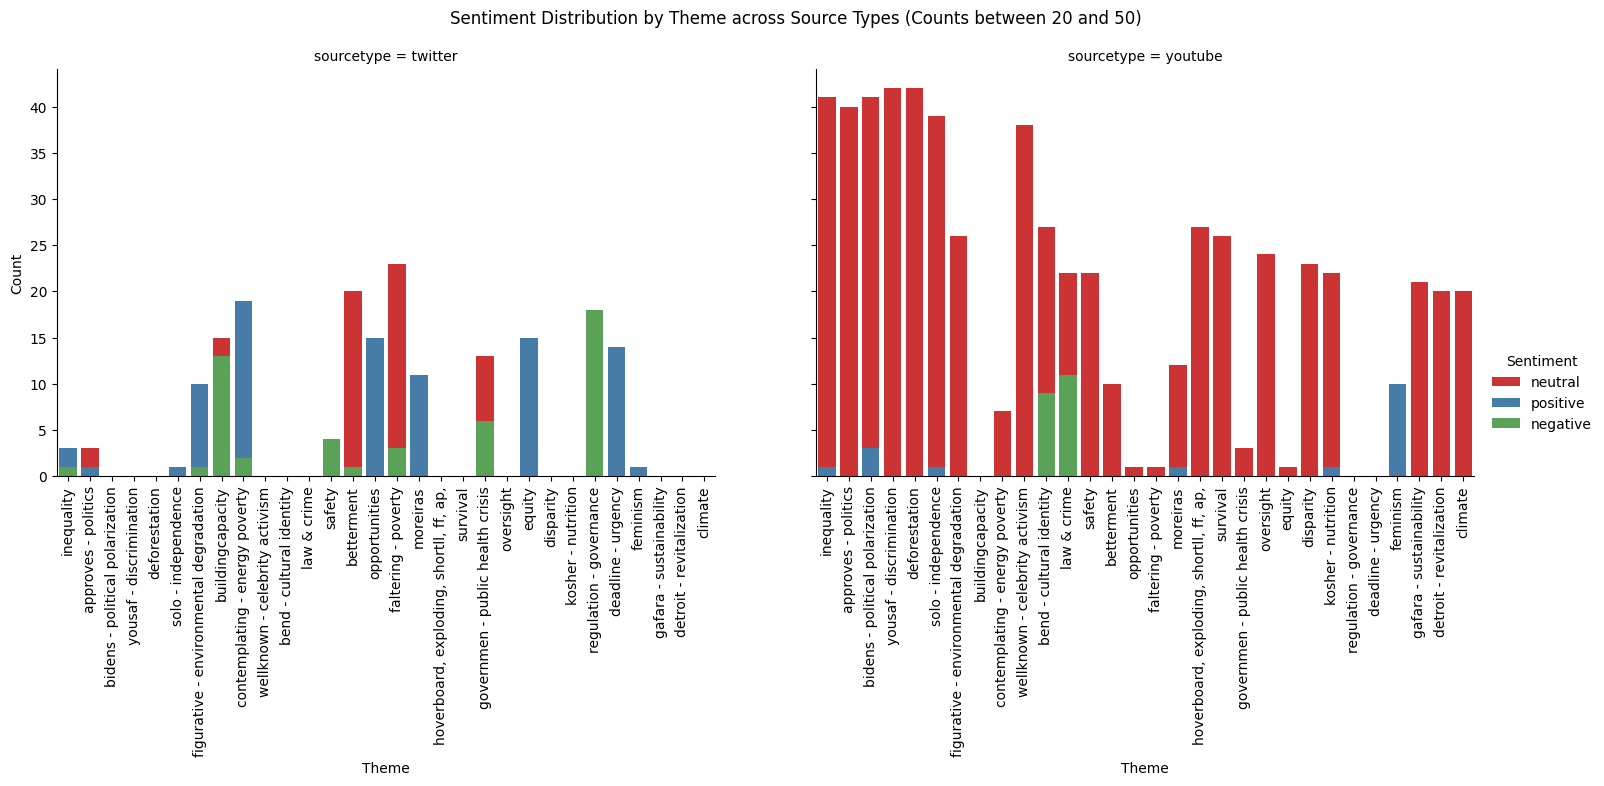

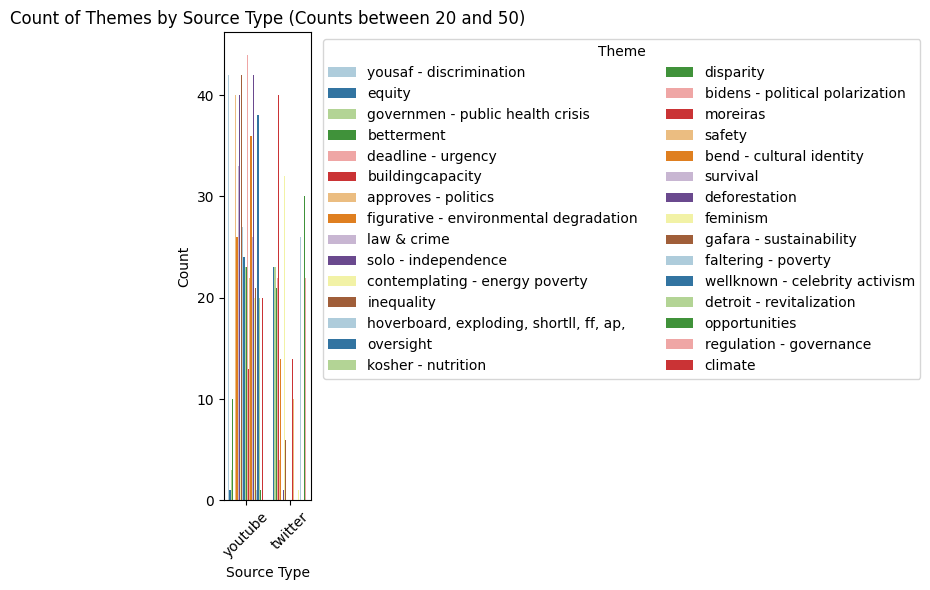

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Filter themes with counts between 20 and 50
theme_counts = df['cleaned_theme'].value_counts()
selected_themes = theme_counts[(theme_counts >= 20) & (theme_counts <= 50)].index

# Filter the dataset to include only records with selected themes
filtered_df = df[df['cleaned_theme'].isin(selected_themes)]

# Group data by 'sourcetype', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = filtered_df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Stacked Bar Plot: Themes Distribution by Source Type with Sentiment as Stacks
plt.figure(figsize=(8, 6))
theme_pivot = theme_sentiment_summary.pivot_table(index='cleaned_theme', columns='llama3_sentiment', values='count', aggfunc='sum', fill_value=0)
theme_pivot.plot(kind='bar', stacked=True, colormap="viridis", figsize=(8, 6))
plt.title("Stacked Distribution of Themes (Count between 20 and 50) by Sentiment")
plt.xlabel("Theme")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Facet Grid: Sentiment Distribution by Theme and Source Type
g = sns.FacetGrid(theme_sentiment_summary, col='sourcetype', hue='llama3_sentiment', height=5, aspect=1.5, palette="Set1")
g.map(sns.barplot, 'cleaned_theme', 'count', order=selected_themes, ci=None)
g.add_legend(title="Sentiment")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Theme", "Count")
g.fig.suptitle("Sentiment Distribution by Theme across Source Types (Counts between 20 and 50)", y=1.05)
plt.show()

# Count Plot with Theme as Hue
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='sourcetype', hue='cleaned_theme', palette="Paired", order=filtered_df['sourcetype'].unique())
plt.title("Count of Themes by Source Type (Counts between 20 and 50)")
plt.xlabel("Source Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: Fu

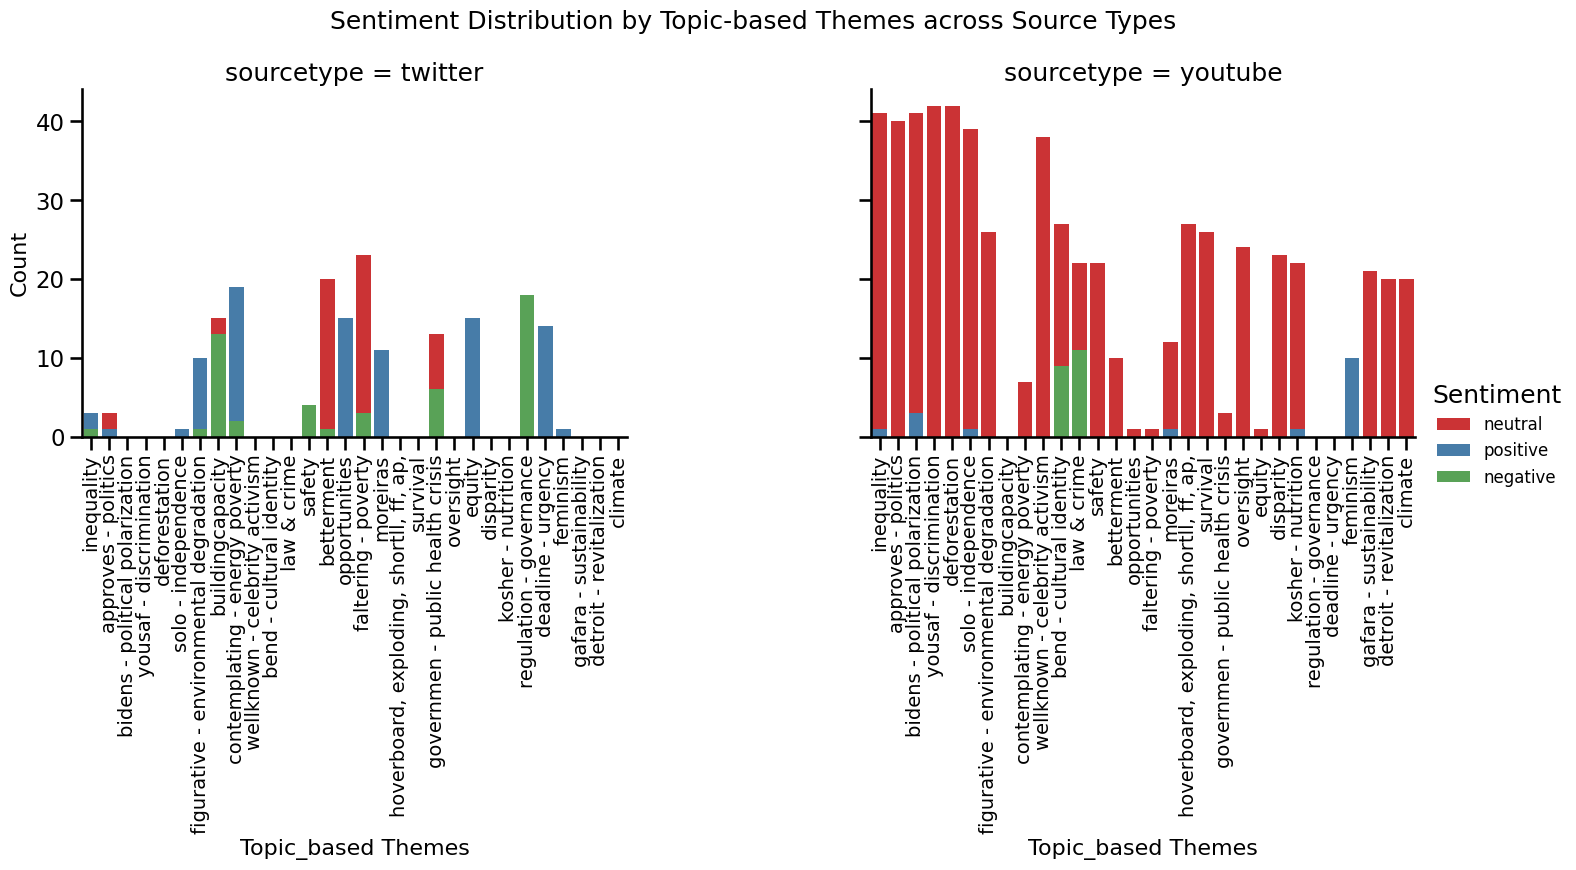

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt


# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Filter themes with counts between 20 and 50
theme_counts = df['cleaned_theme'].value_counts()
selected_themes = theme_counts[(theme_counts >= 20) & (theme_counts <= 50)].index

# Filter the dataset to include only records with selected themes
filtered_df = df[df['cleaned_theme'].isin(selected_themes)]

# Group data by 'sourcetype', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = filtered_df.groupby(['sourcetype', 'cleaned_theme', 'llama3_sentiment']).size().reset_index(name='count')

# Facet Grid: Sentiment Distribution by Theme and Source Type
g = sns.FacetGrid(theme_sentiment_summary, col='sourcetype', hue='llama3_sentiment', height=5, aspect=1.5, palette="Set1")
g.map(sns.barplot, 'cleaned_theme', 'count', order=selected_themes, ci=None, )

# Set larger font size for the title and axis labels
g.set_axis_labels("Topic_based Themes", "Count", fontsize=16)
g.set_xticklabels(rotation=90, fontsize=14)

# Set title and increase its font size
g.fig.suptitle("Sentiment Distribution by Topic-based Themes across Source Types", y=1.05, fontsize=18)

# Adjust legend font size
g.add_legend(title="Sentiment", title_fontsize=16, fontsize=12)

# Display the plot
plt.show()


/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: Fu

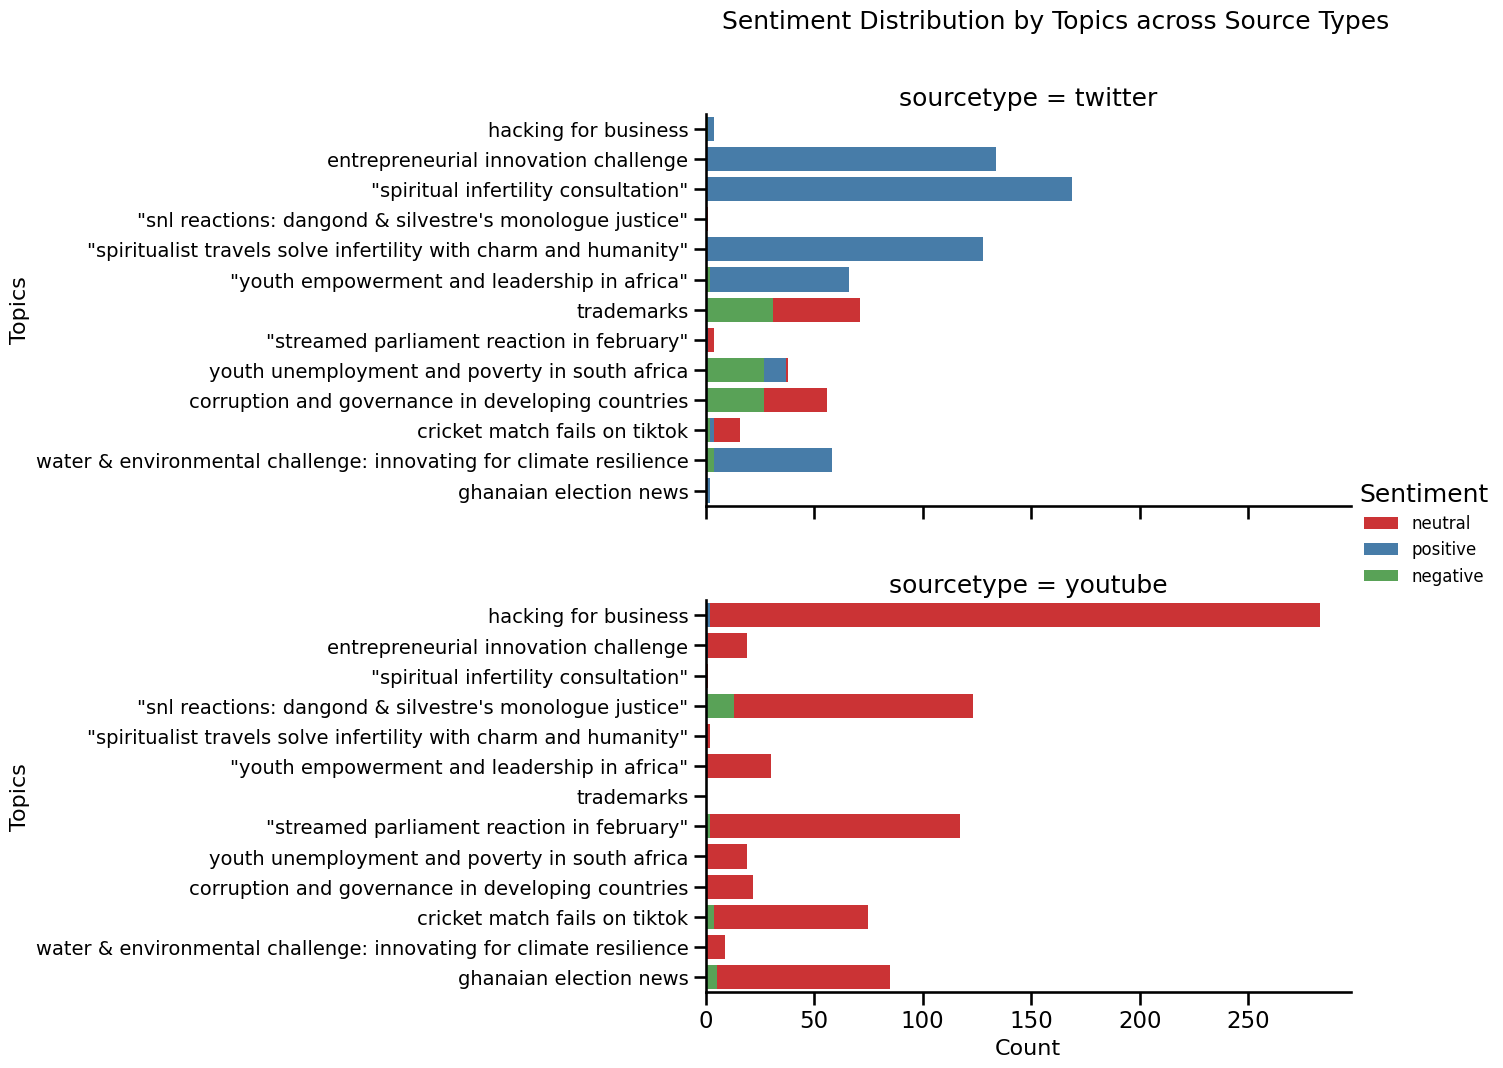

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Filter themes with counts between 100 and 300
theme_counts = df['llama2_labelone'].value_counts()
selected_themes = theme_counts[(theme_counts >= 98) & (theme_counts <= 300)].index

# Filter the dataset to include only records with selected themes
filtered_df = df[df['llama2_labelone'].isin(selected_themes)]

# Group data by 'sourcetype', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = filtered_df.groupby(['sourcetype', 'llama2_labelone', 'llama3_sentiment']).size().reset_index(name='count')

# Facet Grid: Sentiment Distribution by Theme and Source Type (horizontal)
g = sns.FacetGrid(
    theme_sentiment_summary, 
    col='sourcetype', 
    hue='llama3_sentiment', 
    height=5, 
    aspect=1.5,  # Widen the aspect ratio for a horizontal layout
    palette="Set1", 
    col_wrap=1  # This ensures one subplot per row
)

# Use barplot with orientation set to horizontal
g.map(sns.barplot, 'count', 'llama2_labelone', order=selected_themes, ci=None, orient='h')

# Set larger font size for the title and axis labels
g.set_axis_labels("Count", "Topics", fontsize=16)
g.set_yticklabels(rotation=0, fontsize=14)  # Rotate y-axis labels if needed

# Set title and increase its font size
g.fig.suptitle("Sentiment Distribution by Topics across Source Types", y=1.05, fontsize=18)

# Adjust legend font size
g.add_legend(title="Sentiment", title_fontsize=16, fontsize=12)

# Display the plot
plt.show()


/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/hsibitenda/anaconda3/envs/harriet_env/lib/python3.11/site-packages/seaborn/axisgrid.py:848: Fu

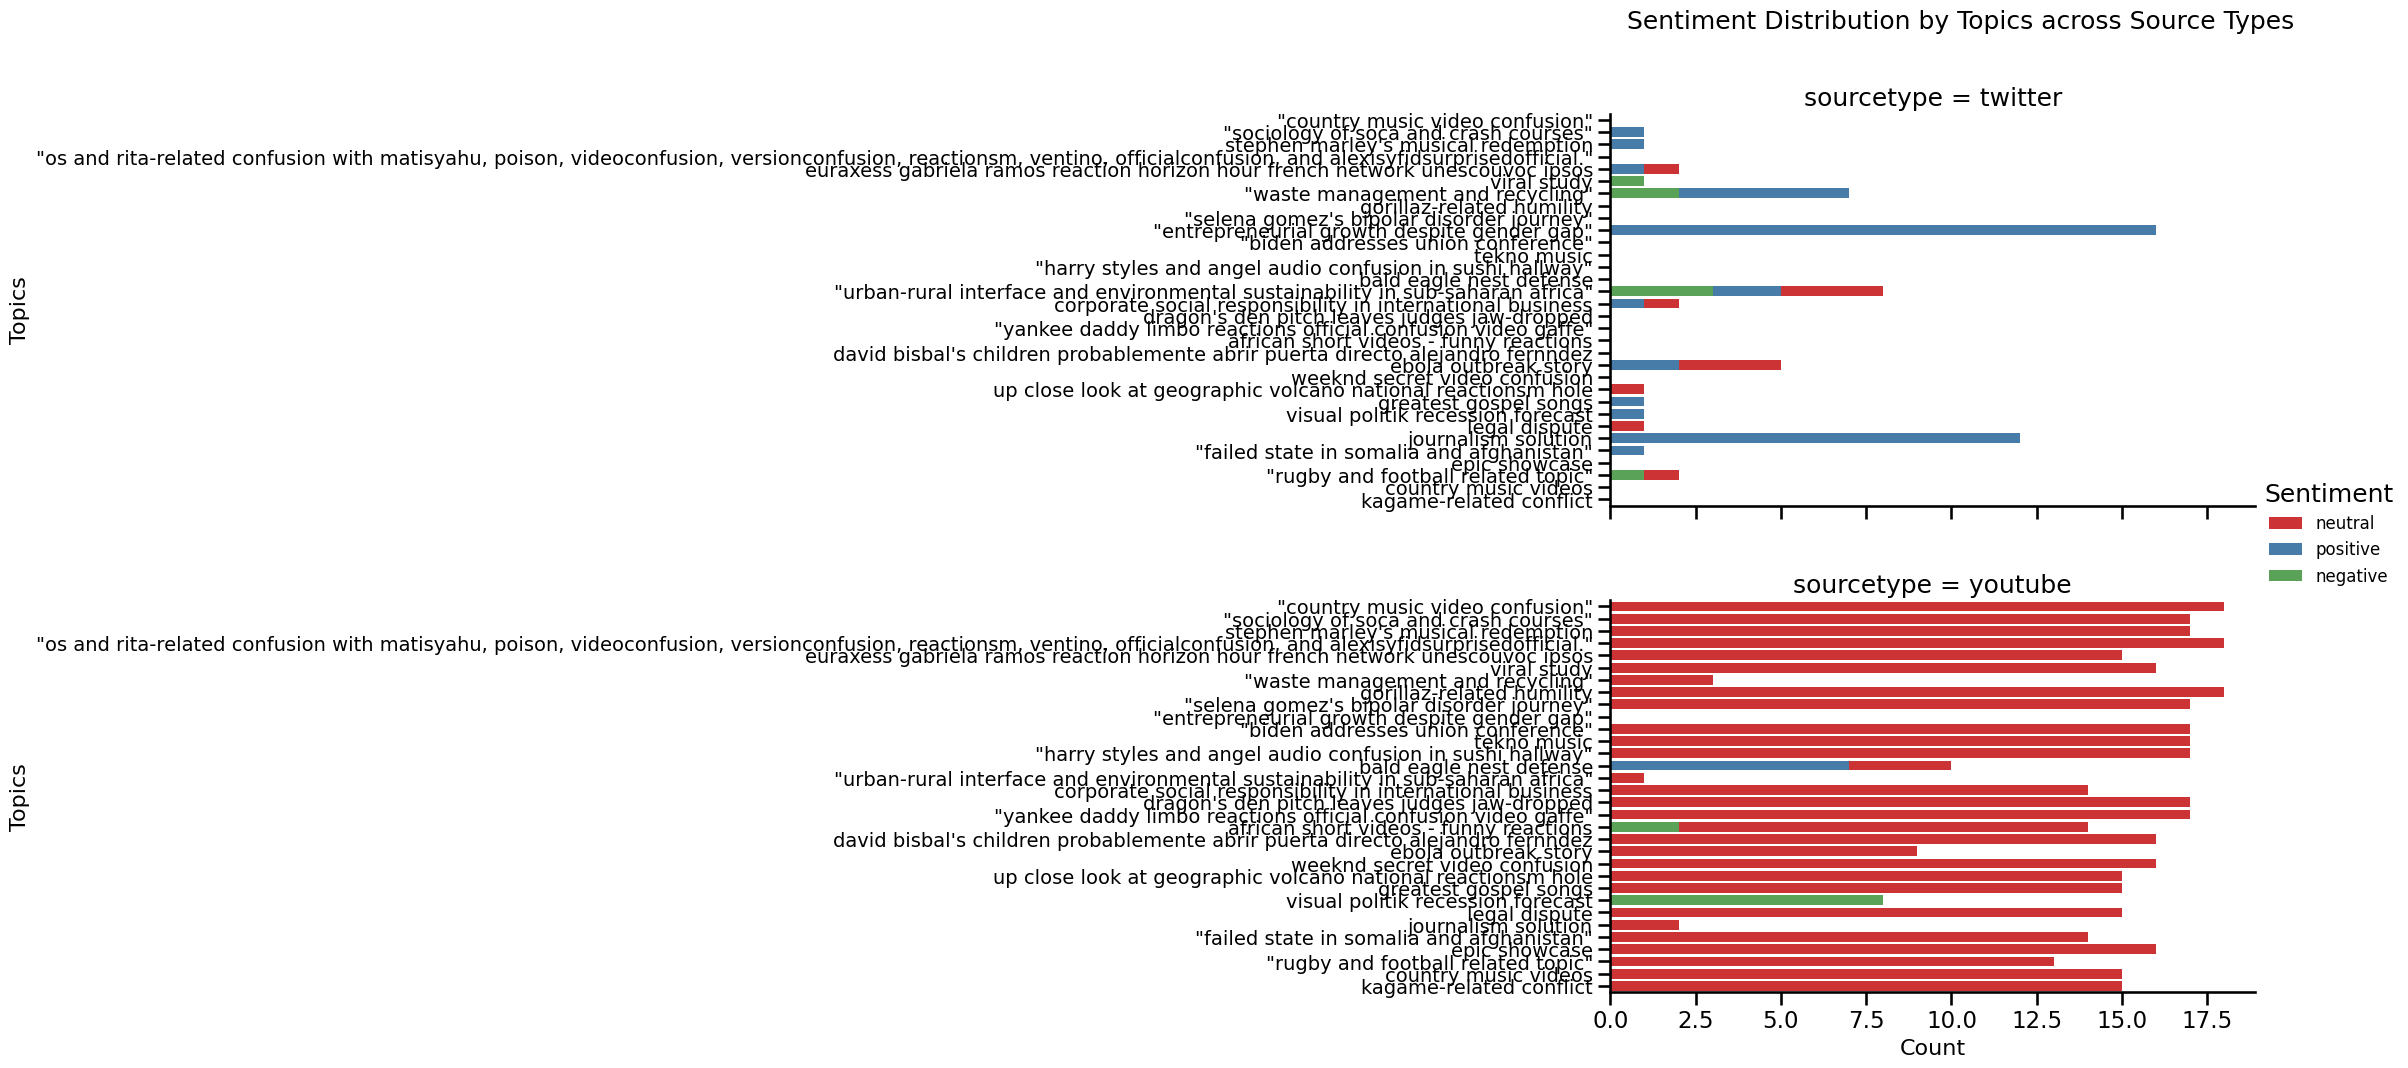

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace all occurrences of 'facebook' in the 'sourcetype' column with 'youtube'
df['sourcetype'] = df['sourcetype'].replace('facebook', 'youtube')

# Filter themes with counts between 100 and 300
theme_counts = df['llama2_labelone'].value_counts()
selected_themes = theme_counts[(theme_counts >= 15) & (theme_counts <= 18)].index

# Filter the dataset to include only records with selected themes
filtered_df = df[df['llama2_labelone'].isin(selected_themes)]

# Group data by 'sourcetype', 'cleaned_theme', and 'llama3_sentiment' for analysis
theme_sentiment_summary = filtered_df.groupby(['sourcetype', 'llama2_labelone', 'llama3_sentiment']).size().reset_index(name='count')

# Facet Grid: Sentiment Distribution by Theme and Source Type (horizontal)
g = sns.FacetGrid(
    theme_sentiment_summary, 
    col='sourcetype', 
    hue='llama3_sentiment', 
    height=5, 
    aspect=1.5,  # Widen the aspect ratio for a horizontal layout
    palette="Set1", 
    col_wrap=1  # This ensures one subplot per row
)

# Use barplot with orientation set to horizontal
g.map(sns.barplot, 'count', 'llama2_labelone', order=selected_themes, ci=None, orient='h')

# Set larger font size for the title and axis labels
g.set_axis_labels("Count", "Topics", fontsize=16)
g.set_yticklabels(rotation=0, fontsize=14)  # Rotate y-axis labels if needed

# Set title and increase its font size
g.fig.suptitle("Sentiment Distribution by Topics across Source Types", y=1.05, fontsize=18)

# Adjust legend font size
g.add_legend(title="Sentiment", title_fontsize=16, fontsize=12)

# Display the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Facet Grid: Sentiment Distribution by Theme and Source Type
g = sns.FacetGrid(theme_sentiment_summary, col='sourcetype', hue='llama3_sentiment', height=5, aspect=1.5, palette="Set1")
g.map(sns.barplot, 'llama2_labelone', 'count', order=selected_themes, ci=None)

# Set larger font size for the title and axis labels
g.set_axis_labels("Topic_based Themes", "Count", fontsize=16)
g.set_xticklabels(rotation=90, fontsize=14)

# Set title and increase its font size
g.fig.suptitle("Sentiment Distribution by Topic-based Themes across Source Types (Counts between 20 and 50)", y=1.05, fontsize=18)

# Adjust legend font size
g.add_legend(title="Sentiment", title_fontsize=16, fontsize=12)

# Display the plot
plt.show()


/tmp/ipykernel_408775/543835971.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


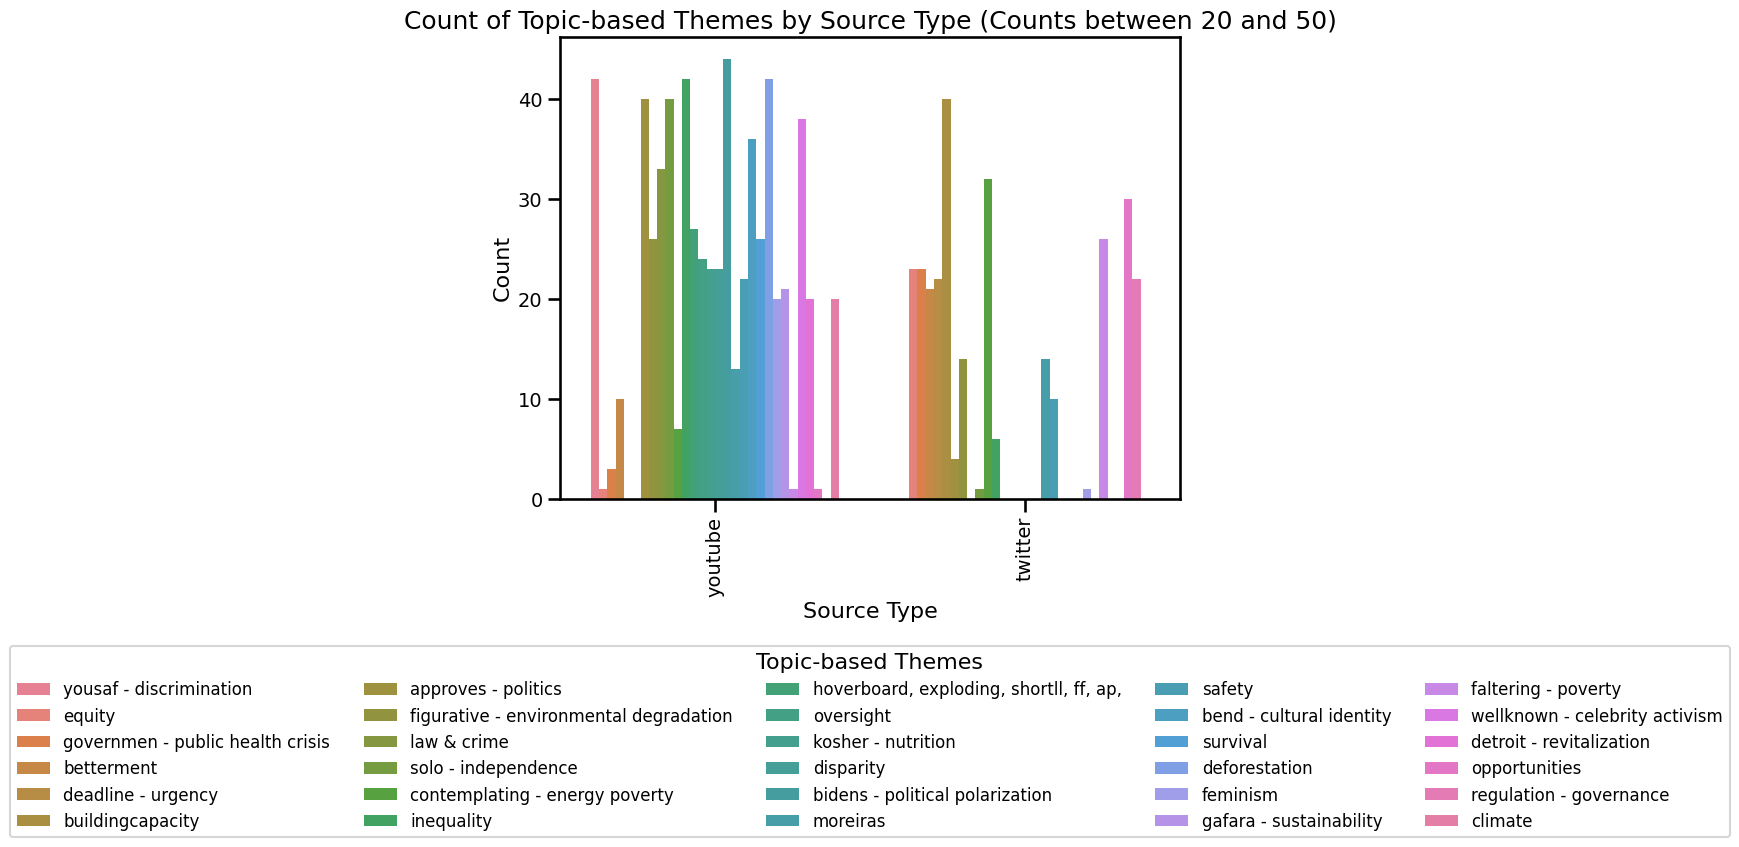

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a custom color palette with a unique color for each theme
unique_themes = filtered_df['cleaned_theme'].nunique()
palette = sns.color_palette("husl", unique_themes)  # "husl" generates a large number of distinct colors

# Count Plot with Theme as Hue, each theme having a unique color
plt.figure(figsize=(8, 6))
sns.countplot(
    data=filtered_df,
    x='sourcetype',
    hue='cleaned_theme',
    palette=palette,  # Apply the custom palette here
    order=filtered_df['sourcetype'].unique()
)
# plt.title("Count of Themes by Source Type (Counts between 20 and 50)")
# plt.xlabel("Source Type")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.legend(
#     title="Theme",
#     bbox_to_anchor=(0.5, -0.3),  # Position the legend at the bottom center
#     loc='upper center',
#     ncol=5
# )
# Set larger font sizes for title and labels
plt.title("Count of Topic-based Themes by Source Type (Counts between 20 and 50)", fontsize=18)
plt.xlabel("Source Type", fontsize=16)
plt.ylabel("Count", fontsize=16)

# Increase font size of tick labels
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# Move legend and increase font size
plt.legend(
    title="Topic-based Themes",
    title_fontsize=16,      # Legend title font size
    fontsize=12,            # Legend items font size
    bbox_to_anchor=(0.5, -0.3),  # Position the legend at the bottom center
    loc='upper center',
    ncol=5
)

plt.tight_layout()
plt.show()


In [31]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Increase overall font size
# sns.set_context("talk")  # Options: paper, notebook, talk, poster (increasing size order)

# # Generate a custom color palette with a unique color for each theme
# unique_themes = filtered_df['cleaned_theme'].nunique()
# palette = sns.color_palette("husl", unique_themes)  # "husl" generates a large number of distinct colors

# # Count Plot with Theme as Hue, each theme having a unique color
# plt.figure(figsize=(10, 8))
# sns.countplot(
#     data=filtered_df,
#     x='sourcetype',
#     hue='cleaned_theme',
#     palette=palette,  # Apply the custom palette here
#     order=filtered_df['sourcetype'].unique()
# )

# # Set larger font sizes for title and labels
# plt.title("Count of Themes by Source Type (Counts between 20 and 50)", fontsize=18)
# plt.xlabel("Source Type", fontsize=16)
# plt.ylabel("Count", fontsize=16)

# # Increase font size of tick labels
# plt.xticks(rotation=45, fontsize=14)
# plt.yticks(fontsize=14)

# # Move legend and increase font size
# plt.legend(
#     title="Theme",
#     title_fontsize=16,      # Legend title font size
#     fontsize=12,            # Legend items font size
#     bbox_to_anchor=(0.5, -0.3),  # Position the legend at the bottom center
#     loc='upper center',
#     ncol=5
# )

# plt.tight_layout()
# plt.show()


<Figure size 800x1000 with 0 Axes>

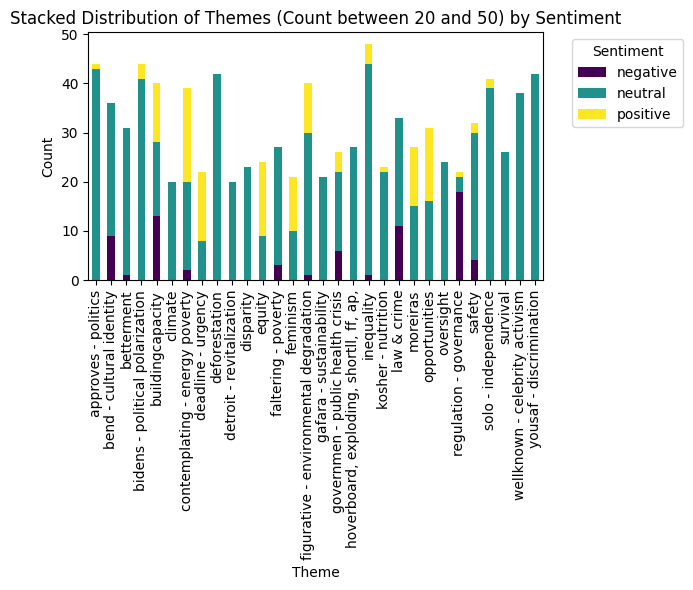

In [24]:
import matplotlib.pyplot as plt

# Plotting the Stacked Bar Plot
plt.figure(figsize=(8, 10))
theme_pivot = theme_sentiment_summary.pivot_table(index='cleaned_theme', columns='llama3_sentiment', values='count', aggfunc='sum', fill_value=0)
theme_pivot.plot(kind='bar', stacked=True, colormap="viridis", figsize=(8, 6))

plt.title("Stacked Distribution of Themes (Count between 20 and 50) by Sentiment")
plt.xlabel("Theme")
plt.ylabel("Count")
plt.xticks(rotation=90)

# Move legend outside of the plot
plt.legend(
    title='Sentiment',
    bbox_to_anchor=(1.05, 1),  # Place legend to the right of the plot
    loc='upper left'
)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for the legend
plt.show()
